In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
%matplotlib?

In [5]:
#定义一个读取文件生成数据的函数，然后返回生成的数据
#这里1、使用format进行字符串的格式化操作
#2、运用 python的with 方法方便的进行异常的处理，和对资源的清理，省了些 try catch finally的步骤
def open_csv(csv_name):
    with open(r'D:\ml\rossmann-store-sales\{}'.format(csv_name)) as f:
        data = pd.read_csv(f)
    return data

In [6]:
#分别创建 训练数据集，测试数据集，和商店的描述数据
data_store = open_csv('store.csv')
data_train = open_csv('train.csv')
data_test = open_csv('test.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [7]:
data_store.head().append(data_store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [8]:
data_train.head().append(data_train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015/7/31,5263,555,1,1,0,1
1,2,5,2015/7/31,6064,625,1,1,0,1
2,3,5,2015/7/31,8314,821,1,1,0,1
3,4,5,2015/7/31,13995,1498,1,1,0,1
4,5,5,2015/7/31,4822,559,1,1,0,1
1017204,1111,2,2013/1/1,0,0,0,0,a,1
1017205,1112,2,2013/1/1,0,0,0,0,a,1
1017206,1113,2,2013/1/1,0,0,0,0,a,1
1017207,1114,2,2013/1/1,0,0,0,0,a,1
1017208,1115,2,2013/1/1,0,0,0,0,a,1


In [9]:
data_test.head().append(data_test.tail())

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [10]:
#查看数据缺失
display(data_store.isnull().sum(),data_train.isnull().sum(),data_test.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [11]:
#商店的缺失数据分析
#CompetitionDistance
data_store[pd.isnull(data_store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [12]:
comp_month_nan_list = data_store[pd.isnull(data_store.CompetitionOpenSinceMonth)].Store.unique()

In [13]:
comp_year_nan_list = data_store[pd.isnull(data_store.CompetitionOpenSinceYear)].Store.unique()

In [14]:
(comp_month_nan_list == comp_year_nan_list).all()

True

竞争对手开启年份月份某些店铺存在为空的情况，认为数据丢失，考虑直接写为0

In [15]:
df_nan_prom2 = data_store[pd.isnull(data_store.Promo2SinceWeek)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

In [16]:
df_nan_prom2 = data_store[pd.isnull(data_store.Promo2SinceYear)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

In [17]:
df_nan_prom2 = data_store[pd.isnull(data_store.PromoInterval)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

上面三行分析得到促销相关的时间、时段信息为空，均是出现在Promo2 = 0 即无促销的情况下，因而对于促销相关的字段考虑直接写0

In [18]:
#分析缺失的数据
#测试集缺失数据
data_test[pd.isnull(data_test.Open)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


缺失的数据都来自于 同一个店铺，无周末，无假期，且部分有促销，判定为正常营业，在特征处理时设置成1

下面具体分析每个字段的异常情况

In [19]:
#查看每个数据集合每一列的取值情况
data_store.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

需要对字符串进行数值化

In [20]:
data_store.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

需要对字符串进行数值化

In [21]:
data_store.CompetitionDistance.describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [22]:
data_store.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

取值是一月到12月

In [23]:
data_store.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [24]:
data_store.Promo2.unique()

array([0, 1], dtype=int64)

结果是有促销或者无促销

In [25]:
data_store.Promo2SinceWeek.unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

一年有52周，取值正常

In [26]:
data_store.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

除去空值外，年份情况无异常

In [27]:
data_store.PromoInterval.unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

连续的促销为每年的固定月份，数据无异常,特征处理时，需要将特征处理为数值变量

In [28]:
#查看训练数据的情况
data_train.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

星期数为周一到周日，无问题

In [29]:
data_train.Date.unique()

array(['2015/7/31', '2015/7/30', '2015/7/29', '2015/7/28', '2015/7/27',
       '2015/7/26', '2015/7/25', '2015/7/24', '2015/7/23', '2015/7/22',
       '2015/7/21', '2015/7/20', '2015/7/19', '2015/7/18', '2015/7/17',
       '2015/7/16', '2015/7/15', '2015/7/14', '2015/7/13', '2015/7/12',
       '2015/7/11', '2015/7/10', '2015/7/9', '2015/7/8', '2015/7/7',
       '2015/7/6', '2015/7/5', '2015/7/4', '2015/7/3', '2015/7/2',
       '2015/7/1', '2015/6/30', '2015/6/29', '2015/6/28', '2015/6/27',
       '2015/6/26', '2015/6/25', '2015/6/24', '2015/6/23', '2015/6/22',
       '2015/6/21', '2015/6/20', '2015/6/19', '2015/6/18', '2015/6/17',
       '2015/6/16', '2015/6/15', '2015/6/14', '2015/6/13', '2015/6/12',
       '2015/6/11', '2015/6/10', '2015/6/9', '2015/6/8', '2015/6/7',
       '2015/6/6', '2015/6/5', '2015/6/4', '2015/6/3', '2015/6/2',
       '2015/6/1', '2015/5/31', '2015/5/30', '2015/5/29', '2015/5/28',
       '2015/5/27', '2015/5/26', '2015/5/25', '2015/5/24', '2015/5/23',
       '20

In [30]:
data_train.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [31]:
data_train.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [32]:
data_train.Open.unique()

array([1, 0], dtype=int64)

In [33]:
data_train.Promo.unique()

array([1, 0], dtype=int64)

In [34]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

这个数据有点奇怪，有两个0 的数据 需要进行处理，合并，同时字母需要进行数值化

In [35]:
data_train.StateHoliday.replace(0,'0',inplace = True)

In [36]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [37]:
data_train.SchoolHoliday.unique()

array([1, 0], dtype=int64)

In [38]:
data_test.DayOfWeek.unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [39]:
data_test.Open.unique()

array([ 1., nan,  0.])

In [40]:
data_test.Promo.unique()

array([1, 0], dtype=int64)

In [41]:
data_test.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [42]:
data_test.SchoolHoliday.unique()

array([0, 1], dtype=int64)

开始对空值和异常值进行处理

In [43]:
data_store.fillna(0, inplace=True)#促销和竞争对手信息缺失补位0

In [44]:
data_test.fillna(1, inplace=True)#open数据缺失，分析后认定为店铺开启，补为1

In [45]:
display(data_store.isnull().sum(),data_train.isnull().sum(),data_test.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

确认 没有空值

In [46]:
#生成新数据
data_train_new=pd.merge(data_train,data_store,on='Store',how='left')
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.head().append(data_train_new.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [125]:
data_test_new=pd.merge(data_test,data_store,on='Store',how='left')
data_test_new.Date=pd.to_datetime(data_test_new.Date)
data_test_new.head().append(data_test_new.tail())

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,0.0,0.0,0,0.0,0.0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


开始进行数据分析

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'sales(W)')

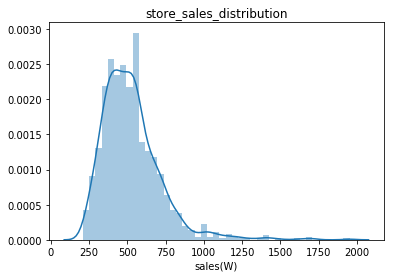

In [48]:
#每家店sales总额的分布
df1=data_train_new.groupby('Store')['Sales'].sum()/10000
#df1.head()
sns.distplot(df1)
plt.title('store_sales_distribution')
plt.xlabel('sales(W)')

[Text(0.5, 1.0, 'StoreType-sum-sales')]

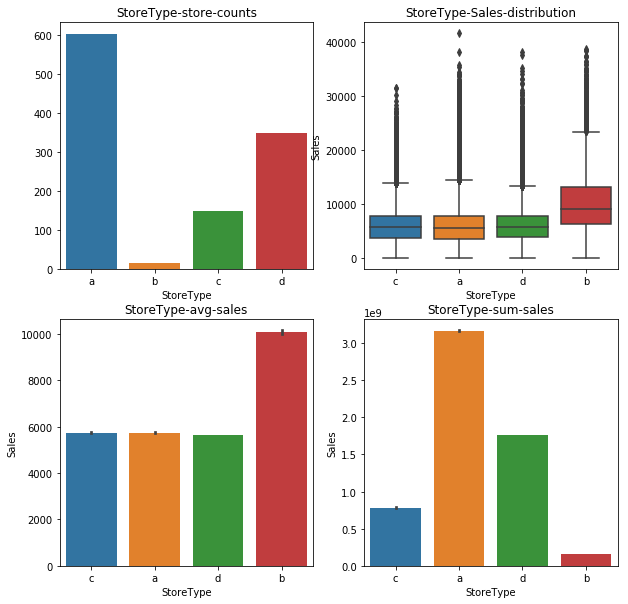

In [49]:
#不同店铺种类的数据分布情况
#StoreType
from numpy import mean
from numpy import sum

fig,ax=plt.subplots(2,2,figsize=(10,10))



df=data_store.groupby('StoreType').size()
sns.barplot(df.index,df.values,ax=ax[0][0])
ax[0][0].set(**{'title':'StoreType-store-counts'})


#StoreType的销售分布
sns.boxplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[0][1])
ax[0][1].set(**{'title':'StoreType-Sales-distribution'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,estimator=mean,ax=ax[1][0])
ax[1][0].set(**{'title':'StoreType-avg-sales'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,estimator=sum,ax=ax[1][1])
ax[1][1].set(**{'title':'StoreType-sum-sales'})



[Text(0.5, 1.0, 'Assortment-sum-sales')]

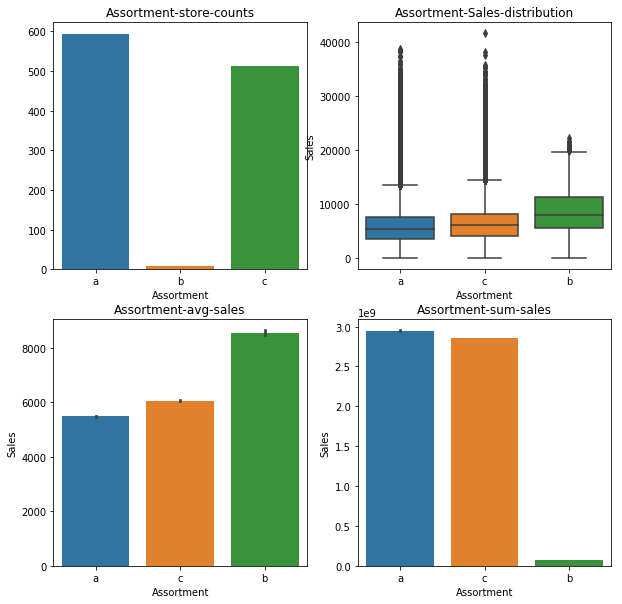

In [51]:
#对不同分类级别的店铺观察 分布情况
#Assortment
from numpy import mean
from numpy import sum

fig,ax=plt.subplots(2,2,figsize=(10,10))



df=data_store.groupby('Assortment').size()
sns.barplot(df.index,df.values,ax=ax[0][0])
ax[0][0].set(**{'title':'Assortment-store-counts'})


#StoreType的销售分布
sns.boxplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[0][1])
ax[0][1].set(**{'title':'Assortment-Sales-distribution'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,estimator=mean,ax=ax[1][0])
ax[1][0].set(**{'title':'Assortment-avg-sales'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,estimator=sum,ax=ax[1][1])
ax[1][1].set(**{'title':'Assortment-sum-sales'})


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


[Text(0.5, 1.0, 'CompetitionOpen-avg-sales')]

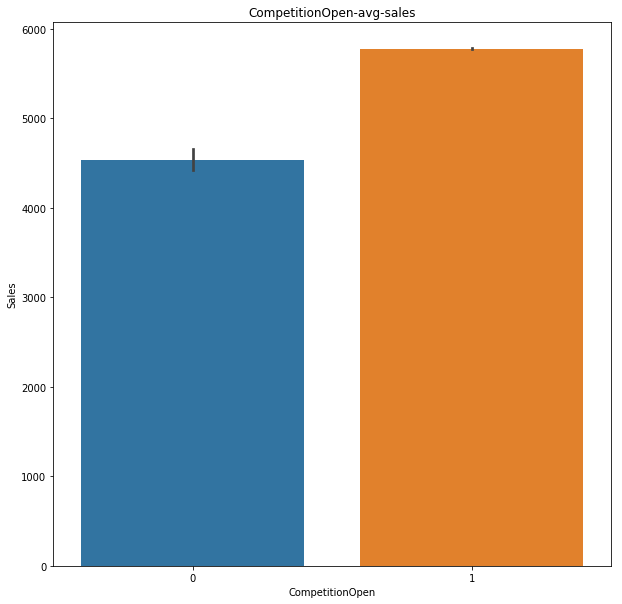

In [52]:
#探索竞争者的一些关系
#探索与竞争者有无的关系
df = data_train_new[['CompetitionDistance','Sales']]

df['CompetitionOpen'] = df.CompetitionDistance.apply(lambda x: 1 if x > 0 else 0)       


fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.barplot(y='Sales',x='CompetitionOpen',data=df,estimator=mean,ax=ax)
ax.set(**{'title':'CompetitionOpen-avg-sales'})




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
No handles with labels found to put in legend.


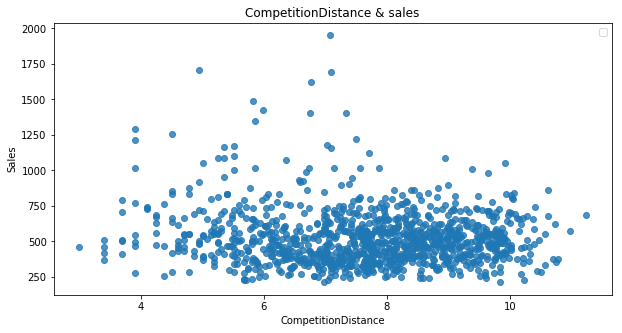

In [53]:
#探索竞争者距离和销售额关系
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})#每个店销售总额
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x))#对距离取log，收缩分布
df7['Sales']=df7['Sales'].map(lambda x:x/10000)#销售额以万元为单位
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('CompetitionDistance & sales')
plt.legend(loc='best')


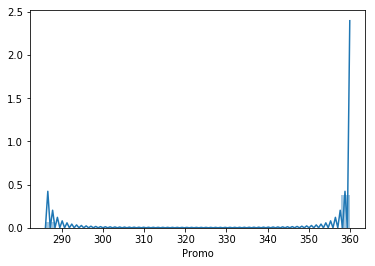

In [54]:
#促销的相关分析
df7=data_train_new.groupby('Store')['Promo'].sum()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.distplot(df7,ax=ax)

[Text(0.5, 1.0, 'Promo_counts')]

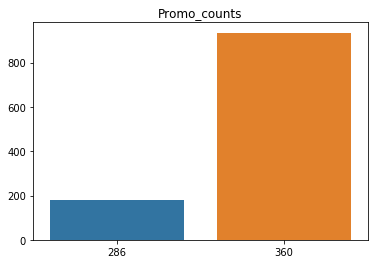

In [55]:
df8=df7.value_counts()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.barplot(df8.index,df8.values,ax=ax)
ax.set(**{'title':'Promo_counts'})

[Text(0.5, 1.0, 'Promo & sales')]

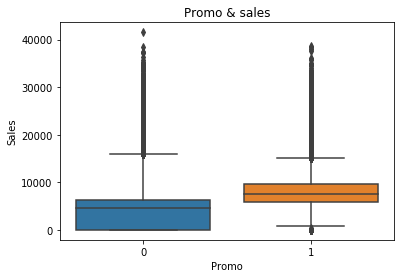

In [56]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new,ax=ax)
ax.set(**{'title':'Promo & sales'})

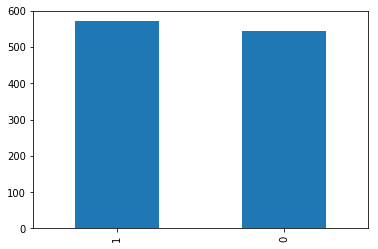

In [57]:
#季节促销的影响
#有无promo2的店数量对比
df9=data_store.Promo2.value_counts()
df9.plot(kind='bar')

[Text(0.5, 1.0, 'promo2 & sales')]

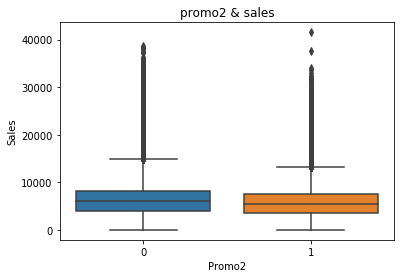

In [58]:
#有无promo2的每天每个店销售情况对比
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo2',data=data_train_new,ax=ax)
ax.set(**{'title':'promo2 & sales'})

[Text(0.5, 1.0, 'StateHoliday & sales > 0 ')]

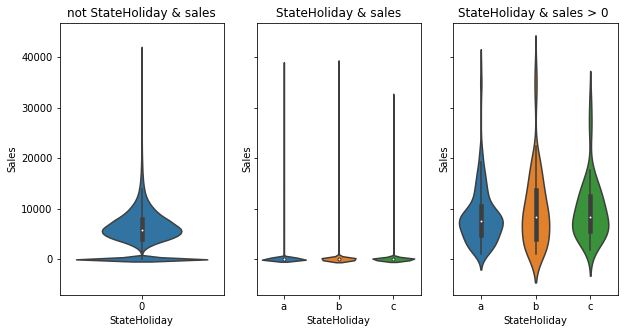

In [59]:
#对比stateholiday销售分布情况
fig,ax=plt.subplots(1,3,sharey=True,figsize=(10,5))

#不是国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday=='0'],ax=ax[0])
ax[0].set(**{'title':'not StateHoliday & sales'})
#国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='0'],ax=ax[1])
ax[1].set(**{'title':'StateHoliday & sales'})
#国家节假日的销售分布(营业的店)
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[(data_train_new.StateHoliday!='0')&(data_train_new.Sales>0)],ax=ax[2])
ax[2].set(**{'title':'StateHoliday & sales > 0 '})

[Text(0.5, 1.0, 'SchoolHoliday & sales（Sales>=15000）')]

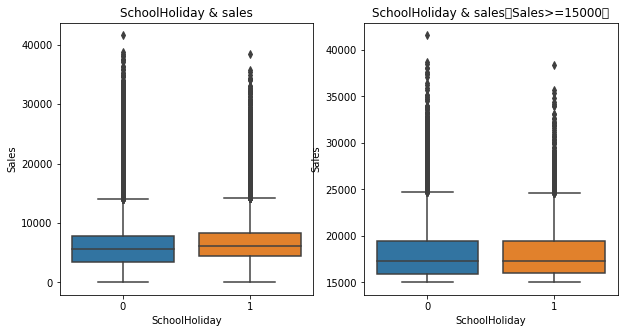

In [60]:
#对比SchoolHoliday销售分布情况

fig,ax=plt.subplots(1,2,figsize=(10,5))
#SchoolHoliday的销售分布
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'SchoolHoliday & sales'})
#SchoolHoliday的销售分布（Sales>=15000）
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new[data_train_new.Sales>=15000],ax=ax[1])
ax[1].set(**{'title':'SchoolHoliday & sales（Sales>=15000）'})


Text(0.5, 1.0, 'DayOfWeek & Sales')

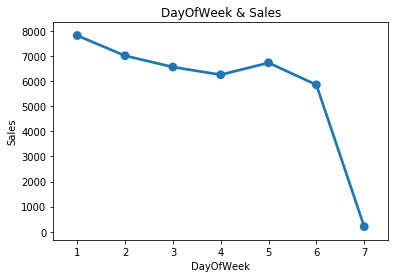

In [61]:
#一周不同的天平均每天每个店的销售情况
#sns.pointplot(data=data_train_new[::100],x='DayOfWeek',y='Sales') 让sns作groupby统计耗时非常长，所以需要先group不要做处理
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('DayOfWeek & Sales')

   DayOfWeek  open_rate
0          1   0.950459
1          2   0.988309
2          3   0.974400
3          4   0.923199
4          5   0.950598
5          6   0.995357
6          7   0.024826


Text(0.5, 1.0, 'DayOfWeek open rate')

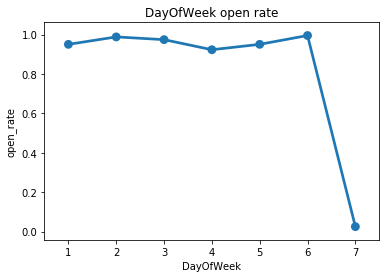

In [62]:
#一周的平均营业率
df3=data_train_new.groupby('DayOfWeek')['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
print(df3)
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('DayOfWeek open rate')

[Text(0.5, 1.0, 'Customers & sales')]

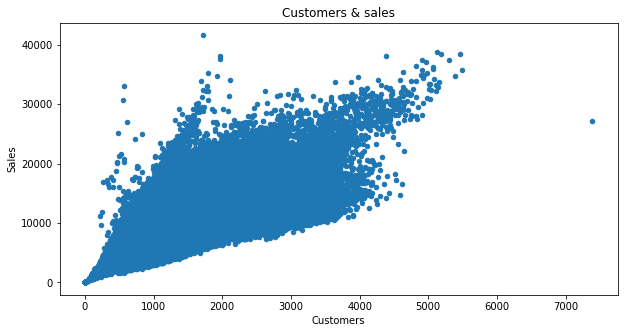

In [63]:
#顾客数与销售额的关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
data_train_new.plot.scatter(y='Sales',x='Customers',ax=ax)
ax.set(**{'title':'Customers & sales'})

[Text(0.5, 1.0, 'open & sales')]

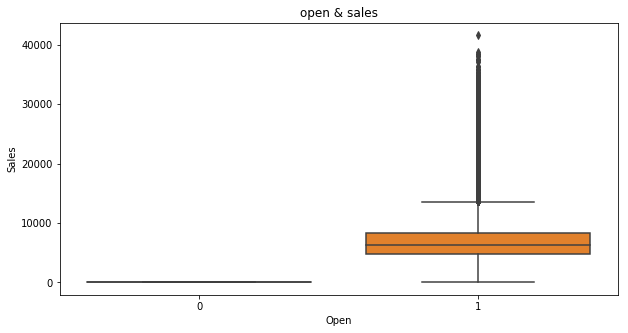

In [64]:
#探索是否营业与销售额关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Open',data=data_train_new,ax=ax)
ax.set(**{'title':'open & sales'})

Text(0.5, 1.0, 'month-avg-sales')

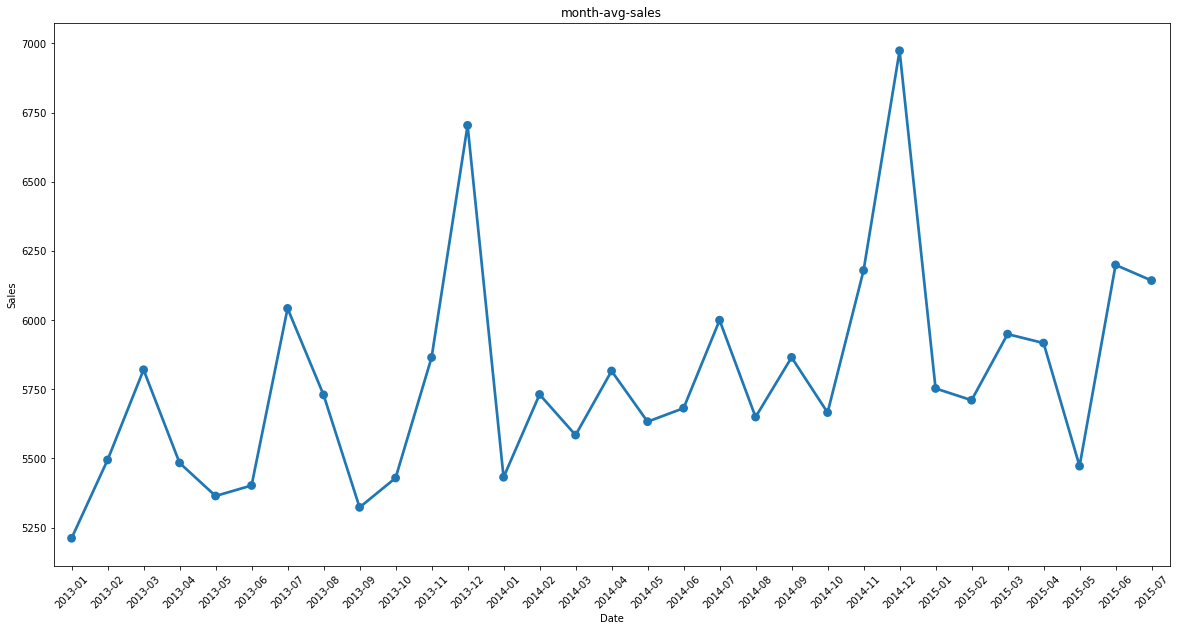

In [65]:
#探索每个月平均销售情况
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M',kind='period').mean().reset_index()#resample能够把聚合时间变成月份，去除日
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df4,x='Date',y='Sales',ax=ax)
plt.xticks(rotation=45)
ax.set_title('month-avg-sales')


In [66]:
#进入特征构建过程
#将数据分为训练集与测试集进行特征构建
#将数据先按照日期进行排序，然后取前面的作为训练集，后面6周的数据作为测试集
data_train_new = data_train_new.sort_values(['Date'],ascending = False)
ho_test = data_train_new[:6*7*1115]
ho_train = data_train_new[6*7*1115:]

In [67]:
#对于不开的店铺，销量是0，并没有分析的价值，这里直接将对应的数据去掉
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

In [68]:
#检查一下train和test数据集
ho_test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
742,743,5,2015-07-31,5085,501,1,1,0,1,a,a,6710.0,11.0,2003.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct"
748,749,5,2015-07-31,6612,716,1,1,0,1,a,a,3410.0,8.0,2011.0,1,14.0,2015.0,"Jan,Apr,Jul,Oct"
747,748,5,2015-07-31,7481,578,1,1,0,1,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
746,747,5,2015-07-31,10708,826,1,1,0,1,c,c,45740.0,8.0,2008.0,0,0.0,0.0,0


In [69]:
ho_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
47570,741,5,2015-06-19,7329,938,1,1,0,0,d,c,11900.0,0.0,0.0,0,0.0,0.0,0
47576,747,5,2015-06-19,9367,783,1,1,0,0,c,c,45740.0,8.0,2008.0,0,0.0,0.0,0
47575,746,5,2015-06-19,7856,576,1,1,0,0,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec"
47574,745,5,2015-06-19,8074,744,1,1,0,0,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
47573,744,5,2015-06-19,8626,913,1,1,0,0,a,a,1370.0,12.0,2011.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"


In [70]:
#开始进行特征工程的构建
def features_create(data):
    
    #将存在其他字符表示分类的特征转化为数字
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    #将时间特征进行拆分和转化，并加入'WeekOfYear'特征
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    #新增'CompetitionOpen'和'PromoOpen'特征,计算某天某店铺的竞争对手已营业时间和店铺已促销时间，用月为单位表示
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    #将'PromoInterval'特征转化为'IsPromoMonth'特征,表示某天某店铺是否处于促销月，1表示是，0表示否
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
 
    return data

In [126]:
#对训练数据和测试数据集合使用特征工程
print('Features creation begin')
features_create(ho_train)
features_create(ho_test)
features_create(data_test_new)
print('Features creation finished')

Features creation begin
Features creation finished


In [72]:
#将无用的特征去除掉
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)

In [127]:
data_test_new.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
0,1,1,3,2015-09-17,1.0,1,0,0,3,1,...,0.0,,2015,9,17,38,84.0,24189.5,Sept,0
1,2,3,3,2015-09-17,1.0,1,0,0,1,1,...,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0,54.0,Sept,0
2,3,7,3,2015-09-17,1.0,1,0,0,1,3,...,0.0,,2015,9,17,38,29.0,24189.5,Sept,0
3,4,8,3,2015-09-17,1.0,1,0,0,1,1,...,0.0,,2015,9,17,38,11.0,24189.5,Sept,0
4,5,9,3,2015-09-17,1.0,1,0,0,1,3,...,0.0,,2015,9,17,38,181.0,24189.5,Sept,0


In [128]:
#对要计算的结果，也把对应的特征删掉
xtest =data_test_new.drop(['Id','Date','Open','PromoInterval','monthStr'],axis = 1)
#data_test_new.head()

In [129]:
xtest.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,3,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,9,17,38,84.0,24189.5,0
1,3,3,1,0,0,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,9,17,38,105.0,54.0,0
2,7,3,1,0,0,1,3,24000.0,4.0,2013.0,0,0.0,0.0,2015,9,17,38,29.0,24189.5,0
3,8,3,1,0,0,1,1,7520.0,10.0,2014.0,0,0.0,0.0,2015,9,17,38,11.0,24189.5,0
4,9,3,1,0,0,1,3,2030.0,8.0,2000.0,0,0.0,0.0,2015,9,17,38,181.0,24189.5,0


In [73]:
#观察去除掉之后的情况
ho_train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
47570,741,4,7329,1,0,0,4,3,11900.0,0.0,...,0,0.0,0.0,2015,6,19,25,24186.0,24186.25,0
47576,747,4,9367,1,0,0,3,3,45740.0,8.0,...,0,0.0,0.0,2015,6,19,25,82.0,24186.25,0
47575,746,4,7856,1,0,0,4,3,4330.0,2.0,...,1,35.0,2011.0,2015,6,19,25,52.0,45.50,1
47574,745,4,8074,1,0,0,1,1,17650.0,11.0,...,1,37.0,2009.0,2015,6,19,25,19.0,69.00,0
47573,744,4,8626,1,0,0,1,1,1370.0,12.0,...,1,40.0,2014.0,2015,6,19,25,42.0,8.25,0


In [74]:
ho_test.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,4,5263,1,0,1,3,1,1270.0,9.0,...,0,0.0,0.0,2015,7,31,31,82.0,24187.75,0
742,743,4,5085,1,0,1,1,1,6710.0,11.0,...,1,14.0,2012.0,2015,7,31,31,140.0,40.25,1
748,749,4,6612,1,0,1,1,1,3410.0,8.0,...,1,14.0,2015.0,2015,7,31,31,47.0,4.25,1
747,748,4,7481,1,0,1,4,1,2380.0,3.0,...,1,14.0,2011.0,2015,7,31,31,64.0,52.25,1
746,747,4,10708,1,0,1,3,3,45740.0,8.0,...,0,0.0,0.0,2015,7,31,31,83.0,24187.75,0


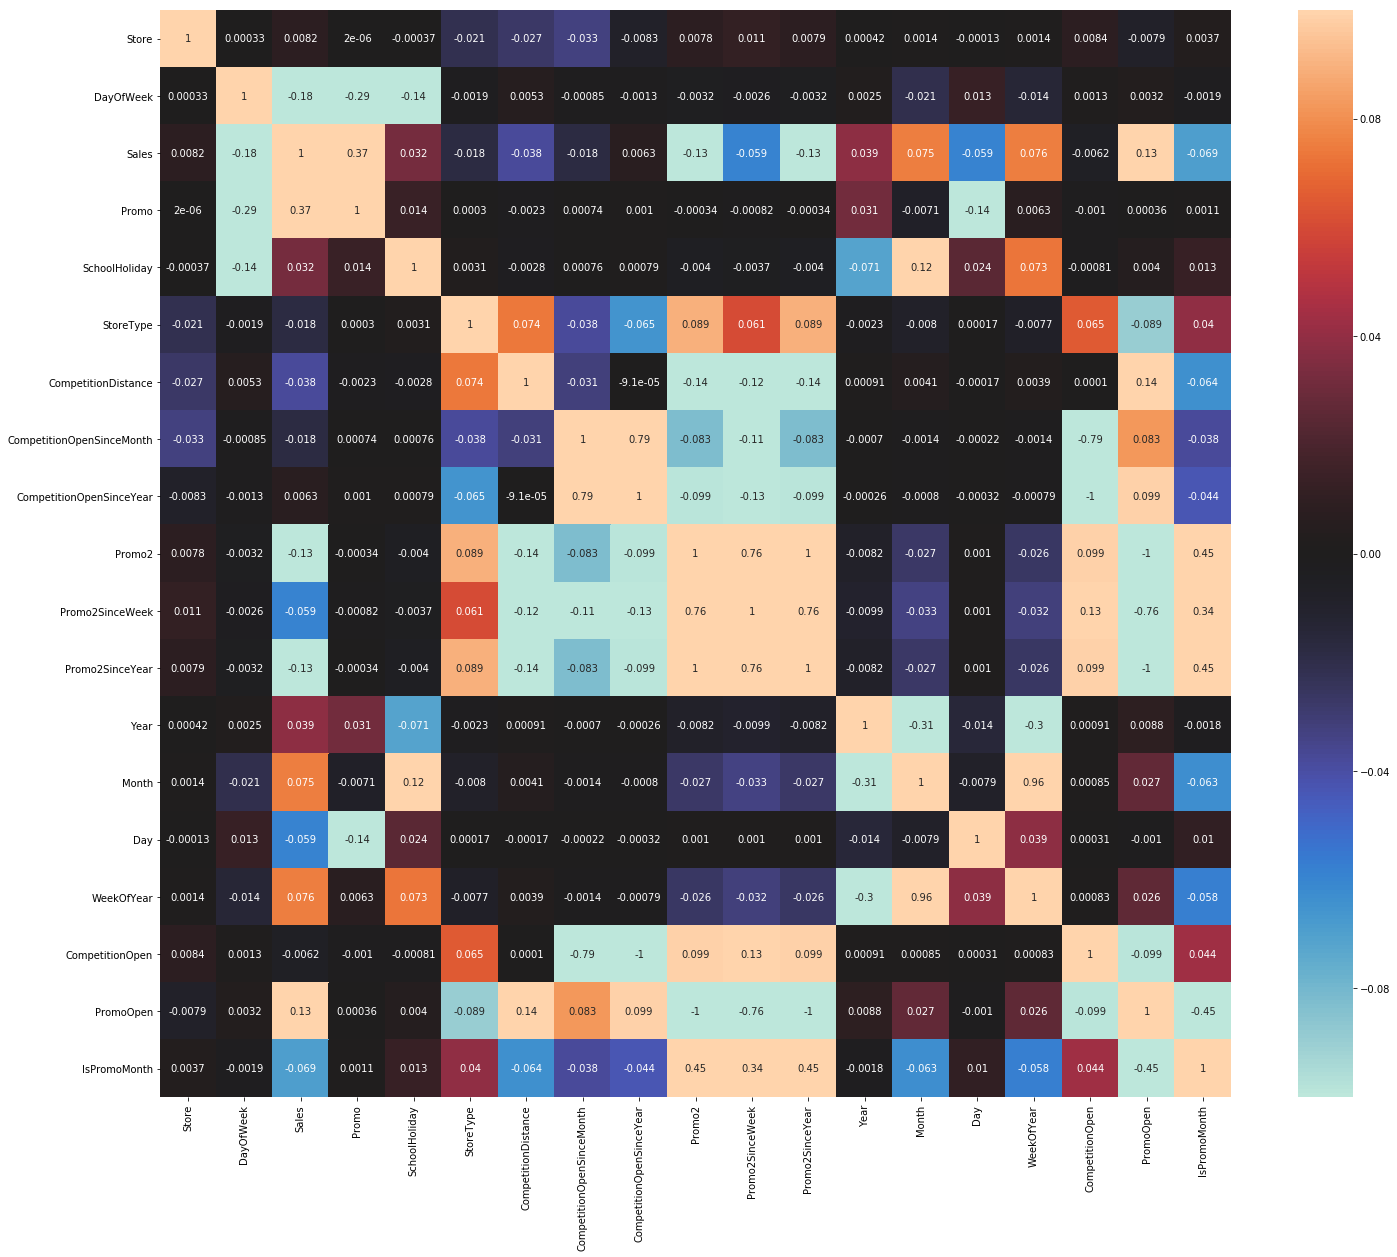

In [75]:
#观察特征之间的相关性
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

与销量相关性最强的特征为 打折 Promo，以及开启的月份

In [76]:
#将预测的标签与特征分开，并将标签进行对数处理，方便进行计算
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)

In [80]:
#自定义评估函数（rmspe）
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
 
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [81]:
#设置一组参数 输入到模型中
eta_list = [0.03,0.005]
max_depth_list = [10,15]
subsample_list = [0.8,0.9]
colsample_bytree_list = [0.7,0.8,0.9]
#num_boost_round_list = [6000,20000]

In [172]:
dict_params = {}

idx = 2
for eta in eta_list:
    for max_depth in max_depth_list:
        for subsample in subsample_list:
            for colsample_bytree in colsample_bytree_list:
                    if eta == 0.03 and max_depth == 10 and subsample == 0.8 and colsample_bytree == 0.7:continue
                    if idx not in dict_params:
                        dict_params[idx] = {
                            "objective": "reg:linear",
                            "booster" : "gbtree",
                            "eta": eta,
                            "max_depth": max_depth,
                            "subsample": subsample,
                            "colsample_bytree": colsample_bytree,
                            "silent": 1,
                            "seed": 10
                                          }
                        idx += 1 
                     
                

In [173]:
dict_params

{2: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.8,
  'colsample_bytree': 0.8,
  'silent': 1,
  'seed': 10},
 3: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.8,
  'colsample_bytree': 0.9,
  'silent': 1,
  'seed': 10},
 4: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.7,
  'silent': 1,
  'seed': 10},
 5: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.8,
  'silent': 1,
  'seed': 10},
 6: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.9,
  'silent': 1,
  'seed': 10},
 7: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 15,
  'subsample': 0.8,
  'colsample_bytree': 0.7,
  'silent': 1,
  'seed': 10},
 8: 

In [84]:
import xgboost as xgb

dtrain = xgb.DMatrix(ho_xtrain.values, ho_ytrain.values)
dvalid = xgb.DMatrix(ho_xtest.values, ho_ytest.values)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [104]:
dtrain

In [ ]:
import datetime
#训练模型
gbm_list = []
print("Train  XGBoost model")


for key in dict_params:
    params = dict_params[key]
    print(params) 
    print("begins-----")
    start = datetime.datetime.now()
    
    if params['eta'] == 0.005:
        num_boost_round = 50000
        early_stopping_rounds = 5000
    else:
        num_boost_round = 10000
        early_stopping_rounds = 1000
        
    
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,early_stopping_rounds=early_stopping_rounds, feval=rmspe_xg, verbose_eval=True)
    end = datetime.datetime.now()
    
    print(str(key) + '----------Training time is {:2f} s.'.format((end-start).total_seconds()))
    gbm_list.append([key,gbm])

Train  XGBoost model
{'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.03, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.8, 'silent': 1, 'seed': 10}
begins-----
[0]	train-rmse:8.02073	eval-rmse:8.02776	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 1000 rounds.
[1]	train-rmse:7.7806	eval-rmse:7.78775	train-rmspe:0.999711	eval-rmspe:0.999714
[2]	train-rmse:7.54774	eval-rmse:7.55408	train-rmspe:0.99959	eval-rmspe:0.999595
[3]	train-rmse:7.32189	eval-rmse:7.32771	train-rmspe:0.999444	eval-rmspe:0.999449
[4]	train-rmse:7.10282	eval-rmse:7.10789	train-rmspe:0.999266	eval-rmspe:0.999273
[5]	train-rmse:6.89033	eval-rmse:6.89475	train-rmspe:0.999052	eval-rmspe:0.999061
[6]	train-rmse:6.68415	eval-rmse:6.68861	train-rmspe:0.998798	eval-rmspe:0.998809
[7]	train-rmse:6.48412	eval-rmse:6.48909	train-rmspe:0.998497	eval-rmspe:0.998511
[8]	train-rmse:6.29

[95]	train-rmse:0.51143	eval-rmse:0.500911	train-rmspe:0.391337	eval-rmspe:0.373221
[96]	train-rmse:0.499559	eval-rmse:0.489144	train-rmspe:0.384943	eval-rmspe:0.366376
[97]	train-rmse:0.488271	eval-rmse:0.477802	train-rmspe:0.378826	eval-rmspe:0.359691
[98]	train-rmse:0.477184	eval-rmse:0.466767	train-rmspe:0.372841	eval-rmspe:0.353195
[99]	train-rmse:0.466734	eval-rmse:0.456765	train-rmspe:0.367127	eval-rmspe:0.347265
[100]	train-rmse:0.456467	eval-rmse:0.446714	train-rmspe:0.361486	eval-rmspe:0.341309
[101]	train-rmse:0.446764	eval-rmse:0.436159	train-rmspe:0.356248	eval-rmspe:0.334986
[102]	train-rmse:0.437016	eval-rmse:0.42671	train-rmspe:0.350973	eval-rmspe:0.329375
[103]	train-rmse:0.427812	eval-rmse:0.417739	train-rmspe:0.346038	eval-rmspe:0.324042
[104]	train-rmse:0.419163	eval-rmse:0.409075	train-rmspe:0.341372	eval-rmspe:0.318888
[105]	train-rmse:0.410737	eval-rmse:0.400941	train-rmspe:0.336879	eval-rmspe:0.314046
[106]	train-rmse:0.402198	eval-rmse:0.39254	train-rmspe:0.332

[191]	train-rmse:0.196987	eval-rmse:0.208153	train-rmspe:0.244497	eval-rmspe:0.221374
[192]	train-rmse:0.195691	eval-rmse:0.207006	train-rmspe:0.243598	eval-rmspe:0.220276
[193]	train-rmse:0.195375	eval-rmse:0.206899	train-rmspe:0.243501	eval-rmspe:0.220327
[194]	train-rmse:0.194696	eval-rmse:0.206348	train-rmspe:0.24199	eval-rmspe:0.219968
[195]	train-rmse:0.194029	eval-rmse:0.205794	train-rmspe:0.24165	eval-rmspe:0.219552
[196]	train-rmse:0.193111	eval-rmse:0.205022	train-rmspe:0.241016	eval-rmspe:0.21889
[197]	train-rmse:0.192649	eval-rmse:0.204765	train-rmspe:0.240728	eval-rmspe:0.218848
[198]	train-rmse:0.191761	eval-rmse:0.204085	train-rmspe:0.240111	eval-rmspe:0.218237
[199]	train-rmse:0.191508	eval-rmse:0.203999	train-rmspe:0.240087	eval-rmspe:0.218347
[200]	train-rmse:0.190866	eval-rmse:0.203397	train-rmspe:0.239642	eval-rmspe:0.217898
[201]	train-rmse:0.190189	eval-rmse:0.20284	train-rmspe:0.238569	eval-rmspe:0.217452
[202]	train-rmse:0.18996	eval-rmse:0.202694	train-rmspe:0.

[287]	train-rmse:0.156962	eval-rmse:0.174178	train-rmspe:0.202867	eval-rmspe:0.190079
[288]	train-rmse:0.156747	eval-rmse:0.174175	train-rmspe:0.202693	eval-rmspe:0.19017
[289]	train-rmse:0.15643	eval-rmse:0.173849	train-rmspe:0.202419	eval-rmspe:0.189789
[290]	train-rmse:0.156202	eval-rmse:0.173672	train-rmspe:0.20215	eval-rmspe:0.189609
[291]	train-rmse:0.155916	eval-rmse:0.173429	train-rmspe:0.201898	eval-rmspe:0.189325
[292]	train-rmse:0.15522	eval-rmse:0.172773	train-rmspe:0.201298	eval-rmspe:0.188618
[293]	train-rmse:0.155006	eval-rmse:0.17264	train-rmspe:0.201105	eval-rmspe:0.188474
[294]	train-rmse:0.154513	eval-rmse:0.172239	train-rmspe:0.200667	eval-rmspe:0.188007
[295]	train-rmse:0.154418	eval-rmse:0.172157	train-rmspe:0.19952	eval-rmspe:0.18792
[296]	train-rmse:0.154191	eval-rmse:0.171915	train-rmspe:0.19932	eval-rmspe:0.18764
[297]	train-rmse:0.153946	eval-rmse:0.171783	train-rmspe:0.19842	eval-rmspe:0.187524
[298]	train-rmse:0.153821	eval-rmse:0.171712	train-rmspe:0.19826

[383]	train-rmse:0.134103	eval-rmse:0.15541	train-rmspe:0.175252	eval-rmspe:0.169822
[384]	train-rmse:0.134047	eval-rmse:0.15536	train-rmspe:0.175166	eval-rmspe:0.169776
[385]	train-rmse:0.133943	eval-rmse:0.15528	train-rmspe:0.175067	eval-rmspe:0.169681
[386]	train-rmse:0.13375	eval-rmse:0.1551	train-rmspe:0.174898	eval-rmspe:0.169486
[387]	train-rmse:0.133443	eval-rmse:0.154859	train-rmspe:0.174612	eval-rmspe:0.169208
[388]	train-rmse:0.13339	eval-rmse:0.154818	train-rmspe:0.17456	eval-rmspe:0.169162
[389]	train-rmse:0.133261	eval-rmse:0.154603	train-rmspe:0.174466	eval-rmspe:0.168923
[390]	train-rmse:0.13312	eval-rmse:0.154478	train-rmspe:0.174343	eval-rmspe:0.16878
[391]	train-rmse:0.13299	eval-rmse:0.154377	train-rmspe:0.174229	eval-rmspe:0.168682
[392]	train-rmse:0.132709	eval-rmse:0.154169	train-rmspe:0.174025	eval-rmspe:0.168459
[393]	train-rmse:0.132642	eval-rmse:0.154107	train-rmspe:0.173957	eval-rmspe:0.168392
[394]	train-rmse:0.132495	eval-rmse:0.153957	train-rmspe:0.173718

[479]	train-rmse:0.119695	eval-rmse:0.14466	train-rmspe:0.157783	eval-rmspe:0.158133
[480]	train-rmse:0.119566	eval-rmse:0.144567	train-rmspe:0.157692	eval-rmspe:0.158039
[481]	train-rmse:0.119493	eval-rmse:0.144575	train-rmspe:0.157109	eval-rmspe:0.158054
[482]	train-rmse:0.119419	eval-rmse:0.144491	train-rmspe:0.15703	eval-rmspe:0.157961
[483]	train-rmse:0.119222	eval-rmse:0.144363	train-rmspe:0.15685	eval-rmspe:0.157818
[484]	train-rmse:0.119061	eval-rmse:0.14423	train-rmspe:0.15663	eval-rmspe:0.157669
[485]	train-rmse:0.118852	eval-rmse:0.144049	train-rmspe:0.156455	eval-rmspe:0.157479
[486]	train-rmse:0.118798	eval-rmse:0.144019	train-rmspe:0.15641	eval-rmspe:0.157443
[487]	train-rmse:0.118718	eval-rmse:0.143941	train-rmspe:0.156342	eval-rmspe:0.157345
[488]	train-rmse:0.118524	eval-rmse:0.14379	train-rmspe:0.156174	eval-rmspe:0.157173
[489]	train-rmse:0.118318	eval-rmse:0.143652	train-rmspe:0.155936	eval-rmspe:0.157003
[490]	train-rmse:0.118138	eval-rmse:0.143465	train-rmspe:0.15

[575]	train-rmse:0.109659	eval-rmse:0.137575	train-rmspe:0.145517	eval-rmspe:0.150178
[576]	train-rmse:0.10954	eval-rmse:0.13749	train-rmspe:0.145413	eval-rmspe:0.15008
[577]	train-rmse:0.109473	eval-rmse:0.137449	train-rmspe:0.145337	eval-rmspe:0.150036
[578]	train-rmse:0.109386	eval-rmse:0.137399	train-rmspe:0.145139	eval-rmspe:0.149981
[579]	train-rmse:0.109343	eval-rmse:0.137354	train-rmspe:0.145307	eval-rmspe:0.149927
[580]	train-rmse:0.109299	eval-rmse:0.137327	train-rmspe:0.145271	eval-rmspe:0.149898
[581]	train-rmse:0.109239	eval-rmse:0.137282	train-rmspe:0.145056	eval-rmspe:0.149848
[582]	train-rmse:0.109188	eval-rmse:0.137258	train-rmspe:0.144927	eval-rmspe:0.149819
[583]	train-rmse:0.109172	eval-rmse:0.137248	train-rmspe:0.144915	eval-rmspe:0.149809
[584]	train-rmse:0.109115	eval-rmse:0.137111	train-rmspe:0.144869	eval-rmspe:0.149633
[585]	train-rmse:0.108914	eval-rmse:0.136971	train-rmspe:0.144661	eval-rmspe:0.149475
[586]	train-rmse:0.108774	eval-rmse:0.136869	train-rmspe:

[671]	train-rmse:0.102789	eval-rmse:0.132519	train-rmspe:0.133216	eval-rmspe:0.144302
[672]	train-rmse:0.102723	eval-rmse:0.132484	train-rmspe:0.133155	eval-rmspe:0.144261
[673]	train-rmse:0.102706	eval-rmse:0.132473	train-rmspe:0.133141	eval-rmspe:0.144251
[674]	train-rmse:0.102675	eval-rmse:0.132458	train-rmspe:0.133342	eval-rmspe:0.144233
[675]	train-rmse:0.102641	eval-rmse:0.132432	train-rmspe:0.133311	eval-rmspe:0.144203
[676]	train-rmse:0.102618	eval-rmse:0.132384	train-rmspe:0.133289	eval-rmspe:0.144138
[677]	train-rmse:0.102563	eval-rmse:0.132354	train-rmspe:0.133199	eval-rmspe:0.144107
[678]	train-rmse:0.102497	eval-rmse:0.132321	train-rmspe:0.133132	eval-rmspe:0.144071
[679]	train-rmse:0.10244	eval-rmse:0.132312	train-rmspe:0.133086	eval-rmspe:0.144062
[680]	train-rmse:0.102335	eval-rmse:0.132241	train-rmspe:0.132993	eval-rmspe:0.143979
[681]	train-rmse:0.102318	eval-rmse:0.132227	train-rmspe:0.132939	eval-rmspe:0.143966
[682]	train-rmse:0.102276	eval-rmse:0.132199	train-rmsp

[767]	train-rmse:0.097693	eval-rmse:0.129614	train-rmspe:0.125264	eval-rmspe:0.140996
[768]	train-rmse:0.097625	eval-rmse:0.129572	train-rmspe:0.125208	eval-rmspe:0.140954
[769]	train-rmse:0.097536	eval-rmse:0.12951	train-rmspe:0.125127	eval-rmspe:0.14088
[770]	train-rmse:0.097507	eval-rmse:0.129489	train-rmspe:0.125092	eval-rmspe:0.140853
[771]	train-rmse:0.097447	eval-rmse:0.129463	train-rmspe:0.125039	eval-rmspe:0.14083
[772]	train-rmse:0.097368	eval-rmse:0.1294	train-rmspe:0.124971	eval-rmspe:0.140756
[773]	train-rmse:0.097314	eval-rmse:0.129433	train-rmspe:0.124854	eval-rmspe:0.140805
[774]	train-rmse:0.097275	eval-rmse:0.129397	train-rmspe:0.124823	eval-rmspe:0.140764
[775]	train-rmse:0.097206	eval-rmse:0.129354	train-rmspe:0.124758	eval-rmspe:0.140717
[776]	train-rmse:0.097178	eval-rmse:0.129306	train-rmspe:0.124726	eval-rmspe:0.140645
[777]	train-rmse:0.09715	eval-rmse:0.129296	train-rmspe:0.124701	eval-rmspe:0.14063
[778]	train-rmse:0.097123	eval-rmse:0.12928	train-rmspe:0.124

[863]	train-rmse:0.093632	eval-rmse:0.1277	train-rmspe:0.118347	eval-rmspe:0.138884
[864]	train-rmse:0.093608	eval-rmse:0.127687	train-rmspe:0.118319	eval-rmspe:0.138872
[865]	train-rmse:0.093579	eval-rmse:0.12767	train-rmspe:0.118296	eval-rmspe:0.138854
[866]	train-rmse:0.093564	eval-rmse:0.127672	train-rmspe:0.11828	eval-rmspe:0.138857
[867]	train-rmse:0.093529	eval-rmse:0.127654	train-rmspe:0.118248	eval-rmspe:0.138833
[868]	train-rmse:0.093509	eval-rmse:0.127646	train-rmspe:0.118228	eval-rmspe:0.138824
[869]	train-rmse:0.093463	eval-rmse:0.127682	train-rmspe:0.118184	eval-rmspe:0.138877
[870]	train-rmse:0.093452	eval-rmse:0.127683	train-rmspe:0.118169	eval-rmspe:0.138878
[871]	train-rmse:0.093431	eval-rmse:0.127677	train-rmspe:0.118151	eval-rmspe:0.138874
[872]	train-rmse:0.093408	eval-rmse:0.127675	train-rmspe:0.118115	eval-rmspe:0.138875
[873]	train-rmse:0.09336	eval-rmse:0.127651	train-rmspe:0.118071	eval-rmspe:0.13885
[874]	train-rmse:0.093323	eval-rmse:0.12772	train-rmspe:0.11

[959]	train-rmse:0.090716	eval-rmse:0.126458	train-rmspe:0.114613	eval-rmspe:0.137464
[960]	train-rmse:0.090672	eval-rmse:0.126436	train-rmspe:0.114567	eval-rmspe:0.13744
[961]	train-rmse:0.09065	eval-rmse:0.126422	train-rmspe:0.114542	eval-rmspe:0.137426
[962]	train-rmse:0.090633	eval-rmse:0.12641	train-rmspe:0.114526	eval-rmspe:0.13741
[963]	train-rmse:0.090622	eval-rmse:0.126412	train-rmspe:0.114508	eval-rmspe:0.13741
[964]	train-rmse:0.090608	eval-rmse:0.126407	train-rmspe:0.114496	eval-rmspe:0.137406
[965]	train-rmse:0.090586	eval-rmse:0.126383	train-rmspe:0.114444	eval-rmspe:0.137383
[966]	train-rmse:0.090553	eval-rmse:0.126382	train-rmspe:0.114408	eval-rmspe:0.137386
[967]	train-rmse:0.090525	eval-rmse:0.126373	train-rmspe:0.114384	eval-rmspe:0.137374
[968]	train-rmse:0.090492	eval-rmse:0.126357	train-rmspe:0.114347	eval-rmspe:0.137357
[969]	train-rmse:0.090471	eval-rmse:0.126342	train-rmspe:0.114327	eval-rmspe:0.137336
[970]	train-rmse:0.090442	eval-rmse:0.126318	train-rmspe:0.

[1055]	train-rmse:0.088248	eval-rmse:0.125581	train-rmspe:0.10755	eval-rmspe:0.136473
[1056]	train-rmse:0.088231	eval-rmse:0.125572	train-rmspe:0.107526	eval-rmspe:0.13646
[1057]	train-rmse:0.088204	eval-rmse:0.125562	train-rmspe:0.107488	eval-rmspe:0.136455
[1058]	train-rmse:0.088172	eval-rmse:0.12554	train-rmspe:0.10745	eval-rmspe:0.136435
[1059]	train-rmse:0.088153	eval-rmse:0.12553	train-rmspe:0.107442	eval-rmspe:0.136425
[1060]	train-rmse:0.088122	eval-rmse:0.125519	train-rmspe:0.107412	eval-rmspe:0.136413
[1061]	train-rmse:0.088094	eval-rmse:0.125506	train-rmspe:0.107379	eval-rmspe:0.136398
[1062]	train-rmse:0.088081	eval-rmse:0.125501	train-rmspe:0.107302	eval-rmspe:0.136392
[1063]	train-rmse:0.088058	eval-rmse:0.125508	train-rmspe:0.107231	eval-rmspe:0.136406
[1064]	train-rmse:0.088027	eval-rmse:0.125491	train-rmspe:0.107203	eval-rmspe:0.136385
[1065]	train-rmse:0.087998	eval-rmse:0.125483	train-rmspe:0.107166	eval-rmspe:0.136375
[1066]	train-rmse:0.087984	eval-rmse:0.125489	tr

[1150]	train-rmse:0.0863	eval-rmse:0.124938	train-rmspe:0.103067	eval-rmspe:0.135781
[1151]	train-rmse:0.086275	eval-rmse:0.124937	train-rmspe:0.103046	eval-rmspe:0.135781
[1152]	train-rmse:0.08626	eval-rmse:0.12494	train-rmspe:0.103031	eval-rmspe:0.135784
[1153]	train-rmse:0.086239	eval-rmse:0.12494	train-rmspe:0.103001	eval-rmspe:0.135787
[1154]	train-rmse:0.086211	eval-rmse:0.124898	train-rmspe:0.102959	eval-rmspe:0.135729
[1155]	train-rmse:0.086201	eval-rmse:0.124896	train-rmspe:0.102992	eval-rmspe:0.135727
[1156]	train-rmse:0.086186	eval-rmse:0.124889	train-rmspe:0.102978	eval-rmspe:0.13572
[1157]	train-rmse:0.086163	eval-rmse:0.124886	train-rmspe:0.102951	eval-rmspe:0.135718
[1158]	train-rmse:0.08614	eval-rmse:0.124879	train-rmspe:0.10292	eval-rmspe:0.13571
[1159]	train-rmse:0.086122	eval-rmse:0.124881	train-rmspe:0.102904	eval-rmspe:0.135713
[1160]	train-rmse:0.086093	eval-rmse:0.124862	train-rmspe:0.102868	eval-rmspe:0.135693
[1161]	train-rmse:0.086073	eval-rmse:0.124851	train-

[1245]	train-rmse:0.084425	eval-rmse:0.124273	train-rmspe:0.09994	eval-rmspe:0.134978
[1246]	train-rmse:0.084407	eval-rmse:0.124267	train-rmspe:0.099919	eval-rmspe:0.134973
[1247]	train-rmse:0.084385	eval-rmse:0.124259	train-rmspe:0.099898	eval-rmspe:0.134969
[1248]	train-rmse:0.084367	eval-rmse:0.124257	train-rmspe:0.099868	eval-rmspe:0.134969
[1249]	train-rmse:0.084348	eval-rmse:0.124254	train-rmspe:0.099833	eval-rmspe:0.134966
[1250]	train-rmse:0.084317	eval-rmse:0.124241	train-rmspe:0.099789	eval-rmspe:0.134952
[1251]	train-rmse:0.084303	eval-rmse:0.124239	train-rmspe:0.099772	eval-rmspe:0.134952
[1252]	train-rmse:0.084282	eval-rmse:0.124233	train-rmspe:0.099668	eval-rmspe:0.134948
[1253]	train-rmse:0.084262	eval-rmse:0.124233	train-rmspe:0.099647	eval-rmspe:0.134946
[1254]	train-rmse:0.084242	eval-rmse:0.124227	train-rmspe:0.099614	eval-rmspe:0.134943
[1255]	train-rmse:0.084223	eval-rmse:0.124225	train-rmspe:0.099592	eval-rmspe:0.134939
[1256]	train-rmse:0.084201	eval-rmse:0.12421

[1340]	train-rmse:0.082617	eval-rmse:0.123833	train-rmspe:0.09662	eval-rmspe:0.134528
[1341]	train-rmse:0.082605	eval-rmse:0.123831	train-rmspe:0.096608	eval-rmspe:0.134527
[1342]	train-rmse:0.082582	eval-rmse:0.123822	train-rmspe:0.096583	eval-rmspe:0.134518
[1343]	train-rmse:0.082564	eval-rmse:0.123815	train-rmspe:0.096566	eval-rmspe:0.134509
[1344]	train-rmse:0.082545	eval-rmse:0.12381	train-rmspe:0.096547	eval-rmspe:0.134505
[1345]	train-rmse:0.08253	eval-rmse:0.123806	train-rmspe:0.096531	eval-rmspe:0.134501
[1346]	train-rmse:0.082511	eval-rmse:0.123802	train-rmspe:0.096506	eval-rmspe:0.134496
[1347]	train-rmse:0.082492	eval-rmse:0.123792	train-rmspe:0.096488	eval-rmspe:0.134484
[1348]	train-rmse:0.08248	eval-rmse:0.123798	train-rmspe:0.096474	eval-rmspe:0.134493
[1349]	train-rmse:0.082466	eval-rmse:0.123794	train-rmspe:0.096454	eval-rmspe:0.134489
[1350]	train-rmse:0.082445	eval-rmse:0.123795	train-rmspe:0.096433	eval-rmspe:0.13449
[1351]	train-rmse:0.082426	eval-rmse:0.123797	tr

[1435]	train-rmse:0.081083	eval-rmse:0.123504	train-rmspe:0.094008	eval-rmspe:0.13418
[1436]	train-rmse:0.08107	eval-rmse:0.123499	train-rmspe:0.093992	eval-rmspe:0.134174
[1437]	train-rmse:0.081058	eval-rmse:0.123499	train-rmspe:0.093979	eval-rmspe:0.134174
[1438]	train-rmse:0.081046	eval-rmse:0.123497	train-rmspe:0.093966	eval-rmspe:0.134172
[1439]	train-rmse:0.081032	eval-rmse:0.123497	train-rmspe:0.093946	eval-rmspe:0.13417
[1440]	train-rmse:0.081019	eval-rmse:0.123498	train-rmspe:0.093935	eval-rmspe:0.13417
[1441]	train-rmse:0.081011	eval-rmse:0.123496	train-rmspe:0.093927	eval-rmspe:0.134169
[1442]	train-rmse:0.081001	eval-rmse:0.123493	train-rmspe:0.093913	eval-rmspe:0.134168
[1443]	train-rmse:0.080994	eval-rmse:0.123489	train-rmspe:0.093906	eval-rmspe:0.134164
[1444]	train-rmse:0.08098	eval-rmse:0.123484	train-rmspe:0.093893	eval-rmspe:0.134159
[1445]	train-rmse:0.080972	eval-rmse:0.123481	train-rmspe:0.093884	eval-rmspe:0.134155
[1446]	train-rmse:0.080959	eval-rmse:0.123475	tr

[1530]	train-rmse:0.079682	eval-rmse:0.123115	train-rmspe:0.090702	eval-rmspe:0.133675
[1531]	train-rmse:0.079663	eval-rmse:0.123109	train-rmspe:0.090684	eval-rmspe:0.133666
[1532]	train-rmse:0.079643	eval-rmse:0.123102	train-rmspe:0.09065	eval-rmspe:0.133658
[1533]	train-rmse:0.079629	eval-rmse:0.123101	train-rmspe:0.090638	eval-rmspe:0.133658
[1534]	train-rmse:0.079615	eval-rmse:0.123092	train-rmspe:0.090646	eval-rmspe:0.133647
[1535]	train-rmse:0.079602	eval-rmse:0.123091	train-rmspe:0.090635	eval-rmspe:0.13365
[1536]	train-rmse:0.079592	eval-rmse:0.123087	train-rmspe:0.090624	eval-rmspe:0.133643
[1537]	train-rmse:0.079576	eval-rmse:0.123093	train-rmspe:0.090596	eval-rmspe:0.133651
[1538]	train-rmse:0.079555	eval-rmse:0.123087	train-rmspe:0.090574	eval-rmspe:0.133644
[1539]	train-rmse:0.079539	eval-rmse:0.12308	train-rmspe:0.090557	eval-rmspe:0.133635
[1540]	train-rmse:0.079528	eval-rmse:0.123078	train-rmspe:0.090545	eval-rmspe:0.13363
[1541]	train-rmse:0.079515	eval-rmse:0.123073	t

[1625]	train-rmse:0.078337	eval-rmse:0.122859	train-rmspe:0.088175	eval-rmspe:0.133409
[1626]	train-rmse:0.078328	eval-rmse:0.122859	train-rmspe:0.088159	eval-rmspe:0.13341
[1627]	train-rmse:0.078303	eval-rmse:0.122847	train-rmspe:0.088133	eval-rmspe:0.133396
[1628]	train-rmse:0.078289	eval-rmse:0.122844	train-rmspe:0.088117	eval-rmspe:0.133395
[1629]	train-rmse:0.078282	eval-rmse:0.122843	train-rmspe:0.088107	eval-rmspe:0.133394
[1630]	train-rmse:0.078273	eval-rmse:0.122863	train-rmspe:0.088098	eval-rmspe:0.133419
[1631]	train-rmse:0.078265	eval-rmse:0.122864	train-rmspe:0.088083	eval-rmspe:0.133419
[1632]	train-rmse:0.078249	eval-rmse:0.122862	train-rmspe:0.088066	eval-rmspe:0.13342
[1633]	train-rmse:0.078234	eval-rmse:0.122872	train-rmspe:0.088051	eval-rmspe:0.133428
[1634]	train-rmse:0.078225	eval-rmse:0.122869	train-rmspe:0.087957	eval-rmspe:0.133424
[1635]	train-rmse:0.078214	eval-rmse:0.122863	train-rmspe:0.087944	eval-rmspe:0.133415
[1636]	train-rmse:0.078203	eval-rmse:0.12286	

[1720]	train-rmse:0.0771	eval-rmse:0.122606	train-rmspe:0.085466	eval-rmspe:0.13313
[1721]	train-rmse:0.07708	eval-rmse:0.122607	train-rmspe:0.085447	eval-rmspe:0.133132
[1722]	train-rmse:0.077069	eval-rmse:0.122609	train-rmspe:0.085374	eval-rmspe:0.133137
[1723]	train-rmse:0.077051	eval-rmse:0.122607	train-rmspe:0.085319	eval-rmspe:0.133136
[1724]	train-rmse:0.077041	eval-rmse:0.122606	train-rmspe:0.085289	eval-rmspe:0.133135
[1725]	train-rmse:0.077032	eval-rmse:0.122603	train-rmspe:0.085274	eval-rmspe:0.13313
[1726]	train-rmse:0.077017	eval-rmse:0.1226	train-rmspe:0.085256	eval-rmspe:0.133128
[1727]	train-rmse:0.077006	eval-rmse:0.122598	train-rmspe:0.085242	eval-rmspe:0.133127
[1728]	train-rmse:0.076996	eval-rmse:0.122596	train-rmspe:0.08523	eval-rmspe:0.133124
[1729]	train-rmse:0.076986	eval-rmse:0.122597	train-rmspe:0.085219	eval-rmspe:0.133127
[1730]	train-rmse:0.076971	eval-rmse:0.122609	train-rmspe:0.0852	eval-rmspe:0.133144
[1731]	train-rmse:0.076961	eval-rmse:0.122608	train-r

[1815]	train-rmse:0.075928	eval-rmse:0.122423	train-rmspe:0.083369	eval-rmspe:0.132935
[1816]	train-rmse:0.07592	eval-rmse:0.122423	train-rmspe:0.083345	eval-rmspe:0.132934
[1817]	train-rmse:0.075911	eval-rmse:0.122419	train-rmspe:0.083336	eval-rmspe:0.13293
[1818]	train-rmse:0.075907	eval-rmse:0.122422	train-rmspe:0.083331	eval-rmspe:0.132934
[1819]	train-rmse:0.075893	eval-rmse:0.122428	train-rmspe:0.083305	eval-rmspe:0.13294
[1820]	train-rmse:0.075885	eval-rmse:0.122425	train-rmspe:0.083291	eval-rmspe:0.132937
[1821]	train-rmse:0.075877	eval-rmse:0.122422	train-rmspe:0.083283	eval-rmspe:0.132934
[1822]	train-rmse:0.075864	eval-rmse:0.122415	train-rmspe:0.083268	eval-rmspe:0.132925
[1823]	train-rmse:0.075857	eval-rmse:0.122408	train-rmspe:0.083261	eval-rmspe:0.132915
[1824]	train-rmse:0.075847	eval-rmse:0.122411	train-rmspe:0.083251	eval-rmspe:0.13292
[1825]	train-rmse:0.07584	eval-rmse:0.122408	train-rmspe:0.083243	eval-rmspe:0.132917
[1826]	train-rmse:0.075817	eval-rmse:0.122396	tr

[1910]	train-rmse:0.074844	eval-rmse:0.122211	train-rmspe:0.081633	eval-rmspe:0.132686
[1911]	train-rmse:0.074834	eval-rmse:0.122209	train-rmspe:0.081621	eval-rmspe:0.132686
[1912]	train-rmse:0.074824	eval-rmse:0.122211	train-rmspe:0.08161	eval-rmspe:0.13269
[1913]	train-rmse:0.074813	eval-rmse:0.122206	train-rmspe:0.081591	eval-rmspe:0.132683
[1914]	train-rmse:0.074809	eval-rmse:0.122203	train-rmspe:0.081587	eval-rmspe:0.132679
[1915]	train-rmse:0.074801	eval-rmse:0.122199	train-rmspe:0.081578	eval-rmspe:0.132674
[1916]	train-rmse:0.074792	eval-rmse:0.122208	train-rmspe:0.081566	eval-rmspe:0.132687
[1917]	train-rmse:0.074778	eval-rmse:0.122213	train-rmspe:0.081541	eval-rmspe:0.132697
[1918]	train-rmse:0.07477	eval-rmse:0.122211	train-rmspe:0.081528	eval-rmspe:0.132696
[1919]	train-rmse:0.074754	eval-rmse:0.122208	train-rmspe:0.081505	eval-rmspe:0.132692
[1920]	train-rmse:0.074744	eval-rmse:0.122207	train-rmspe:0.081487	eval-rmspe:0.132691
[1921]	train-rmse:0.074732	eval-rmse:0.122208	

[2005]	train-rmse:0.07389	eval-rmse:0.122028	train-rmspe:0.080325	eval-rmspe:0.132487
[2006]	train-rmse:0.073876	eval-rmse:0.122025	train-rmspe:0.080306	eval-rmspe:0.132483
[2007]	train-rmse:0.073868	eval-rmse:0.122034	train-rmspe:0.080289	eval-rmspe:0.132495
[2008]	train-rmse:0.073858	eval-rmse:0.122033	train-rmspe:0.080277	eval-rmspe:0.132495
[2009]	train-rmse:0.073841	eval-rmse:0.122035	train-rmspe:0.08025	eval-rmspe:0.132499
[2010]	train-rmse:0.073834	eval-rmse:0.122039	train-rmspe:0.0802	eval-rmspe:0.132505
[2011]	train-rmse:0.073825	eval-rmse:0.122042	train-rmspe:0.080185	eval-rmspe:0.13251
[2012]	train-rmse:0.073813	eval-rmse:0.122041	train-rmspe:0.080163	eval-rmspe:0.132511
[2013]	train-rmse:0.073799	eval-rmse:0.122037	train-rmspe:0.080144	eval-rmspe:0.132505
[2014]	train-rmse:0.073789	eval-rmse:0.122033	train-rmspe:0.080132	eval-rmspe:0.132502
[2015]	train-rmse:0.073782	eval-rmse:0.122036	train-rmspe:0.080125	eval-rmspe:0.132506
[2016]	train-rmse:0.073771	eval-rmse:0.122031	tr

[2100]	train-rmse:0.072952	eval-rmse:0.121916	train-rmspe:0.078959	eval-rmspe:0.13239
[2101]	train-rmse:0.072942	eval-rmse:0.121915	train-rmspe:0.078946	eval-rmspe:0.132391
[2102]	train-rmse:0.072934	eval-rmse:0.121916	train-rmspe:0.078938	eval-rmspe:0.132391
[2103]	train-rmse:0.072928	eval-rmse:0.121917	train-rmspe:0.078932	eval-rmspe:0.132393
[2104]	train-rmse:0.07292	eval-rmse:0.121917	train-rmspe:0.078922	eval-rmspe:0.132393
[2105]	train-rmse:0.072912	eval-rmse:0.121913	train-rmspe:0.078903	eval-rmspe:0.132394
[2106]	train-rmse:0.072905	eval-rmse:0.121911	train-rmspe:0.078895	eval-rmspe:0.132392
[2107]	train-rmse:0.072897	eval-rmse:0.121915	train-rmspe:0.078883	eval-rmspe:0.1324
[2108]	train-rmse:0.072887	eval-rmse:0.121911	train-rmspe:0.078877	eval-rmspe:0.132399
[2109]	train-rmse:0.072878	eval-rmse:0.121905	train-rmspe:0.078865	eval-rmspe:0.132391
[2110]	train-rmse:0.072868	eval-rmse:0.121902	train-rmspe:0.078855	eval-rmspe:0.13239
[2111]	train-rmse:0.072854	eval-rmse:0.121903	tr

[2195]	train-rmse:0.072017	eval-rmse:0.121821	train-rmspe:0.077678	eval-rmspe:0.132319
[2196]	train-rmse:0.07201	eval-rmse:0.121818	train-rmspe:0.07767	eval-rmspe:0.132315
[2197]	train-rmse:0.071999	eval-rmse:0.121811	train-rmspe:0.077659	eval-rmspe:0.132308
[2198]	train-rmse:0.07199	eval-rmse:0.121811	train-rmspe:0.077646	eval-rmspe:0.132307
[2199]	train-rmse:0.071979	eval-rmse:0.12181	train-rmspe:0.077596	eval-rmspe:0.132307
[2200]	train-rmse:0.071971	eval-rmse:0.121806	train-rmspe:0.077586	eval-rmspe:0.132302
[2201]	train-rmse:0.071965	eval-rmse:0.121808	train-rmspe:0.077568	eval-rmspe:0.132305
[2202]	train-rmse:0.071957	eval-rmse:0.121809	train-rmspe:0.077557	eval-rmspe:0.132306
[2203]	train-rmse:0.071948	eval-rmse:0.121807	train-rmspe:0.077548	eval-rmspe:0.132305
[2204]	train-rmse:0.071942	eval-rmse:0.121817	train-rmspe:0.07754	eval-rmspe:0.132316
[2205]	train-rmse:0.071934	eval-rmse:0.121817	train-rmspe:0.077531	eval-rmspe:0.132315
[2206]	train-rmse:0.071927	eval-rmse:0.121832	tr

[2290]	train-rmse:0.071167	eval-rmse:0.12178	train-rmspe:0.076485	eval-rmspe:0.132234
[2291]	train-rmse:0.071157	eval-rmse:0.121782	train-rmspe:0.076467	eval-rmspe:0.132238
[2292]	train-rmse:0.071149	eval-rmse:0.121783	train-rmspe:0.076456	eval-rmspe:0.13224
[2293]	train-rmse:0.071134	eval-rmse:0.121777	train-rmspe:0.076436	eval-rmspe:0.132233
[2294]	train-rmse:0.071133	eval-rmse:0.121777	train-rmspe:0.076435	eval-rmspe:0.132232
[2295]	train-rmse:0.071127	eval-rmse:0.121776	train-rmspe:0.076429	eval-rmspe:0.132231
[2296]	train-rmse:0.071118	eval-rmse:0.121774	train-rmspe:0.076418	eval-rmspe:0.13223
[2297]	train-rmse:0.071105	eval-rmse:0.121773	train-rmspe:0.0764	eval-rmspe:0.132229
[2298]	train-rmse:0.071094	eval-rmse:0.121772	train-rmspe:0.076381	eval-rmspe:0.132228
[2299]	train-rmse:0.071083	eval-rmse:0.121769	train-rmspe:0.076368	eval-rmspe:0.132223
[2300]	train-rmse:0.071076	eval-rmse:0.121764	train-rmspe:0.076359	eval-rmspe:0.132216
[2301]	train-rmse:0.071069	eval-rmse:0.121763	tr

[2385]	train-rmse:0.070364	eval-rmse:0.121716	train-rmspe:0.075416	eval-rmspe:0.132171
[2386]	train-rmse:0.070357	eval-rmse:0.121716	train-rmspe:0.075409	eval-rmspe:0.13217
[2387]	train-rmse:0.070346	eval-rmse:0.121717	train-rmspe:0.075395	eval-rmspe:0.132171
[2388]	train-rmse:0.070342	eval-rmse:0.121718	train-rmspe:0.075391	eval-rmspe:0.132172
[2389]	train-rmse:0.070334	eval-rmse:0.121725	train-rmspe:0.075377	eval-rmspe:0.132183
[2390]	train-rmse:0.070327	eval-rmse:0.121721	train-rmspe:0.075368	eval-rmspe:0.132178
[2391]	train-rmse:0.070318	eval-rmse:0.12172	train-rmspe:0.075329	eval-rmspe:0.132175
[2392]	train-rmse:0.070312	eval-rmse:0.121718	train-rmspe:0.075322	eval-rmspe:0.132173
[2393]	train-rmse:0.070303	eval-rmse:0.121716	train-rmspe:0.075313	eval-rmspe:0.132173
[2394]	train-rmse:0.070296	eval-rmse:0.121715	train-rmspe:0.075305	eval-rmspe:0.132171
[2395]	train-rmse:0.070291	eval-rmse:0.12172	train-rmspe:0.0753	eval-rmspe:0.13218
[2396]	train-rmse:0.070279	eval-rmse:0.12173	trai

[2480]	train-rmse:0.069599	eval-rmse:0.121662	train-rmspe:0.074366	eval-rmspe:0.132119
[2481]	train-rmse:0.06959	eval-rmse:0.12166	train-rmspe:0.074357	eval-rmspe:0.132117
[2482]	train-rmse:0.069583	eval-rmse:0.12166	train-rmspe:0.074348	eval-rmspe:0.132117
[2483]	train-rmse:0.069574	eval-rmse:0.121659	train-rmspe:0.074338	eval-rmspe:0.132117
[2484]	train-rmse:0.06957	eval-rmse:0.121659	train-rmspe:0.074333	eval-rmspe:0.132117
[2485]	train-rmse:0.069561	eval-rmse:0.121654	train-rmspe:0.074322	eval-rmspe:0.13211
[2486]	train-rmse:0.069554	eval-rmse:0.121657	train-rmspe:0.074314	eval-rmspe:0.132113
[2487]	train-rmse:0.069548	eval-rmse:0.121659	train-rmspe:0.074309	eval-rmspe:0.132117
[2488]	train-rmse:0.06954	eval-rmse:0.121658	train-rmspe:0.074299	eval-rmspe:0.132115
[2489]	train-rmse:0.06953	eval-rmse:0.121657	train-rmspe:0.074287	eval-rmspe:0.132113
[2490]	train-rmse:0.069518	eval-rmse:0.121657	train-rmspe:0.074264	eval-rmspe:0.132113
[2491]	train-rmse:0.069507	eval-rmse:0.121657	trai

[2575]	train-rmse:0.068843	eval-rmse:0.121609	train-rmspe:0.073381	eval-rmspe:0.132077
[2576]	train-rmse:0.068836	eval-rmse:0.121612	train-rmspe:0.073373	eval-rmspe:0.13208
[2577]	train-rmse:0.068827	eval-rmse:0.121611	train-rmspe:0.073359	eval-rmspe:0.132081
[2578]	train-rmse:0.068822	eval-rmse:0.121617	train-rmspe:0.073352	eval-rmspe:0.132088
[2579]	train-rmse:0.068815	eval-rmse:0.121612	train-rmspe:0.073346	eval-rmspe:0.132081
[2580]	train-rmse:0.068806	eval-rmse:0.121613	train-rmspe:0.073336	eval-rmspe:0.132084
[2581]	train-rmse:0.068798	eval-rmse:0.121615	train-rmspe:0.073327	eval-rmspe:0.132084
[2582]	train-rmse:0.068789	eval-rmse:0.121616	train-rmspe:0.073315	eval-rmspe:0.132086
[2583]	train-rmse:0.068778	eval-rmse:0.121614	train-rmspe:0.0733	eval-rmspe:0.132083
[2584]	train-rmse:0.068768	eval-rmse:0.121611	train-rmspe:0.073289	eval-rmspe:0.13208
[2585]	train-rmse:0.068762	eval-rmse:0.121605	train-rmspe:0.07328	eval-rmspe:0.132071
[2586]	train-rmse:0.068753	eval-rmse:0.121602	tr

[2670]	train-rmse:0.068109	eval-rmse:0.121554	train-rmspe:0.072374	eval-rmspe:0.132004
[2671]	train-rmse:0.068106	eval-rmse:0.121558	train-rmspe:0.072366	eval-rmspe:0.132011
[2672]	train-rmse:0.0681	eval-rmse:0.121558	train-rmspe:0.072359	eval-rmspe:0.132011
[2673]	train-rmse:0.068094	eval-rmse:0.121563	train-rmspe:0.072353	eval-rmspe:0.132018
[2674]	train-rmse:0.068089	eval-rmse:0.121562	train-rmspe:0.072346	eval-rmspe:0.13202
[2675]	train-rmse:0.068081	eval-rmse:0.12156	train-rmspe:0.072337	eval-rmspe:0.132016
[2676]	train-rmse:0.068071	eval-rmse:0.121553	train-rmspe:0.072323	eval-rmspe:0.132008
[2677]	train-rmse:0.068066	eval-rmse:0.121549	train-rmspe:0.072317	eval-rmspe:0.132003
[2678]	train-rmse:0.068058	eval-rmse:0.121546	train-rmspe:0.072309	eval-rmspe:0.132
[2679]	train-rmse:0.068053	eval-rmse:0.121554	train-rmspe:0.072302	eval-rmspe:0.132011
[2680]	train-rmse:0.068047	eval-rmse:0.121553	train-rmspe:0.072295	eval-rmspe:0.132009
[2681]	train-rmse:0.068036	eval-rmse:0.121549	trai

[2765]	train-rmse:0.067386	eval-rmse:0.121548	train-rmspe:0.071369	eval-rmspe:0.132022
[2766]	train-rmse:0.067378	eval-rmse:0.121548	train-rmspe:0.07136	eval-rmspe:0.132021
[2767]	train-rmse:0.067371	eval-rmse:0.121552	train-rmspe:0.071351	eval-rmspe:0.132026
[2768]	train-rmse:0.067363	eval-rmse:0.121551	train-rmspe:0.071342	eval-rmspe:0.132026
[2769]	train-rmse:0.067356	eval-rmse:0.12155	train-rmspe:0.071333	eval-rmspe:0.132022
[2770]	train-rmse:0.067348	eval-rmse:0.121553	train-rmspe:0.071319	eval-rmspe:0.132024
[2771]	train-rmse:0.067342	eval-rmse:0.121554	train-rmspe:0.071312	eval-rmspe:0.132026
[2772]	train-rmse:0.067335	eval-rmse:0.12155	train-rmspe:0.071303	eval-rmspe:0.132019
[2773]	train-rmse:0.06733	eval-rmse:0.121548	train-rmspe:0.071298	eval-rmspe:0.132018
[2774]	train-rmse:0.067323	eval-rmse:0.12155	train-rmspe:0.071291	eval-rmspe:0.132022
[2775]	train-rmse:0.067317	eval-rmse:0.12155	train-rmspe:0.071283	eval-rmspe:0.132023
[2776]	train-rmse:0.067306	eval-rmse:0.121547	tra

[2860]	train-rmse:0.06675	eval-rmse:0.121538	train-rmspe:0.070563	eval-rmspe:0.131997
[2861]	train-rmse:0.066744	eval-rmse:0.121535	train-rmspe:0.070555	eval-rmspe:0.131994
[2862]	train-rmse:0.066737	eval-rmse:0.121533	train-rmspe:0.070548	eval-rmspe:0.131993
[2863]	train-rmse:0.066728	eval-rmse:0.121531	train-rmspe:0.070535	eval-rmspe:0.13199
[2864]	train-rmse:0.06672	eval-rmse:0.121534	train-rmspe:0.070527	eval-rmspe:0.131993
[2865]	train-rmse:0.066715	eval-rmse:0.121535	train-rmspe:0.070522	eval-rmspe:0.131995
[2866]	train-rmse:0.066708	eval-rmse:0.121533	train-rmspe:0.070514	eval-rmspe:0.131992
[2867]	train-rmse:0.066702	eval-rmse:0.121532	train-rmspe:0.070509	eval-rmspe:0.131992
[2868]	train-rmse:0.066698	eval-rmse:0.121534	train-rmspe:0.070504	eval-rmspe:0.131996
[2869]	train-rmse:0.066692	eval-rmse:0.121535	train-rmspe:0.070497	eval-rmspe:0.131996
[2870]	train-rmse:0.066686	eval-rmse:0.121535	train-rmspe:0.070491	eval-rmspe:0.131994
[2871]	train-rmse:0.066682	eval-rmse:0.121532	

[2955]	train-rmse:0.066112	eval-rmse:0.121489	train-rmspe:0.069749	eval-rmspe:0.131948
[2956]	train-rmse:0.066107	eval-rmse:0.121492	train-rmspe:0.069744	eval-rmspe:0.131953
[2957]	train-rmse:0.066103	eval-rmse:0.121491	train-rmspe:0.06974	eval-rmspe:0.131951
[2958]	train-rmse:0.066099	eval-rmse:0.121489	train-rmspe:0.069736	eval-rmspe:0.131948
[2959]	train-rmse:0.066094	eval-rmse:0.121489	train-rmspe:0.06973	eval-rmspe:0.131949
[2960]	train-rmse:0.066088	eval-rmse:0.121498	train-rmspe:0.069722	eval-rmspe:0.131962
[2961]	train-rmse:0.066084	eval-rmse:0.121493	train-rmspe:0.069718	eval-rmspe:0.131957
[2962]	train-rmse:0.066078	eval-rmse:0.121503	train-rmspe:0.06971	eval-rmspe:0.131971
[2963]	train-rmse:0.066068	eval-rmse:0.121502	train-rmspe:0.069696	eval-rmspe:0.131969
[2964]	train-rmse:0.06606	eval-rmse:0.1215	train-rmspe:0.069685	eval-rmspe:0.131965
[2965]	train-rmse:0.066054	eval-rmse:0.121503	train-rmspe:0.069676	eval-rmspe:0.131968
[2966]	train-rmse:0.066048	eval-rmse:0.121501	tra

[3050]	train-rmse:0.065525	eval-rmse:0.121505	train-rmspe:0.069014	eval-rmspe:0.131965
[3051]	train-rmse:0.065521	eval-rmse:0.121502	train-rmspe:0.069009	eval-rmspe:0.131961
[3052]	train-rmse:0.065512	eval-rmse:0.121503	train-rmspe:0.068996	eval-rmspe:0.131961
[3053]	train-rmse:0.065507	eval-rmse:0.121502	train-rmspe:0.068992	eval-rmspe:0.13196
[3054]	train-rmse:0.065502	eval-rmse:0.121501	train-rmspe:0.068986	eval-rmspe:0.131959
[3055]	train-rmse:0.065497	eval-rmse:0.1215	train-rmspe:0.06898	eval-rmspe:0.131959
[3056]	train-rmse:0.065484	eval-rmse:0.121498	train-rmspe:0.068958	eval-rmspe:0.131957
[3057]	train-rmse:0.065476	eval-rmse:0.121499	train-rmspe:0.06895	eval-rmspe:0.131958
[3058]	train-rmse:0.065473	eval-rmse:0.121502	train-rmspe:0.068946	eval-rmspe:0.131963
[3059]	train-rmse:0.065468	eval-rmse:0.1215	train-rmspe:0.06894	eval-rmspe:0.131961
[3060]	train-rmse:0.065464	eval-rmse:0.121499	train-rmspe:0.068937	eval-rmspe:0.131959
[3061]	train-rmse:0.065458	eval-rmse:0.121496	train

[3145]	train-rmse:0.064939	eval-rmse:0.121458	train-rmspe:0.068289	eval-rmspe:0.131919
[3146]	train-rmse:0.064935	eval-rmse:0.121454	train-rmspe:0.068285	eval-rmspe:0.13191
[3147]	train-rmse:0.064929	eval-rmse:0.121454	train-rmspe:0.068278	eval-rmspe:0.13191
[3148]	train-rmse:0.06492	eval-rmse:0.121454	train-rmspe:0.068269	eval-rmspe:0.131909
[3149]	train-rmse:0.064914	eval-rmse:0.121453	train-rmspe:0.068261	eval-rmspe:0.131907
[3150]	train-rmse:0.064907	eval-rmse:0.121451	train-rmspe:0.068254	eval-rmspe:0.131905
[3151]	train-rmse:0.064899	eval-rmse:0.121448	train-rmspe:0.068243	eval-rmspe:0.131903
[3152]	train-rmse:0.064894	eval-rmse:0.121453	train-rmspe:0.068237	eval-rmspe:0.131907
[3153]	train-rmse:0.064886	eval-rmse:0.121452	train-rmspe:0.068223	eval-rmspe:0.131906
[3154]	train-rmse:0.064879	eval-rmse:0.121451	train-rmspe:0.068215	eval-rmspe:0.131904
[3155]	train-rmse:0.064871	eval-rmse:0.121448	train-rmspe:0.068204	eval-rmspe:0.131902
[3156]	train-rmse:0.064863	eval-rmse:0.121442	

[3240]	train-rmse:0.064348	eval-rmse:0.121433	train-rmspe:0.067537	eval-rmspe:0.131901
[3241]	train-rmse:0.064341	eval-rmse:0.121434	train-rmspe:0.067528	eval-rmspe:0.131906
[3242]	train-rmse:0.064336	eval-rmse:0.121432	train-rmspe:0.067522	eval-rmspe:0.1319
[3243]	train-rmse:0.064331	eval-rmse:0.121432	train-rmspe:0.067516	eval-rmspe:0.1319
[3244]	train-rmse:0.064327	eval-rmse:0.121432	train-rmspe:0.067512	eval-rmspe:0.1319
[3245]	train-rmse:0.06432	eval-rmse:0.12143	train-rmspe:0.067503	eval-rmspe:0.131899
[3246]	train-rmse:0.064315	eval-rmse:0.121431	train-rmspe:0.067497	eval-rmspe:0.1319
[3247]	train-rmse:0.064309	eval-rmse:0.12143	train-rmspe:0.067491	eval-rmspe:0.131899
[3248]	train-rmse:0.064302	eval-rmse:0.121431	train-rmspe:0.067484	eval-rmspe:0.1319
[3249]	train-rmse:0.064295	eval-rmse:0.121433	train-rmspe:0.067471	eval-rmspe:0.131903
[3250]	train-rmse:0.064288	eval-rmse:0.121433	train-rmspe:0.067461	eval-rmspe:0.131903
[3251]	train-rmse:0.064283	eval-rmse:0.121434	train-rmsp

[3335]	train-rmse:0.063807	eval-rmse:0.121447	train-rmspe:0.06688	eval-rmspe:0.131928
[3336]	train-rmse:0.063803	eval-rmse:0.121447	train-rmspe:0.066876	eval-rmspe:0.131929
[3337]	train-rmse:0.063795	eval-rmse:0.121447	train-rmspe:0.066864	eval-rmspe:0.131928
[3338]	train-rmse:0.06379	eval-rmse:0.121446	train-rmspe:0.066859	eval-rmspe:0.131928
[3339]	train-rmse:0.063786	eval-rmse:0.121446	train-rmspe:0.066853	eval-rmspe:0.131929
[3340]	train-rmse:0.063781	eval-rmse:0.121446	train-rmspe:0.066848	eval-rmspe:0.131929
[3341]	train-rmse:0.063776	eval-rmse:0.121448	train-rmspe:0.066842	eval-rmspe:0.131931
[3342]	train-rmse:0.063773	eval-rmse:0.121449	train-rmspe:0.066836	eval-rmspe:0.131931
[3343]	train-rmse:0.063766	eval-rmse:0.121447	train-rmspe:0.066825	eval-rmspe:0.131929
[3344]	train-rmse:0.06376	eval-rmse:0.121446	train-rmspe:0.066818	eval-rmspe:0.131927
[3345]	train-rmse:0.063752	eval-rmse:0.121449	train-rmspe:0.06681	eval-rmspe:0.131933
[3346]	train-rmse:0.063747	eval-rmse:0.121446	t

[3430]	train-rmse:0.063285	eval-rmse:0.121435	train-rmspe:0.066249	eval-rmspe:0.131917
[3431]	train-rmse:0.063282	eval-rmse:0.121433	train-rmspe:0.066246	eval-rmspe:0.131915
[3432]	train-rmse:0.063276	eval-rmse:0.121432	train-rmspe:0.066238	eval-rmspe:0.131913
[3433]	train-rmse:0.063271	eval-rmse:0.121435	train-rmspe:0.06623	eval-rmspe:0.131918
[3434]	train-rmse:0.063264	eval-rmse:0.121435	train-rmspe:0.066221	eval-rmspe:0.131916
[3435]	train-rmse:0.063256	eval-rmse:0.121432	train-rmspe:0.066202	eval-rmspe:0.131914
[3436]	train-rmse:0.063252	eval-rmse:0.121434	train-rmspe:0.066198	eval-rmspe:0.131917
[3437]	train-rmse:0.063245	eval-rmse:0.121438	train-rmspe:0.06619	eval-rmspe:0.131922
[3438]	train-rmse:0.063239	eval-rmse:0.121438	train-rmspe:0.066184	eval-rmspe:0.131923
[3439]	train-rmse:0.063234	eval-rmse:0.121436	train-rmspe:0.066179	eval-rmspe:0.131921
[3440]	train-rmse:0.06323	eval-rmse:0.121438	train-rmspe:0.066173	eval-rmspe:0.131922
[3441]	train-rmse:0.063225	eval-rmse:0.121437	

[3525]	train-rmse:0.062721	eval-rmse:0.121422	train-rmspe:0.065543	eval-rmspe:0.131891
[3526]	train-rmse:0.062712	eval-rmse:0.121421	train-rmspe:0.065532	eval-rmspe:0.13189
[3527]	train-rmse:0.062708	eval-rmse:0.121422	train-rmspe:0.065528	eval-rmspe:0.131892
[3528]	train-rmse:0.062701	eval-rmse:0.12142	train-rmspe:0.065519	eval-rmspe:0.131889
[3529]	train-rmse:0.062696	eval-rmse:0.121418	train-rmspe:0.065513	eval-rmspe:0.131887
[3530]	train-rmse:0.062692	eval-rmse:0.121419	train-rmspe:0.06551	eval-rmspe:0.131887
[3531]	train-rmse:0.062687	eval-rmse:0.121419	train-rmspe:0.065504	eval-rmspe:0.131888
[3532]	train-rmse:0.06268	eval-rmse:0.121423	train-rmspe:0.065493	eval-rmspe:0.131894
[3533]	train-rmse:0.062672	eval-rmse:0.121422	train-rmspe:0.065483	eval-rmspe:0.131892
[3534]	train-rmse:0.062667	eval-rmse:0.121419	train-rmspe:0.065473	eval-rmspe:0.131888
[3535]	train-rmse:0.062663	eval-rmse:0.12142	train-rmspe:0.065468	eval-rmspe:0.13189
[3536]	train-rmse:0.062659	eval-rmse:0.12142	trai

[3620]	train-rmse:0.062211	eval-rmse:0.121446	train-rmspe:0.064924	eval-rmspe:0.131917
[3621]	train-rmse:0.062205	eval-rmse:0.121446	train-rmspe:0.064917	eval-rmspe:0.131917
[3622]	train-rmse:0.062201	eval-rmse:0.121445	train-rmspe:0.064912	eval-rmspe:0.131915
[3623]	train-rmse:0.062195	eval-rmse:0.121445	train-rmspe:0.064905	eval-rmspe:0.131915
[3624]	train-rmse:0.062193	eval-rmse:0.121443	train-rmspe:0.064903	eval-rmspe:0.131913
[3625]	train-rmse:0.062189	eval-rmse:0.121443	train-rmspe:0.064898	eval-rmspe:0.131913
[3626]	train-rmse:0.062183	eval-rmse:0.121442	train-rmspe:0.064892	eval-rmspe:0.131911
[3627]	train-rmse:0.062175	eval-rmse:0.121442	train-rmspe:0.06488	eval-rmspe:0.13191
[3628]	train-rmse:0.062171	eval-rmse:0.121444	train-rmspe:0.064875	eval-rmspe:0.131913
[3629]	train-rmse:0.062166	eval-rmse:0.121448	train-rmspe:0.064869	eval-rmspe:0.131917
[3630]	train-rmse:0.062161	eval-rmse:0.121447	train-rmspe:0.064862	eval-rmspe:0.131916
[3631]	train-rmse:0.062156	eval-rmse:0.12145	

[3715]	train-rmse:0.061704	eval-rmse:0.121474	train-rmspe:0.064304	eval-rmspe:0.131952
[3716]	train-rmse:0.061698	eval-rmse:0.121473	train-rmspe:0.064298	eval-rmspe:0.131952
[3717]	train-rmse:0.061691	eval-rmse:0.121474	train-rmspe:0.064287	eval-rmspe:0.131953
[3718]	train-rmse:0.061685	eval-rmse:0.121475	train-rmspe:0.064281	eval-rmspe:0.131954
[3719]	train-rmse:0.061681	eval-rmse:0.121471	train-rmspe:0.064275	eval-rmspe:0.131946
[3720]	train-rmse:0.061676	eval-rmse:0.121471	train-rmspe:0.06427	eval-rmspe:0.131944
[3721]	train-rmse:0.061672	eval-rmse:0.12147	train-rmspe:0.064267	eval-rmspe:0.131944
[3722]	train-rmse:0.061665	eval-rmse:0.121471	train-rmspe:0.064257	eval-rmspe:0.131946
[3723]	train-rmse:0.061659	eval-rmse:0.12147	train-rmspe:0.06425	eval-rmspe:0.131946
[3724]	train-rmse:0.061656	eval-rmse:0.121469	train-rmspe:0.064246	eval-rmspe:0.131945
[3725]	train-rmse:0.061649	eval-rmse:0.121468	train-rmspe:0.064232	eval-rmspe:0.131943
[3726]	train-rmse:0.061645	eval-rmse:0.12147	tr

[3810]	train-rmse:0.061196	eval-rmse:0.121497	train-rmspe:0.063677	eval-rmspe:0.131983
[3811]	train-rmse:0.06119	eval-rmse:0.121497	train-rmspe:0.063671	eval-rmspe:0.131983
[3812]	train-rmse:0.061185	eval-rmse:0.121498	train-rmspe:0.063665	eval-rmspe:0.131984
[3813]	train-rmse:0.061178	eval-rmse:0.121497	train-rmspe:0.063657	eval-rmspe:0.131984
[3814]	train-rmse:0.061174	eval-rmse:0.121497	train-rmspe:0.063652	eval-rmspe:0.131983
[3815]	train-rmse:0.06117	eval-rmse:0.121499	train-rmspe:0.063648	eval-rmspe:0.131985
[3816]	train-rmse:0.061166	eval-rmse:0.121499	train-rmspe:0.063643	eval-rmspe:0.131986
[3817]	train-rmse:0.061161	eval-rmse:0.121498	train-rmspe:0.063635	eval-rmspe:0.131985
[3818]	train-rmse:0.061154	eval-rmse:0.121497	train-rmspe:0.063625	eval-rmspe:0.131985
[3819]	train-rmse:0.061148	eval-rmse:0.121499	train-rmspe:0.063617	eval-rmspe:0.131987
[3820]	train-rmse:0.061143	eval-rmse:0.1215	train-rmspe:0.063612	eval-rmspe:0.131988
[3821]	train-rmse:0.061136	eval-rmse:0.121501	t

[3905]	train-rmse:0.06071	eval-rmse:0.1215	train-rmspe:0.063084	eval-rmspe:0.131984
[3906]	train-rmse:0.060703	eval-rmse:0.1215	train-rmspe:0.063075	eval-rmspe:0.131984
[3907]	train-rmse:0.060699	eval-rmse:0.121502	train-rmspe:0.063066	eval-rmspe:0.131986
[3908]	train-rmse:0.060694	eval-rmse:0.121502	train-rmspe:0.06306	eval-rmspe:0.131986
[3909]	train-rmse:0.060687	eval-rmse:0.121503	train-rmspe:0.063053	eval-rmspe:0.131987
[3910]	train-rmse:0.060683	eval-rmse:0.121506	train-rmspe:0.063047	eval-rmspe:0.13199
[3911]	train-rmse:0.060679	eval-rmse:0.121508	train-rmspe:0.063042	eval-rmspe:0.131991
[3912]	train-rmse:0.060674	eval-rmse:0.12151	train-rmspe:0.063037	eval-rmspe:0.131993
[3913]	train-rmse:0.06067	eval-rmse:0.121517	train-rmspe:0.063032	eval-rmspe:0.132003
[3914]	train-rmse:0.060664	eval-rmse:0.121517	train-rmspe:0.063026	eval-rmspe:0.132002
[3915]	train-rmse:0.060658	eval-rmse:0.121519	train-rmspe:0.06302	eval-rmspe:0.132005
[3916]	train-rmse:0.060653	eval-rmse:0.12152	train-rm

[4000]	train-rmse:0.060245	eval-rmse:0.121553	train-rmspe:0.062535	eval-rmspe:0.132046
[4001]	train-rmse:0.060241	eval-rmse:0.121552	train-rmspe:0.06253	eval-rmspe:0.132046
[4002]	train-rmse:0.060238	eval-rmse:0.12155	train-rmspe:0.062527	eval-rmspe:0.132042
[4003]	train-rmse:0.060232	eval-rmse:0.12155	train-rmspe:0.062519	eval-rmspe:0.132042
[4004]	train-rmse:0.060227	eval-rmse:0.121547	train-rmspe:0.062514	eval-rmspe:0.132039
[4005]	train-rmse:0.060221	eval-rmse:0.121546	train-rmspe:0.062506	eval-rmspe:0.132038
[4006]	train-rmse:0.060216	eval-rmse:0.121546	train-rmspe:0.062501	eval-rmspe:0.132038
[4007]	train-rmse:0.060208	eval-rmse:0.121546	train-rmspe:0.062492	eval-rmspe:0.132038
[4008]	train-rmse:0.060202	eval-rmse:0.121546	train-rmspe:0.062486	eval-rmspe:0.132039
[4009]	train-rmse:0.060198	eval-rmse:0.121545	train-rmspe:0.062479	eval-rmspe:0.132037
[4010]	train-rmse:0.060192	eval-rmse:0.121549	train-rmspe:0.062471	eval-rmspe:0.132041
[4011]	train-rmse:0.060187	eval-rmse:0.121547	

[4095]	train-rmse:0.05977	eval-rmse:0.121554	train-rmspe:0.061971	eval-rmspe:0.132041
[4096]	train-rmse:0.059768	eval-rmse:0.121553	train-rmspe:0.061969	eval-rmspe:0.13204
[4097]	train-rmse:0.059763	eval-rmse:0.121556	train-rmspe:0.061963	eval-rmspe:0.132043
[4098]	train-rmse:0.059757	eval-rmse:0.121555	train-rmspe:0.061958	eval-rmspe:0.132044
[4099]	train-rmse:0.059753	eval-rmse:0.121556	train-rmspe:0.061953	eval-rmspe:0.132044
[4100]	train-rmse:0.059749	eval-rmse:0.121557	train-rmspe:0.061949	eval-rmspe:0.132046
[4101]	train-rmse:0.059745	eval-rmse:0.121557	train-rmspe:0.061945	eval-rmspe:0.132046
[4102]	train-rmse:0.059741	eval-rmse:0.121559	train-rmspe:0.06194	eval-rmspe:0.132048
[4103]	train-rmse:0.059737	eval-rmse:0.121559	train-rmspe:0.061936	eval-rmspe:0.132051
[4104]	train-rmse:0.059733	eval-rmse:0.121561	train-rmspe:0.061932	eval-rmspe:0.132052
[4105]	train-rmse:0.059728	eval-rmse:0.121559	train-rmspe:0.061927	eval-rmspe:0.13205
[4106]	train-rmse:0.059725	eval-rmse:0.121557	t

[1]	train-rmse:7.7806	eval-rmse:7.78803	train-rmspe:0.999711	eval-rmspe:0.999715
[2]	train-rmse:7.54772	eval-rmse:7.55474	train-rmspe:0.999591	eval-rmspe:0.999595
[3]	train-rmse:7.32186	eval-rmse:7.32864	train-rmspe:0.999444	eval-rmspe:0.99945
[4]	train-rmse:7.10266	eval-rmse:7.10984	train-rmspe:0.999267	eval-rmspe:0.999276
[5]	train-rmse:6.89009	eval-rmse:6.89716	train-rmspe:0.999055	eval-rmspe:0.999066
[6]	train-rmse:6.68386	eval-rmse:6.69109	train-rmspe:0.998801	eval-rmspe:0.998815
[7]	train-rmse:6.48386	eval-rmse:6.49124	train-rmspe:0.9985	eval-rmspe:0.998518
[8]	train-rmse:6.2899	eval-rmse:6.29747	train-rmspe:0.998145	eval-rmspe:0.998168
[9]	train-rmse:6.10172	eval-rmse:6.10958	train-rmspe:0.997729	eval-rmspe:0.997757
[10]	train-rmse:5.9192	eval-rmse:5.92736	train-rmspe:0.997243	eval-rmspe:0.997279
[11]	train-rmse:5.7422	eval-rmse:5.75044	train-rmspe:0.99668	eval-rmspe:0.996723
[12]	train-rmse:5.57048	eval-rmse:5.57877	train-rmspe:0.996031	eval-rmspe:0.996083
[13]	train-rmse:5.403

[100]	train-rmse:0.457322	eval-rmse:0.449925	train-rmspe:0.361106	eval-rmspe:0.343139
[101]	train-rmse:0.447466	eval-rmse:0.440282	train-rmspe:0.355764	eval-rmspe:0.337434
[102]	train-rmse:0.438013	eval-rmse:0.430913	train-rmspe:0.35059	eval-rmspe:0.331868
[103]	train-rmse:0.429034	eval-rmse:0.422138	train-rmspe:0.345742	eval-rmspe:0.326642
[104]	train-rmse:0.420373	eval-rmse:0.413502	train-rmspe:0.341071	eval-rmspe:0.321474
[105]	train-rmse:0.411615	eval-rmse:0.404935	train-rmspe:0.336392	eval-rmspe:0.316385
[106]	train-rmse:0.402721	eval-rmse:0.396254	train-rmspe:0.331626	eval-rmspe:0.311251
[107]	train-rmse:0.394745	eval-rmse:0.388526	train-rmspe:0.327375	eval-rmspe:0.306659
[108]	train-rmse:0.38733	eval-rmse:0.381133	train-rmspe:0.323586	eval-rmspe:0.302274
[109]	train-rmse:0.380135	eval-rmse:0.374201	train-rmspe:0.319794	eval-rmspe:0.298225
[110]	train-rmse:0.373271	eval-rmse:0.367501	train-rmspe:0.316231	eval-rmspe:0.294325
[111]	train-rmse:0.36591	eval-rmse:0.360355	train-rmspe:

[196]	train-rmse:0.195037	eval-rmse:0.206412	train-rmspe:0.238269	eval-rmspe:0.218763
[197]	train-rmse:0.194373	eval-rmse:0.205848	train-rmspe:0.237721	eval-rmspe:0.21826
[198]	train-rmse:0.193549	eval-rmse:0.205163	train-rmspe:0.237175	eval-rmspe:0.217663
[199]	train-rmse:0.193191	eval-rmse:0.204879	train-rmspe:0.237033	eval-rmspe:0.217509
[200]	train-rmse:0.192602	eval-rmse:0.204445	train-rmspe:0.236685	eval-rmspe:0.217271
[201]	train-rmse:0.192406	eval-rmse:0.204301	train-rmspe:0.236736	eval-rmspe:0.217335
[202]	train-rmse:0.192106	eval-rmse:0.204146	train-rmspe:0.236618	eval-rmspe:0.217429
[203]	train-rmse:0.191503	eval-rmse:0.203621	train-rmspe:0.236249	eval-rmspe:0.216987
[204]	train-rmse:0.191153	eval-rmse:0.202886	train-rmspe:0.23606	eval-rmspe:0.216276
[205]	train-rmse:0.190818	eval-rmse:0.202606	train-rmspe:0.235929	eval-rmspe:0.21615
[206]	train-rmse:0.190266	eval-rmse:0.202168	train-rmspe:0.23557	eval-rmspe:0.215857
[207]	train-rmse:0.189878	eval-rmse:0.20182	train-rmspe:0.

[292]	train-rmse:0.159295	eval-rmse:0.174764	train-rmspe:0.20227	eval-rmspe:0.18989
[293]	train-rmse:0.159096	eval-rmse:0.174625	train-rmspe:0.202103	eval-rmspe:0.189768
[294]	train-rmse:0.158971	eval-rmse:0.174602	train-rmspe:0.201947	eval-rmspe:0.189761
[295]	train-rmse:0.158559	eval-rmse:0.174238	train-rmspe:0.201537	eval-rmspe:0.189365
[296]	train-rmse:0.15831	eval-rmse:0.173966	train-rmspe:0.201316	eval-rmspe:0.189049
[297]	train-rmse:0.158175	eval-rmse:0.173835	train-rmspe:0.201208	eval-rmspe:0.188926
[298]	train-rmse:0.157995	eval-rmse:0.173672	train-rmspe:0.201151	eval-rmspe:0.188774
[299]	train-rmse:0.157791	eval-rmse:0.173486	train-rmspe:0.200986	eval-rmspe:0.188575
[300]	train-rmse:0.157269	eval-rmse:0.173051	train-rmspe:0.200021	eval-rmspe:0.188091
[301]	train-rmse:0.156947	eval-rmse:0.172782	train-rmspe:0.199738	eval-rmspe:0.187833
[302]	train-rmse:0.15648	eval-rmse:0.17237	train-rmspe:0.199306	eval-rmspe:0.187409
[303]	train-rmse:0.156126	eval-rmse:0.172105	train-rmspe:0.

[388]	train-rmse:0.13479	eval-rmse:0.154768	train-rmspe:0.171431	eval-rmspe:0.168187
[389]	train-rmse:0.134709	eval-rmse:0.15466	train-rmspe:0.171316	eval-rmspe:0.168039
[390]	train-rmse:0.134549	eval-rmse:0.154519	train-rmspe:0.17118	eval-rmspe:0.167887
[391]	train-rmse:0.134468	eval-rmse:0.154466	train-rmspe:0.170603	eval-rmspe:0.167827
[392]	train-rmse:0.134244	eval-rmse:0.154308	train-rmspe:0.170407	eval-rmspe:0.167658
[393]	train-rmse:0.134097	eval-rmse:0.154197	train-rmspe:0.170262	eval-rmspe:0.167547
[394]	train-rmse:0.133691	eval-rmse:0.153877	train-rmspe:0.169878	eval-rmspe:0.167179
[395]	train-rmse:0.133561	eval-rmse:0.153759	train-rmspe:0.169764	eval-rmspe:0.167048
[396]	train-rmse:0.133492	eval-rmse:0.15373	train-rmspe:0.169694	eval-rmspe:0.167036
[397]	train-rmse:0.133355	eval-rmse:0.153623	train-rmspe:0.169565	eval-rmspe:0.166936
[398]	train-rmse:0.133247	eval-rmse:0.15354	train-rmspe:0.16936	eval-rmspe:0.166852
[399]	train-rmse:0.13307	eval-rmse:0.153411	train-rmspe:0.16

[484]	train-rmse:0.119766	eval-rmse:0.143547	train-rmspe:0.152154	eval-rmspe:0.155996
[485]	train-rmse:0.119649	eval-rmse:0.14345	train-rmspe:0.152051	eval-rmspe:0.155886
[486]	train-rmse:0.11957	eval-rmse:0.143389	train-rmspe:0.151981	eval-rmspe:0.155814
[487]	train-rmse:0.119541	eval-rmse:0.143372	train-rmspe:0.151775	eval-rmspe:0.155795
[488]	train-rmse:0.11933	eval-rmse:0.14323	train-rmspe:0.151584	eval-rmspe:0.15564
[489]	train-rmse:0.119215	eval-rmse:0.143158	train-rmspe:0.151473	eval-rmspe:0.155561
[490]	train-rmse:0.119074	eval-rmse:0.143045	train-rmspe:0.151347	eval-rmspe:0.155437
[491]	train-rmse:0.118999	eval-rmse:0.14297	train-rmspe:0.151278	eval-rmspe:0.155351
[492]	train-rmse:0.11898	eval-rmse:0.142958	train-rmspe:0.151221	eval-rmspe:0.155337
[493]	train-rmse:0.118865	eval-rmse:0.142891	train-rmspe:0.151108	eval-rmspe:0.155261
[494]	train-rmse:0.118812	eval-rmse:0.142829	train-rmspe:0.151046	eval-rmspe:0.155182
[495]	train-rmse:0.118541	eval-rmse:0.142634	train-rmspe:0.15

[580]	train-rmse:0.110057	eval-rmse:0.136289	train-rmspe:0.136634	eval-rmspe:0.14783
[581]	train-rmse:0.110004	eval-rmse:0.13617	train-rmspe:0.136584	eval-rmspe:0.14768
[582]	train-rmse:0.109896	eval-rmse:0.136103	train-rmspe:0.136487	eval-rmspe:0.147607
[583]	train-rmse:0.109852	eval-rmse:0.136068	train-rmspe:0.136447	eval-rmspe:0.14757
[584]	train-rmse:0.109704	eval-rmse:0.136006	train-rmspe:0.136285	eval-rmspe:0.1475
[585]	train-rmse:0.109633	eval-rmse:0.13589	train-rmspe:0.136227	eval-rmspe:0.14736
[586]	train-rmse:0.109427	eval-rmse:0.135741	train-rmspe:0.136032	eval-rmspe:0.147174
[587]	train-rmse:0.109325	eval-rmse:0.135657	train-rmspe:0.135931	eval-rmspe:0.147073
[588]	train-rmse:0.109229	eval-rmse:0.135566	train-rmspe:0.135827	eval-rmspe:0.14697
[589]	train-rmse:0.109036	eval-rmse:0.135426	train-rmspe:0.135654	eval-rmspe:0.146825
[590]	train-rmse:0.108979	eval-rmse:0.135389	train-rmspe:0.135602	eval-rmspe:0.146789
[591]	train-rmse:0.108925	eval-rmse:0.135275	train-rmspe:0.1355

[676]	train-rmse:0.102792	eval-rmse:0.131299	train-rmspe:0.124898	eval-rmspe:0.142468
[677]	train-rmse:0.10276	eval-rmse:0.131279	train-rmspe:0.124577	eval-rmspe:0.142448
[678]	train-rmse:0.102689	eval-rmse:0.131242	train-rmspe:0.124508	eval-rmspe:0.142408
[679]	train-rmse:0.102667	eval-rmse:0.131238	train-rmspe:0.124487	eval-rmspe:0.142403
[680]	train-rmse:0.102535	eval-rmse:0.131153	train-rmspe:0.124292	eval-rmspe:0.142304
[681]	train-rmse:0.102502	eval-rmse:0.131112	train-rmspe:0.124261	eval-rmspe:0.142243
[682]	train-rmse:0.102447	eval-rmse:0.13108	train-rmspe:0.124212	eval-rmspe:0.142209
[683]	train-rmse:0.102396	eval-rmse:0.131043	train-rmspe:0.124162	eval-rmspe:0.142165
[684]	train-rmse:0.102301	eval-rmse:0.130984	train-rmspe:0.124073	eval-rmspe:0.142092
[685]	train-rmse:0.10228	eval-rmse:0.130953	train-rmspe:0.124048	eval-rmspe:0.142054
[686]	train-rmse:0.102212	eval-rmse:0.130912	train-rmspe:0.12397	eval-rmspe:0.142015
[687]	train-rmse:0.102145	eval-rmse:0.130909	train-rmspe:0

[772]	train-rmse:0.09741	eval-rmse:0.128166	train-rmspe:0.118932	eval-rmspe:0.139001
[773]	train-rmse:0.097354	eval-rmse:0.128136	train-rmspe:0.118845	eval-rmspe:0.138936
[774]	train-rmse:0.097299	eval-rmse:0.128101	train-rmspe:0.118794	eval-rmspe:0.13889
[775]	train-rmse:0.097233	eval-rmse:0.128069	train-rmspe:0.118723	eval-rmspe:0.138854
[776]	train-rmse:0.097174	eval-rmse:0.128038	train-rmspe:0.118668	eval-rmspe:0.138818
[777]	train-rmse:0.097142	eval-rmse:0.128021	train-rmspe:0.118157	eval-rmspe:0.138801
[778]	train-rmse:0.097102	eval-rmse:0.128	train-rmspe:0.117985	eval-rmspe:0.138778
[779]	train-rmse:0.097071	eval-rmse:0.127993	train-rmspe:0.117954	eval-rmspe:0.138769
[780]	train-rmse:0.097052	eval-rmse:0.127982	train-rmspe:0.117936	eval-rmspe:0.138761
[781]	train-rmse:0.097006	eval-rmse:0.127963	train-rmspe:0.117895	eval-rmspe:0.138734
[782]	train-rmse:0.096971	eval-rmse:0.127953	train-rmspe:0.117861	eval-rmspe:0.138728
[783]	train-rmse:0.096916	eval-rmse:0.127902	train-rmspe:0.

[868]	train-rmse:0.093468	eval-rmse:0.126202	train-rmspe:0.110809	eval-rmspe:0.136837
[869]	train-rmse:0.09343	eval-rmse:0.126184	train-rmspe:0.110774	eval-rmspe:0.136818
[870]	train-rmse:0.093411	eval-rmse:0.12617	train-rmspe:0.110748	eval-rmspe:0.136799
[871]	train-rmse:0.093352	eval-rmse:0.126162	train-rmspe:0.110507	eval-rmspe:0.136796
[872]	train-rmse:0.093327	eval-rmse:0.126152	train-rmspe:0.110482	eval-rmspe:0.136788
[873]	train-rmse:0.093292	eval-rmse:0.126139	train-rmspe:0.110448	eval-rmspe:0.136773
[874]	train-rmse:0.09326	eval-rmse:0.126123	train-rmspe:0.110417	eval-rmspe:0.136758
[875]	train-rmse:0.093223	eval-rmse:0.126104	train-rmspe:0.110373	eval-rmspe:0.136738
[876]	train-rmse:0.09318	eval-rmse:0.126081	train-rmspe:0.110329	eval-rmspe:0.136715
[877]	train-rmse:0.093166	eval-rmse:0.126058	train-rmspe:0.110314	eval-rmspe:0.136686
[878]	train-rmse:0.093127	eval-rmse:0.126047	train-rmspe:0.110276	eval-rmspe:0.136674
[879]	train-rmse:0.093087	eval-rmse:0.126031	train-rmspe:0

[964]	train-rmse:0.090482	eval-rmse:0.124925	train-rmspe:0.106565	eval-rmspe:0.13536
[965]	train-rmse:0.090445	eval-rmse:0.124901	train-rmspe:0.106527	eval-rmspe:0.135332
[966]	train-rmse:0.090422	eval-rmse:0.124885	train-rmspe:0.106505	eval-rmspe:0.135318
[967]	train-rmse:0.090397	eval-rmse:0.124882	train-rmspe:0.106481	eval-rmspe:0.135316
[968]	train-rmse:0.090355	eval-rmse:0.124854	train-rmspe:0.10634	eval-rmspe:0.135287
[969]	train-rmse:0.090324	eval-rmse:0.124846	train-rmspe:0.106307	eval-rmspe:0.135283
[970]	train-rmse:0.090289	eval-rmse:0.124833	train-rmspe:0.106275	eval-rmspe:0.13527
[971]	train-rmse:0.090261	eval-rmse:0.124755	train-rmspe:0.106247	eval-rmspe:0.135159
[972]	train-rmse:0.090202	eval-rmse:0.124741	train-rmspe:0.106172	eval-rmspe:0.135138
[973]	train-rmse:0.090177	eval-rmse:0.124725	train-rmspe:0.106146	eval-rmspe:0.135124
[974]	train-rmse:0.090144	eval-rmse:0.12471	train-rmspe:0.106113	eval-rmspe:0.135108
[975]	train-rmse:0.09011	eval-rmse:0.124692	train-rmspe:0.

[1060]	train-rmse:0.087878	eval-rmse:0.123826	train-rmspe:0.10302	eval-rmspe:0.134086
[1061]	train-rmse:0.087846	eval-rmse:0.123818	train-rmspe:0.102866	eval-rmspe:0.134079
[1062]	train-rmse:0.08783	eval-rmse:0.123811	train-rmspe:0.10285	eval-rmspe:0.134072
[1063]	train-rmse:0.087807	eval-rmse:0.123792	train-rmspe:0.102812	eval-rmspe:0.134046
[1064]	train-rmse:0.087789	eval-rmse:0.123795	train-rmspe:0.102792	eval-rmspe:0.134045
[1065]	train-rmse:0.087759	eval-rmse:0.123773	train-rmspe:0.10275	eval-rmspe:0.134022
[1066]	train-rmse:0.087737	eval-rmse:0.123763	train-rmspe:0.102728	eval-rmspe:0.134007
[1067]	train-rmse:0.087716	eval-rmse:0.123757	train-rmspe:0.102693	eval-rmspe:0.134003
[1068]	train-rmse:0.0877	eval-rmse:0.123751	train-rmspe:0.102678	eval-rmspe:0.133996
[1069]	train-rmse:0.08768	eval-rmse:0.123741	train-rmspe:0.102656	eval-rmspe:0.133986
[1070]	train-rmse:0.087655	eval-rmse:0.123729	train-rmspe:0.102634	eval-rmspe:0.133972
[1071]	train-rmse:0.087627	eval-rmse:0.123717	trai

[1155]	train-rmse:0.085713	eval-rmse:0.123022	train-rmspe:0.098841	eval-rmspe:0.133138
[1156]	train-rmse:0.085698	eval-rmse:0.123015	train-rmspe:0.098827	eval-rmspe:0.133126
[1157]	train-rmse:0.085678	eval-rmse:0.123003	train-rmspe:0.098805	eval-rmspe:0.133112
[1158]	train-rmse:0.085652	eval-rmse:0.122993	train-rmspe:0.098779	eval-rmspe:0.133102
[1159]	train-rmse:0.085633	eval-rmse:0.122983	train-rmspe:0.098759	eval-rmspe:0.133091
[1160]	train-rmse:0.085606	eval-rmse:0.122947	train-rmspe:0.098719	eval-rmspe:0.133042
[1161]	train-rmse:0.085589	eval-rmse:0.122943	train-rmspe:0.098697	eval-rmspe:0.133039
[1162]	train-rmse:0.085569	eval-rmse:0.122946	train-rmspe:0.098674	eval-rmspe:0.133043
[1163]	train-rmse:0.085546	eval-rmse:0.12293	train-rmspe:0.098652	eval-rmspe:0.133011
[1164]	train-rmse:0.085527	eval-rmse:0.122928	train-rmspe:0.098633	eval-rmspe:0.13301
[1165]	train-rmse:0.085511	eval-rmse:0.122929	train-rmspe:0.098611	eval-rmspe:0.133013
[1166]	train-rmse:0.085492	eval-rmse:0.122924

[1250]	train-rmse:0.083755	eval-rmse:0.12248	train-rmspe:0.096346	eval-rmspe:0.132556
[1251]	train-rmse:0.083743	eval-rmse:0.12248	train-rmspe:0.096334	eval-rmspe:0.132554
[1252]	train-rmse:0.083723	eval-rmse:0.122472	train-rmspe:0.09622	eval-rmspe:0.132544
[1253]	train-rmse:0.083707	eval-rmse:0.122469	train-rmspe:0.096204	eval-rmspe:0.132541
[1254]	train-rmse:0.083696	eval-rmse:0.122468	train-rmspe:0.09619	eval-rmspe:0.132545
[1255]	train-rmse:0.083676	eval-rmse:0.122465	train-rmspe:0.096169	eval-rmspe:0.132543
[1256]	train-rmse:0.083653	eval-rmse:0.12246	train-rmspe:0.096127	eval-rmspe:0.132542
[1257]	train-rmse:0.083635	eval-rmse:0.122454	train-rmspe:0.096108	eval-rmspe:0.132534
[1258]	train-rmse:0.083616	eval-rmse:0.122443	train-rmspe:0.096088	eval-rmspe:0.132531
[1259]	train-rmse:0.083587	eval-rmse:0.122438	train-rmspe:0.096046	eval-rmspe:0.132526
[1260]	train-rmse:0.083562	eval-rmse:0.122431	train-rmspe:0.095987	eval-rmspe:0.132518
[1261]	train-rmse:0.083541	eval-rmse:0.122424	tr

[1345]	train-rmse:0.081968	eval-rmse:0.122057	train-rmspe:0.093135	eval-rmspe:0.132146
[1346]	train-rmse:0.081948	eval-rmse:0.122049	train-rmspe:0.093111	eval-rmspe:0.132138
[1347]	train-rmse:0.081932	eval-rmse:0.12204	train-rmspe:0.093091	eval-rmspe:0.132126
[1348]	train-rmse:0.081911	eval-rmse:0.122048	train-rmspe:0.093047	eval-rmspe:0.132137
[1349]	train-rmse:0.081898	eval-rmse:0.122046	train-rmspe:0.093024	eval-rmspe:0.132131
[1350]	train-rmse:0.081887	eval-rmse:0.122044	train-rmspe:0.093012	eval-rmspe:0.132129
[1351]	train-rmse:0.08187	eval-rmse:0.122037	train-rmspe:0.092986	eval-rmspe:0.132119
[1352]	train-rmse:0.081852	eval-rmse:0.122029	train-rmspe:0.092974	eval-rmspe:0.13211
[1353]	train-rmse:0.081834	eval-rmse:0.122021	train-rmspe:0.092955	eval-rmspe:0.1321
[1354]	train-rmse:0.081816	eval-rmse:0.122025	train-rmspe:0.092761	eval-rmspe:0.132104
[1355]	train-rmse:0.081794	eval-rmse:0.122018	train-rmspe:0.092734	eval-rmspe:0.132095
[1356]	train-rmse:0.081777	eval-rmse:0.122016	tr

[1440]	train-rmse:0.080355	eval-rmse:0.121658	train-rmspe:0.090493	eval-rmspe:0.131653
[1441]	train-rmse:0.08035	eval-rmse:0.12166	train-rmspe:0.090488	eval-rmspe:0.131654
[1442]	train-rmse:0.080325	eval-rmse:0.121653	train-rmspe:0.090464	eval-rmspe:0.131648
[1443]	train-rmse:0.080312	eval-rmse:0.121657	train-rmspe:0.090451	eval-rmspe:0.131655
[1444]	train-rmse:0.080293	eval-rmse:0.121652	train-rmspe:0.090428	eval-rmspe:0.13165
[1445]	train-rmse:0.080285	eval-rmse:0.121652	train-rmspe:0.090417	eval-rmspe:0.131651
[1446]	train-rmse:0.080274	eval-rmse:0.121646	train-rmspe:0.090407	eval-rmspe:0.131647
[1447]	train-rmse:0.080257	eval-rmse:0.121642	train-rmspe:0.090389	eval-rmspe:0.131639
[1448]	train-rmse:0.080239	eval-rmse:0.121633	train-rmspe:0.090368	eval-rmspe:0.131626
[1449]	train-rmse:0.080227	eval-rmse:0.121629	train-rmspe:0.090356	eval-rmspe:0.131621
[1450]	train-rmse:0.080212	eval-rmse:0.121625	train-rmspe:0.09034	eval-rmspe:0.131615
[1451]	train-rmse:0.080193	eval-rmse:0.121616	t

[1535]	train-rmse:0.078992	eval-rmse:0.121382	train-rmspe:0.088514	eval-rmspe:0.131344
[1536]	train-rmse:0.078981	eval-rmse:0.121378	train-rmspe:0.088503	eval-rmspe:0.13134
[1537]	train-rmse:0.07897	eval-rmse:0.121375	train-rmspe:0.088489	eval-rmspe:0.131335
[1538]	train-rmse:0.078958	eval-rmse:0.121376	train-rmspe:0.088473	eval-rmspe:0.131338
[1539]	train-rmse:0.078946	eval-rmse:0.121373	train-rmspe:0.088461	eval-rmspe:0.131333
[1540]	train-rmse:0.078929	eval-rmse:0.121367	train-rmspe:0.088436	eval-rmspe:0.131326
[1541]	train-rmse:0.078913	eval-rmse:0.121362	train-rmspe:0.08842	eval-rmspe:0.131323
[1542]	train-rmse:0.078897	eval-rmse:0.121356	train-rmspe:0.088402	eval-rmspe:0.131316
[1543]	train-rmse:0.078887	eval-rmse:0.121355	train-rmspe:0.088399	eval-rmspe:0.131315
[1544]	train-rmse:0.078864	eval-rmse:0.12135	train-rmspe:0.088373	eval-rmspe:0.131311
[1545]	train-rmse:0.078855	eval-rmse:0.121346	train-rmspe:0.088358	eval-rmspe:0.131307
[1546]	train-rmse:0.078843	eval-rmse:0.121345	t

[1630]	train-rmse:0.077742	eval-rmse:0.121177	train-rmspe:0.08682	eval-rmspe:0.131155
[1631]	train-rmse:0.077735	eval-rmse:0.121177	train-rmspe:0.086813	eval-rmspe:0.131154
[1632]	train-rmse:0.07772	eval-rmse:0.121176	train-rmspe:0.086795	eval-rmspe:0.131153
[1633]	train-rmse:0.077705	eval-rmse:0.121184	train-rmspe:0.086772	eval-rmspe:0.131153
[1634]	train-rmse:0.077694	eval-rmse:0.121195	train-rmspe:0.086761	eval-rmspe:0.131164
[1635]	train-rmse:0.077679	eval-rmse:0.121194	train-rmspe:0.086742	eval-rmspe:0.131163
[1636]	train-rmse:0.077667	eval-rmse:0.121188	train-rmspe:0.086728	eval-rmspe:0.131158
[1637]	train-rmse:0.077653	eval-rmse:0.121185	train-rmspe:0.086694	eval-rmspe:0.13115
[1638]	train-rmse:0.077638	eval-rmse:0.121183	train-rmspe:0.086673	eval-rmspe:0.131148
[1639]	train-rmse:0.077628	eval-rmse:0.121183	train-rmspe:0.086658	eval-rmspe:0.131148
[1640]	train-rmse:0.077614	eval-rmse:0.12118	train-rmspe:0.086645	eval-rmspe:0.131144
[1641]	train-rmse:0.077598	eval-rmse:0.12118	tr

[1725]	train-rmse:0.076503	eval-rmse:0.120941	train-rmspe:0.084562	eval-rmspe:0.130861
[1726]	train-rmse:0.076491	eval-rmse:0.120937	train-rmspe:0.084547	eval-rmspe:0.130857
[1727]	train-rmse:0.076481	eval-rmse:0.120939	train-rmspe:0.084536	eval-rmspe:0.130864
[1728]	train-rmse:0.07647	eval-rmse:0.120935	train-rmspe:0.084523	eval-rmspe:0.130859
[1729]	train-rmse:0.076458	eval-rmse:0.120933	train-rmspe:0.084509	eval-rmspe:0.130857
[1730]	train-rmse:0.076443	eval-rmse:0.120929	train-rmspe:0.084486	eval-rmspe:0.130853
[1731]	train-rmse:0.076434	eval-rmse:0.120926	train-rmspe:0.084475	eval-rmspe:0.130851
[1732]	train-rmse:0.07642	eval-rmse:0.120923	train-rmspe:0.084456	eval-rmspe:0.130848
[1733]	train-rmse:0.076411	eval-rmse:0.12093	train-rmspe:0.084446	eval-rmspe:0.13086
[1734]	train-rmse:0.076395	eval-rmse:0.12092	train-rmspe:0.084429	eval-rmspe:0.130847
[1735]	train-rmse:0.076384	eval-rmse:0.120922	train-rmspe:0.084416	eval-rmspe:0.13085
[1736]	train-rmse:0.076375	eval-rmse:0.120923	tra

[1820]	train-rmse:0.075323	eval-rmse:0.120686	train-rmspe:0.082568	eval-rmspe:0.13061
[1821]	train-rmse:0.075315	eval-rmse:0.120683	train-rmspe:0.082558	eval-rmspe:0.130606
[1822]	train-rmse:0.075304	eval-rmse:0.120681	train-rmspe:0.082547	eval-rmspe:0.130605
[1823]	train-rmse:0.075295	eval-rmse:0.120682	train-rmspe:0.082534	eval-rmspe:0.130605
[1824]	train-rmse:0.075286	eval-rmse:0.120684	train-rmspe:0.082526	eval-rmspe:0.130606
[1825]	train-rmse:0.075277	eval-rmse:0.120683	train-rmspe:0.082515	eval-rmspe:0.130602
[1826]	train-rmse:0.075265	eval-rmse:0.120673	train-rmspe:0.082504	eval-rmspe:0.130586
[1827]	train-rmse:0.075251	eval-rmse:0.120675	train-rmspe:0.082483	eval-rmspe:0.13059
[1828]	train-rmse:0.075239	eval-rmse:0.120671	train-rmspe:0.082468	eval-rmspe:0.130585
[1829]	train-rmse:0.075228	eval-rmse:0.120666	train-rmspe:0.082456	eval-rmspe:0.13058
[1830]	train-rmse:0.075218	eval-rmse:0.120663	train-rmspe:0.082361	eval-rmspe:0.130575
[1831]	train-rmse:0.07521	eval-rmse:0.120655	t

[1915]	train-rmse:0.074277	eval-rmse:0.120523	train-rmspe:0.080859	eval-rmspe:0.130426
[1916]	train-rmse:0.074261	eval-rmse:0.120521	train-rmspe:0.080834	eval-rmspe:0.130423
[1917]	train-rmse:0.074251	eval-rmse:0.120521	train-rmspe:0.080823	eval-rmspe:0.130422
[1918]	train-rmse:0.074237	eval-rmse:0.120517	train-rmspe:0.080799	eval-rmspe:0.130419
[1919]	train-rmse:0.074227	eval-rmse:0.120515	train-rmspe:0.080788	eval-rmspe:0.130418
[1920]	train-rmse:0.074222	eval-rmse:0.120514	train-rmspe:0.08078	eval-rmspe:0.130418
[1921]	train-rmse:0.074204	eval-rmse:0.120512	train-rmspe:0.080697	eval-rmspe:0.130417
[1922]	train-rmse:0.074195	eval-rmse:0.120526	train-rmspe:0.080681	eval-rmspe:0.130437
[1923]	train-rmse:0.074185	eval-rmse:0.120523	train-rmspe:0.080671	eval-rmspe:0.130434
[1924]	train-rmse:0.074177	eval-rmse:0.120522	train-rmspe:0.080664	eval-rmspe:0.130436
[1925]	train-rmse:0.074168	eval-rmse:0.120525	train-rmspe:0.080655	eval-rmspe:0.130438
[1926]	train-rmse:0.074161	eval-rmse:0.12052

[2010]	train-rmse:0.073275	eval-rmse:0.120344	train-rmspe:0.079403	eval-rmspe:0.130228
[2011]	train-rmse:0.07327	eval-rmse:0.120345	train-rmspe:0.079395	eval-rmspe:0.130229
[2012]	train-rmse:0.073257	eval-rmse:0.120343	train-rmspe:0.079373	eval-rmspe:0.130225
[2013]	train-rmse:0.073244	eval-rmse:0.120338	train-rmspe:0.079358	eval-rmspe:0.130221
[2014]	train-rmse:0.073232	eval-rmse:0.120334	train-rmspe:0.079346	eval-rmspe:0.130216
[2015]	train-rmse:0.073223	eval-rmse:0.12033	train-rmspe:0.079333	eval-rmspe:0.13021
[2016]	train-rmse:0.073213	eval-rmse:0.120324	train-rmspe:0.079321	eval-rmspe:0.130202
[2017]	train-rmse:0.073208	eval-rmse:0.120333	train-rmspe:0.079315	eval-rmspe:0.130213
[2018]	train-rmse:0.073195	eval-rmse:0.120331	train-rmspe:0.079292	eval-rmspe:0.130214
[2019]	train-rmse:0.073183	eval-rmse:0.120328	train-rmspe:0.079278	eval-rmspe:0.130211
[2020]	train-rmse:0.073174	eval-rmse:0.120328	train-rmspe:0.07927	eval-rmspe:0.130211
[2021]	train-rmse:0.073165	eval-rmse:0.120325	t

[2105]	train-rmse:0.072352	eval-rmse:0.120247	train-rmspe:0.078144	eval-rmspe:0.130132
[2106]	train-rmse:0.072345	eval-rmse:0.120244	train-rmspe:0.078138	eval-rmspe:0.130128
[2107]	train-rmse:0.072337	eval-rmse:0.120245	train-rmspe:0.078125	eval-rmspe:0.130132
[2108]	train-rmse:0.072326	eval-rmse:0.120247	train-rmspe:0.078113	eval-rmspe:0.130132
[2109]	train-rmse:0.072315	eval-rmse:0.120246	train-rmspe:0.078101	eval-rmspe:0.130129
[2110]	train-rmse:0.072307	eval-rmse:0.120243	train-rmspe:0.078091	eval-rmspe:0.130123
[2111]	train-rmse:0.072299	eval-rmse:0.120243	train-rmspe:0.078079	eval-rmspe:0.130125
[2112]	train-rmse:0.07229	eval-rmse:0.120238	train-rmspe:0.078067	eval-rmspe:0.130119
[2113]	train-rmse:0.072275	eval-rmse:0.120241	train-rmspe:0.078048	eval-rmspe:0.130125
[2114]	train-rmse:0.072266	eval-rmse:0.120241	train-rmspe:0.078038	eval-rmspe:0.130126
[2115]	train-rmse:0.072252	eval-rmse:0.120235	train-rmspe:0.078024	eval-rmspe:0.130121
[2116]	train-rmse:0.072244	eval-rmse:0.12023

[2200]	train-rmse:0.071433	eval-rmse:0.120146	train-rmspe:0.076929	eval-rmspe:0.130004
[2201]	train-rmse:0.071426	eval-rmse:0.120143	train-rmspe:0.076922	eval-rmspe:0.130001
[2202]	train-rmse:0.071413	eval-rmse:0.120142	train-rmspe:0.076909	eval-rmspe:0.130002
[2203]	train-rmse:0.071402	eval-rmse:0.120144	train-rmspe:0.076898	eval-rmspe:0.130005
[2204]	train-rmse:0.071394	eval-rmse:0.120144	train-rmspe:0.076858	eval-rmspe:0.130002
[2205]	train-rmse:0.071384	eval-rmse:0.120142	train-rmspe:0.076847	eval-rmspe:0.129999
[2206]	train-rmse:0.071373	eval-rmse:0.120162	train-rmspe:0.076835	eval-rmspe:0.130015
[2207]	train-rmse:0.071363	eval-rmse:0.12016	train-rmspe:0.076822	eval-rmspe:0.130013
[2208]	train-rmse:0.071355	eval-rmse:0.120159	train-rmspe:0.076811	eval-rmspe:0.130012
[2209]	train-rmse:0.071345	eval-rmse:0.120164	train-rmspe:0.076798	eval-rmspe:0.130021
[2210]	train-rmse:0.071334	eval-rmse:0.120161	train-rmspe:0.076787	eval-rmspe:0.130017
[2211]	train-rmse:0.071324	eval-rmse:0.12016

[2295]	train-rmse:0.070557	eval-rmse:0.120084	train-rmspe:0.075745	eval-rmspe:0.129897
[2296]	train-rmse:0.070545	eval-rmse:0.120082	train-rmspe:0.07573	eval-rmspe:0.129893
[2297]	train-rmse:0.070533	eval-rmse:0.120083	train-rmspe:0.075714	eval-rmspe:0.129894
[2298]	train-rmse:0.070523	eval-rmse:0.120081	train-rmspe:0.075674	eval-rmspe:0.12989
[2299]	train-rmse:0.070514	eval-rmse:0.120082	train-rmspe:0.075665	eval-rmspe:0.129893
[2300]	train-rmse:0.070508	eval-rmse:0.120081	train-rmspe:0.075659	eval-rmspe:0.129889
[2301]	train-rmse:0.070495	eval-rmse:0.120082	train-rmspe:0.075643	eval-rmspe:0.129892
[2302]	train-rmse:0.070487	eval-rmse:0.12008	train-rmspe:0.075631	eval-rmspe:0.129889
[2303]	train-rmse:0.070478	eval-rmse:0.12008	train-rmspe:0.07562	eval-rmspe:0.12989
[2304]	train-rmse:0.070465	eval-rmse:0.12008	train-rmspe:0.075604	eval-rmspe:0.129888
[2305]	train-rmse:0.070453	eval-rmse:0.120081	train-rmspe:0.075586	eval-rmspe:0.129891
[2306]	train-rmse:0.070444	eval-rmse:0.120083	trai

In [110]:
gbm_list

[[{'objective': 'reg:linear',
   'booster': 'gbtree',
   'eta': 0.03,
   'max_depth': 10,
   'subsample': 0.8,
   'colsample_bytree': 0.7,
   'silent': 1,
   'seed': 10},

In [111]:
#采用保留数据集进行检测，先用初始模型进行检验，然后对模型进行调优
print("validating")
ho_xtest.sort_index(inplace=True) 
ho_ytest.sort_index(inplace=True) 

for gbm_info in gbm_list:
    idx = gbm_info[0]
    gbm = gbm_info[1]
    yhat = gbm.predict(xgb.DMatrix(ho_xtest.values))
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))

    print(str(idx) + "------"+ 'RMSPE: {:.6f}'.format(error))

validating
{'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.03, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.7, 'silent': 1, 'seed': 10}
RMSPE: 0.128128


In [112]:
res = pd.DataFrame(data = ho_ytest)
res['Prediction']=yhat
res = pd.merge(ho_xtest,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Sales/res.Prediction
res.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Prediction,Ratio,Error,Weight
0,1,4,1,0,1,3,1,1270.0,9.0,2008.0,...,31,31,82.0,24187.75,0,8.568646,8.534930,0.996065,0.003935,1.003950
1,2,4,1,0,1,1,1,570.0,11.0,2007.0,...,31,31,92.0,64.50,1,8.710290,8.723450,1.001511,0.001511,0.998491
2,3,4,1,0,1,1,1,14130.0,12.0,2006.0,...,31,31,103.0,52.25,1,9.025816,9.042296,1.001826,0.001826,0.998177
3,4,4,1,0,1,3,3,620.0,9.0,2009.0,...,31,31,70.0,24187.75,0,9.546527,9.404174,0.985089,0.014911,1.015137
4,5,4,1,0,1,1,1,29910.0,4.0,2015.0,...,31,31,3.0,24187.75,0,8.481151,8.814261,1.039277,0.039277,0.962208


Make predictions on the test set
weight correction
1------Best weight for Score:0.9953    0.121106
dtype: float64
1RMSPE for weight corretion 0.121106


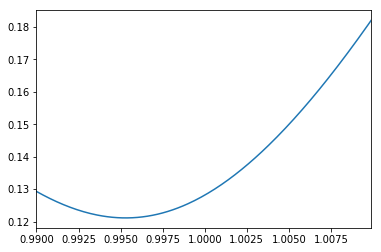

In [171]:
#print("Make predictions on the test set")
for gbm_info in gbm_list:
    key = gbm_info[0]
    gbm = gbm_info[1]
    
    yhat = gbm.predict(xgb.DMatrix(ho_xtest.values))
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))

    print(str(key) + "----valid_set----"+ 'RMSPE: {:.6f}'.format(error))
    
    
    dtest = xgb.DMatrix(xtest.values)
    test_probs = gbm.predict(dtest)

    result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
    result.to_csv("Rossmann_submission_xgb_"+str(key)+".csv", index=False)
    
    
    
    print("weight correction")
    W=[(0.9900+(i/10000)) for i in range(200)]
    S =[]
    for w in W:
        error = rmspe(np.expm1(ho_ytest), np.expm1(yhat*w))
        #print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
        S.append(error)
    Score = pd.Series(S,index=W)
    Score.plot()
    BS = Score[Score.values == Score.values.min()]
    print (str(key) + '------Best weight for Score:{}'.format(BS))
    
    w = float(BS.index[0])
    yhat_new = yhat*w
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat_new))
    print (str(key) + '------RMSPE for weight corretion {:6f}'.format(error))

    result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs*w)})
    result.to_csv("Rossmann_submission_xgb_"+str(key)+"_fix.csv", index=False)



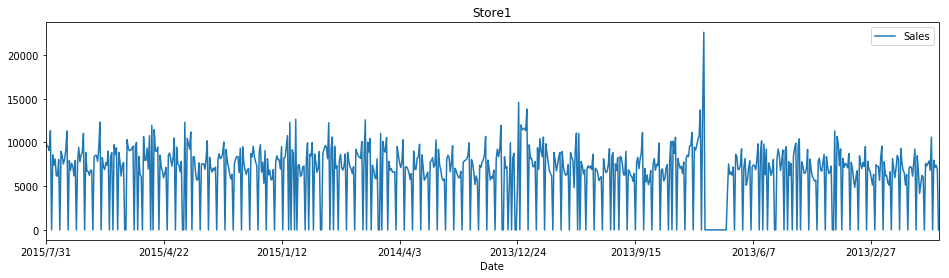

In [18]:
#分析销量随时间变化,#这里换成平均值随时间变化
data_train.loc[data_train['Store']==100 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(16,4))


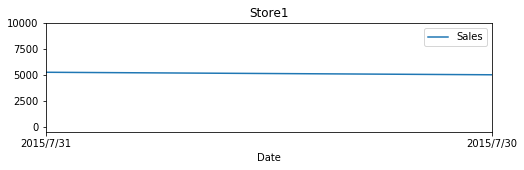

In [25]:
data_train.loc[data_train['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])


In [21]:

#data_store.loc[data_store.Store==622]['CompetitionDistance'] = 0.0
data_store[data_store.Store==879]['CompetitionDistance']

878   NaN
Name: CompetitionDistance, dtype: float64

In [22]:

data_store.fillna(0, inplace=True)


In [23]:

data_test.fillna(1, inplace=True)

In [24]:
display(data_train.isnull().sum(),data_test.isnull().sum(),data_store.isnull().sum())


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [66]:

data_train_new=pd.merge(data_train,data_store,on='Store',how='left')
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.head()



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [67]:
data_test_new=pd.merge(data_test,data_store,on='Store',how='left')
data_test_new.Date=pd.to_datetime(data_test_new.Date)
data_test_new.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0


In [68]:

data_train_new = data_train_new.sort_values(['Date'],ascending = False)
ho_test = data_train_new[:6*7*1115]
ho_train = data_train_new[6*7*1115:]

In [69]:
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

In [70]:
def features_create(data):
    
    #将存在其他字符表示分类的特征转化为数字
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    #将时间特征进行拆分和转化，并加入'WeekOfYear'特征
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    #新增'CompetitionOpen'和'PromoOpen'特征,计算某天某店铺的竞争对手已营业时间和店铺已促销时间，用月为单位表示
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + (data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    
    
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    #将'PromoInterval'特征转化为'IsPromoMonth'特征,表示某天某店铺是否处于促销月，1表示是，0表示否
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
 
    return data


In [71]:
features_create(ho_train)
features_create(ho_test)
features_create(data_test_new)
print('Features creation finished')

Features creation finished


In [117]:
data_test_new.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
0,1,4,2015-07-31,5263,555,1,1,0,1,3,...,0.0,,2015,7,31,31,82.0,24187.75,Jul,0
1,2,4,2015-07-31,6064,625,1,1,0,1,1,...,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.50,Jul,1
2,3,4,2015-07-31,8314,821,1,1,0,1,1,...,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,52.25,Jul,1
3,4,4,2015-07-31,13995,1498,1,1,0,1,3,...,0.0,,2015,7,31,31,70.0,24187.75,Jul,0
4,5,4,2015-07-31,4822,559,1,1,0,1,1,...,0.0,,2015,7,31,31,3.0,24187.75,Jul,0
5,6,4,2015-07-31,5651,589,1,1,0,1,1,...,0.0,,2015,7,31,31,19.0,24187.75,Jul,0
6,7,4,2015-07-31,15344,1414,1,1,0,1,1,...,0.0,,2015,7,31,31,27.0,24187.75,Jul,0
7,8,4,2015-07-31,8492,833,1,1,0,1,1,...,0.0,,2015,7,31,31,9.0,24187.75,Jul,0
8,9,4,2015-07-31,8565,687,1,1,0,1,1,...,0.0,,2015,7,31,31,179.0,24187.75,Jul,0
9,10,4,2015-07-31,7185,681,1,1,0,1,1,...,0.0,,2015,7,31,31,70.0,24187.75,Jul,0


In [72]:
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
 

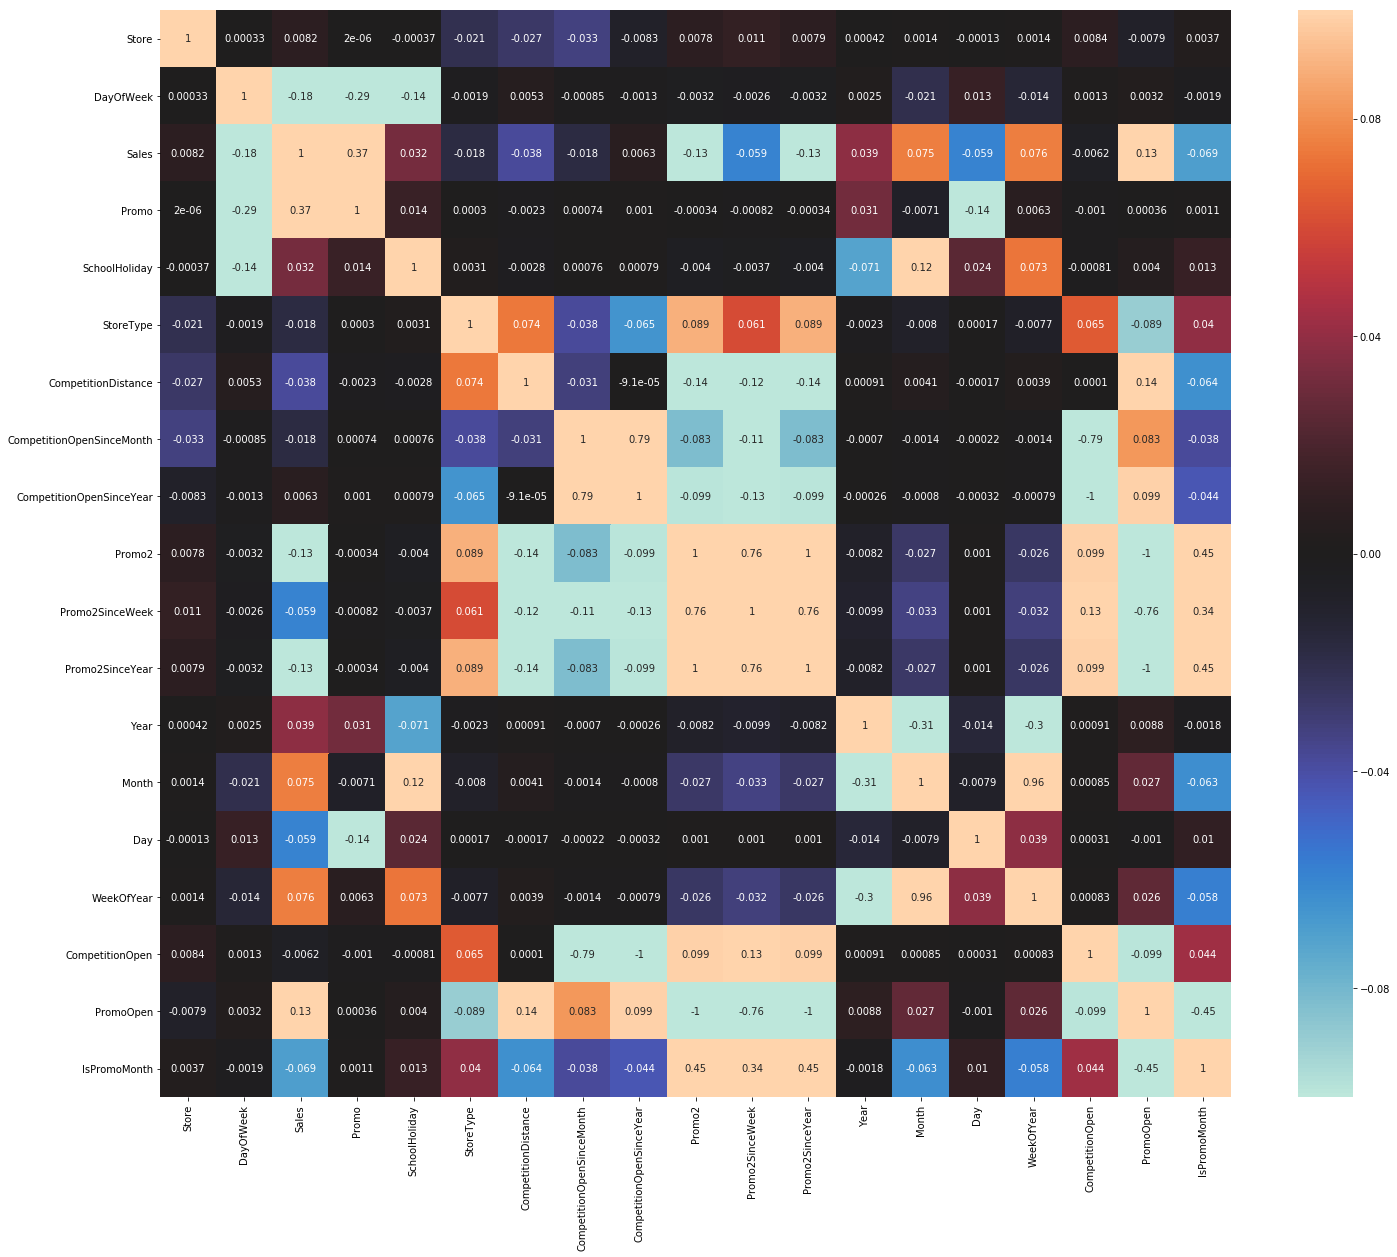

In [73]:
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

In [74]:

#拆分特征与标签，并将标签取对数处理
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)


In [121]:
ho_xtrain.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
47570,741,4,1,0,0,4,3,11900.0,0.0,0.0,0,0.0,0.0,2015,6,19,25,24186.0,24186.25,0
47576,747,4,1,0,0,3,3,45740.0,8.0,2008.0,0,0.0,0.0,2015,6,19,25,82.0,24186.25,0
47575,746,4,1,0,0,4,3,4330.0,2.0,2011.0,1,35.0,2011.0,2015,6,19,25,52.0,45.50,1
47574,745,4,1,0,0,1,1,17650.0,11.0,2013.0,1,37.0,2009.0,2015,6,19,25,19.0,69.00,0
47573,744,4,1,0,0,1,1,1370.0,12.0,2011.0,1,40.0,2014.0,2015,6,19,25,42.0,8.25,0


In [119]:
xtest =data_test_new.drop(['Date','Open','PromoInterval','monthStr'],axis = 1)

In [120]:
xtest.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,4,5263,555,1,0,1,3,1,1270.0,...,0,0.0,0.0,2015,7,31,31,82.0,24187.75,0
1,2,4,6064,625,1,0,1,1,1,570.0,...,1,13.0,2010.0,2015,7,31,31,92.0,64.50,1
2,3,4,8314,821,1,0,1,1,1,14130.0,...,1,14.0,2011.0,2015,7,31,31,103.0,52.25,1
3,4,4,13995,1498,1,0,1,3,3,620.0,...,0,0.0,0.0,2015,7,31,31,70.0,24187.75,0
4,5,4,4822,559,1,0,1,1,1,29910.0,...,0,0.0,0.0,2015,7,31,31,3.0,24187.75,0


In [76]:
#定义评价函数rmspe
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
 
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [95]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 10
          }
num_boost_round = 6000
 

In [78]:

import xgboost as xgb

dtrain = xgb.DMatrix(ho_xtrain.values, ho_ytrain.values)
dvalid = xgb.DMatrix(ho_xtest.values, ho_ytest.values)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [79]:
ho_ytrain.head()

47570    8.899731
47576    9.145055
47575    8.969160
47574    8.996528
47573    9.062652
Name: Sales, dtype: float64

In [96]:
import datetime
#训练模型
print("Train a XGBoost model")
start = datetime.time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=1000, feval=rmspe_xg, verbose_eval=True)
end = datetime.time()
print('Training time is {:2f} s.'.format(end-start))

Train a XGBoost model
[0]	train-rmse:8.02074	eval-rmse:8.02784	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 1000 rounds.
[1]	train-rmse:7.7806	eval-rmse:7.78782	train-rmspe:0.999711	eval-rmspe:0.999714
[2]	train-rmse:7.54775	eval-rmse:7.55438	train-rmspe:0.99959	eval-rmspe:0.999595
[3]	train-rmse:7.32189	eval-rmse:7.32799	train-rmspe:0.999443	eval-rmspe:0.999449
[4]	train-rmse:7.10282	eval-rmse:7.10722	train-rmspe:0.999266	eval-rmspe:0.999272
[5]	train-rmse:6.89033	eval-rmse:6.89421	train-rmspe:0.999052	eval-rmspe:0.99906
[6]	train-rmse:6.68425	eval-rmse:6.68672	train-rmspe:0.998797	eval-rmspe:0.998805
[7]	train-rmse:6.48427	eval-rmse:6.48716	train-rmspe:0.998494	eval-rmspe:0.998506
[8]	train-rmse:6.29024	eval-rmse:6.29352	train-rmspe:0.998139	eval-rmspe:0.998154
[9]	train-rmse:6.1021	eval-rmse:6.10605	train-rmspe:0.997721	eval-rmspe:0.997741
[10]	train-rmse

[97]	train-rmse:0.489978	eval-rmse:0.478841	train-rmspe:0.379496	eval-rmspe:0.360361
[98]	train-rmse:0.479115	eval-rmse:0.467503	train-rmspe:0.373647	eval-rmspe:0.35365
[99]	train-rmse:0.468694	eval-rmse:0.457426	train-rmspe:0.368018	eval-rmspe:0.347691
[100]	train-rmse:0.458566	eval-rmse:0.447478	train-rmspe:0.362515	eval-rmspe:0.341804
[101]	train-rmse:0.448581	eval-rmse:0.437607	train-rmspe:0.35718	eval-rmspe:0.336007
[102]	train-rmse:0.438946	eval-rmse:0.427983	train-rmspe:0.352089	eval-rmspe:0.330335
[103]	train-rmse:0.429975	eval-rmse:0.419306	train-rmspe:0.347276	eval-rmspe:0.325183
[104]	train-rmse:0.421275	eval-rmse:0.410497	train-rmspe:0.342656	eval-rmspe:0.319943
[105]	train-rmse:0.412928	eval-rmse:0.401675	train-rmspe:0.338252	eval-rmspe:0.314735
[106]	train-rmse:0.404144	eval-rmse:0.393099	train-rmspe:0.333501	eval-rmspe:0.309581
[107]	train-rmse:0.396296	eval-rmse:0.385492	train-rmspe:0.329315	eval-rmspe:0.305114
[108]	train-rmse:0.388438	eval-rmse:0.377741	train-rmspe:0.

[193]	train-rmse:0.198462	eval-rmse:0.207549	train-rmspe:0.244529	eval-rmspe:0.222409
[194]	train-rmse:0.19809	eval-rmse:0.207405	train-rmspe:0.244436	eval-rmspe:0.222381
[195]	train-rmse:0.197818	eval-rmse:0.207232	train-rmspe:0.244389	eval-rmspe:0.222418
[196]	train-rmse:0.197307	eval-rmse:0.206864	train-rmspe:0.244139	eval-rmspe:0.222208
[197]	train-rmse:0.197012	eval-rmse:0.206733	train-rmspe:0.244016	eval-rmspe:0.222222
[198]	train-rmse:0.196506	eval-rmse:0.206309	train-rmspe:0.243784	eval-rmspe:0.221955
[199]	train-rmse:0.195658	eval-rmse:0.20564	train-rmspe:0.243164	eval-rmspe:0.221444
[200]	train-rmse:0.19538	eval-rmse:0.205565	train-rmspe:0.243075	eval-rmspe:0.221491
[201]	train-rmse:0.195204	eval-rmse:0.205466	train-rmspe:0.243117	eval-rmspe:0.221549
[202]	train-rmse:0.194596	eval-rmse:0.205052	train-rmspe:0.242687	eval-rmspe:0.221307
[203]	train-rmse:0.193683	eval-rmse:0.204282	train-rmspe:0.242036	eval-rmspe:0.22067
[204]	train-rmse:0.19326	eval-rmse:0.203937	train-rmspe:0.

[289]	train-rmse:0.158849	eval-rmse:0.175439	train-rmspe:0.204838	eval-rmspe:0.192587
[290]	train-rmse:0.158606	eval-rmse:0.17523	train-rmspe:0.204595	eval-rmspe:0.192366
[291]	train-rmse:0.158329	eval-rmse:0.174982	train-rmspe:0.204373	eval-rmspe:0.192081
[292]	train-rmse:0.15783	eval-rmse:0.174509	train-rmspe:0.203992	eval-rmspe:0.191584
[293]	train-rmse:0.157547	eval-rmse:0.174329	train-rmspe:0.203734	eval-rmspe:0.191399
[294]	train-rmse:0.157425	eval-rmse:0.174285	train-rmspe:0.203625	eval-rmspe:0.191376
[295]	train-rmse:0.157242	eval-rmse:0.174101	train-rmspe:0.203248	eval-rmspe:0.191203
[296]	train-rmse:0.156915	eval-rmse:0.173816	train-rmspe:0.202953	eval-rmspe:0.190859
[297]	train-rmse:0.156742	eval-rmse:0.173698	train-rmspe:0.202835	eval-rmspe:0.19069
[298]	train-rmse:0.15657	eval-rmse:0.173558	train-rmspe:0.202826	eval-rmspe:0.190549
[299]	train-rmse:0.156394	eval-rmse:0.173404	train-rmspe:0.202111	eval-rmspe:0.190397
[300]	train-rmse:0.155968	eval-rmse:0.173071	train-rmspe:0

[385]	train-rmse:0.135965	eval-rmse:0.156607	train-rmspe:0.178798	eval-rmspe:0.171998
[386]	train-rmse:0.135787	eval-rmse:0.156463	train-rmspe:0.178494	eval-rmspe:0.171786
[387]	train-rmse:0.13565	eval-rmse:0.156345	train-rmspe:0.178374	eval-rmspe:0.171651
[388]	train-rmse:0.135386	eval-rmse:0.156135	train-rmspe:0.178135	eval-rmspe:0.171423
[389]	train-rmse:0.13519	eval-rmse:0.155988	train-rmspe:0.177957	eval-rmspe:0.171263
[390]	train-rmse:0.135149	eval-rmse:0.155963	train-rmspe:0.177905	eval-rmspe:0.171239
[391]	train-rmse:0.134948	eval-rmse:0.1558	train-rmspe:0.177738	eval-rmspe:0.171053
[392]	train-rmse:0.134658	eval-rmse:0.155562	train-rmspe:0.177499	eval-rmspe:0.170787
[393]	train-rmse:0.134441	eval-rmse:0.155395	train-rmspe:0.177305	eval-rmspe:0.17059
[394]	train-rmse:0.134306	eval-rmse:0.15525	train-rmspe:0.177176	eval-rmspe:0.17039
[395]	train-rmse:0.134166	eval-rmse:0.155141	train-rmspe:0.177054	eval-rmspe:0.170275
[396]	train-rmse:0.133839	eval-rmse:0.154872	train-rmspe:0.17

[481]	train-rmse:0.121751	eval-rmse:0.145804	train-rmspe:0.161175	eval-rmspe:0.159762
[482]	train-rmse:0.121673	eval-rmse:0.145739	train-rmspe:0.161111	eval-rmspe:0.15969
[483]	train-rmse:0.121553	eval-rmse:0.145649	train-rmspe:0.161009	eval-rmspe:0.159581
[484]	train-rmse:0.121284	eval-rmse:0.145397	train-rmspe:0.16077	eval-rmspe:0.159267
[485]	train-rmse:0.12123	eval-rmse:0.145356	train-rmspe:0.160705	eval-rmspe:0.159219
[486]	train-rmse:0.120997	eval-rmse:0.145183	train-rmspe:0.160516	eval-rmspe:0.159026
[487]	train-rmse:0.120868	eval-rmse:0.14507	train-rmspe:0.160409	eval-rmspe:0.158907
[488]	train-rmse:0.120796	eval-rmse:0.145004	train-rmspe:0.160347	eval-rmspe:0.158828
[489]	train-rmse:0.120591	eval-rmse:0.144845	train-rmspe:0.160173	eval-rmspe:0.158648
[490]	train-rmse:0.120424	eval-rmse:0.144699	train-rmspe:0.160024	eval-rmspe:0.158484
[491]	train-rmse:0.120343	eval-rmse:0.144623	train-rmspe:0.159953	eval-rmspe:0.158396
[492]	train-rmse:0.1203	eval-rmse:0.144592	train-rmspe:0.1

[577]	train-rmse:0.111477	eval-rmse:0.138223	train-rmspe:0.149461	eval-rmspe:0.151147
[578]	train-rmse:0.111317	eval-rmse:0.1381	train-rmspe:0.149282	eval-rmspe:0.151004
[579]	train-rmse:0.111144	eval-rmse:0.137981	train-rmspe:0.1491	eval-rmspe:0.150862
[580]	train-rmse:0.111054	eval-rmse:0.137995	train-rmspe:0.148986	eval-rmspe:0.150892
[581]	train-rmse:0.110921	eval-rmse:0.137901	train-rmspe:0.148622	eval-rmspe:0.150788
[582]	train-rmse:0.110875	eval-rmse:0.137863	train-rmspe:0.148585	eval-rmspe:0.150746
[583]	train-rmse:0.110806	eval-rmse:0.137823	train-rmspe:0.148526	eval-rmspe:0.150697
[584]	train-rmse:0.110766	eval-rmse:0.137661	train-rmspe:0.148492	eval-rmspe:0.150505
[585]	train-rmse:0.110714	eval-rmse:0.13755	train-rmspe:0.1484	eval-rmspe:0.150368
[586]	train-rmse:0.110652	eval-rmse:0.137503	train-rmspe:0.148348	eval-rmspe:0.150306
[587]	train-rmse:0.110536	eval-rmse:0.137434	train-rmspe:0.148242	eval-rmspe:0.150235
[588]	train-rmse:0.110443	eval-rmse:0.137347	train-rmspe:0.14

[673]	train-rmse:0.104822	eval-rmse:0.13317	train-rmspe:0.138903	eval-rmspe:0.145312
[674]	train-rmse:0.104767	eval-rmse:0.13311	train-rmspe:0.138828	eval-rmspe:0.145234
[675]	train-rmse:0.104714	eval-rmse:0.13308	train-rmspe:0.138772	eval-rmspe:0.145202
[676]	train-rmse:0.104672	eval-rmse:0.133058	train-rmspe:0.138741	eval-rmspe:0.145177
[677]	train-rmse:0.104613	eval-rmse:0.133018	train-rmspe:0.138689	eval-rmspe:0.145137
[678]	train-rmse:0.104552	eval-rmse:0.132993	train-rmspe:0.138629	eval-rmspe:0.145107
[679]	train-rmse:0.10453	eval-rmse:0.132923	train-rmspe:0.138614	eval-rmspe:0.145015
[680]	train-rmse:0.104393	eval-rmse:0.132831	train-rmspe:0.138476	eval-rmspe:0.144906
[681]	train-rmse:0.104346	eval-rmse:0.132804	train-rmspe:0.138426	eval-rmspe:0.144877
[682]	train-rmse:0.104304	eval-rmse:0.132781	train-rmspe:0.13839	eval-rmspe:0.144855
[683]	train-rmse:0.104239	eval-rmse:0.132743	train-rmspe:0.138472	eval-rmspe:0.14481
[684]	train-rmse:0.104223	eval-rmse:0.132654	train-rmspe:0.1

[769]	train-rmse:0.099791	eval-rmse:0.129747	train-rmspe:0.130735	eval-rmspe:0.141476
[770]	train-rmse:0.099764	eval-rmse:0.129739	train-rmspe:0.130705	eval-rmspe:0.141467
[771]	train-rmse:0.099687	eval-rmse:0.129695	train-rmspe:0.130634	eval-rmspe:0.141421
[772]	train-rmse:0.099632	eval-rmse:0.129661	train-rmspe:0.130561	eval-rmspe:0.14138
[773]	train-rmse:0.099623	eval-rmse:0.12966	train-rmspe:0.130446	eval-rmspe:0.14138
[774]	train-rmse:0.099608	eval-rmse:0.129649	train-rmspe:0.130124	eval-rmspe:0.141369
[775]	train-rmse:0.099552	eval-rmse:0.129609	train-rmspe:0.130072	eval-rmspe:0.141326
[776]	train-rmse:0.099436	eval-rmse:0.129525	train-rmspe:0.129953	eval-rmspe:0.141226
[777]	train-rmse:0.099387	eval-rmse:0.129502	train-rmspe:0.129912	eval-rmspe:0.141199
[778]	train-rmse:0.099353	eval-rmse:0.129483	train-rmspe:0.129882	eval-rmspe:0.141178
[779]	train-rmse:0.099318	eval-rmse:0.129471	train-rmspe:0.129849	eval-rmspe:0.141165
[780]	train-rmse:0.099301	eval-rmse:0.129459	train-rmspe:

[865]	train-rmse:0.095685	eval-rmse:0.1279	train-rmspe:0.120931	eval-rmspe:0.139567
[866]	train-rmse:0.095627	eval-rmse:0.127865	train-rmspe:0.120878	eval-rmspe:0.139525
[867]	train-rmse:0.095603	eval-rmse:0.127858	train-rmspe:0.120858	eval-rmspe:0.139519
[868]	train-rmse:0.095576	eval-rmse:0.127846	train-rmspe:0.120833	eval-rmspe:0.139507
[869]	train-rmse:0.095551	eval-rmse:0.127832	train-rmspe:0.120812	eval-rmspe:0.139491
[870]	train-rmse:0.095524	eval-rmse:0.127872	train-rmspe:0.12078	eval-rmspe:0.139558
[871]	train-rmse:0.095451	eval-rmse:0.127846	train-rmspe:0.120717	eval-rmspe:0.139542
[872]	train-rmse:0.09543	eval-rmse:0.127805	train-rmspe:0.120693	eval-rmspe:0.139485
[873]	train-rmse:0.095411	eval-rmse:0.127801	train-rmspe:0.119475	eval-rmspe:0.13948
[874]	train-rmse:0.095401	eval-rmse:0.127795	train-rmspe:0.119467	eval-rmspe:0.139475
[875]	train-rmse:0.095379	eval-rmse:0.127769	train-rmspe:0.119444	eval-rmspe:0.139446
[876]	train-rmse:0.095336	eval-rmse:0.127772	train-rmspe:0.

[961]	train-rmse:0.092389	eval-rmse:0.126419	train-rmspe:0.115321	eval-rmspe:0.137975
[962]	train-rmse:0.092372	eval-rmse:0.126415	train-rmspe:0.115281	eval-rmspe:0.137972
[963]	train-rmse:0.092346	eval-rmse:0.126409	train-rmspe:0.11526	eval-rmspe:0.137964
[964]	train-rmse:0.092322	eval-rmse:0.126399	train-rmspe:0.115237	eval-rmspe:0.137955
[965]	train-rmse:0.092298	eval-rmse:0.126385	train-rmspe:0.115214	eval-rmspe:0.137939
[966]	train-rmse:0.092272	eval-rmse:0.126368	train-rmspe:0.115191	eval-rmspe:0.137922
[967]	train-rmse:0.092254	eval-rmse:0.126364	train-rmspe:0.115174	eval-rmspe:0.137917
[968]	train-rmse:0.092228	eval-rmse:0.126351	train-rmspe:0.115135	eval-rmspe:0.137903
[969]	train-rmse:0.092209	eval-rmse:0.126338	train-rmspe:0.115115	eval-rmspe:0.137883
[970]	train-rmse:0.092181	eval-rmse:0.126379	train-rmspe:0.115086	eval-rmspe:0.137942
[971]	train-rmse:0.092149	eval-rmse:0.126362	train-rmspe:0.115043	eval-rmspe:0.137926
[972]	train-rmse:0.092102	eval-rmse:0.126336	train-rmsp

[1056]	train-rmse:0.089737	eval-rmse:0.12556	train-rmspe:0.109987	eval-rmspe:0.137089
[1057]	train-rmse:0.0897	eval-rmse:0.125541	train-rmspe:0.109952	eval-rmspe:0.137066
[1058]	train-rmse:0.089681	eval-rmse:0.125528	train-rmspe:0.109933	eval-rmspe:0.137058
[1059]	train-rmse:0.089656	eval-rmse:0.125517	train-rmspe:0.109913	eval-rmspe:0.137046
[1060]	train-rmse:0.089636	eval-rmse:0.125517	train-rmspe:0.109889	eval-rmspe:0.13705
[1061]	train-rmse:0.089589	eval-rmse:0.125543	train-rmspe:0.109814	eval-rmspe:0.137091
[1062]	train-rmse:0.089582	eval-rmse:0.12554	train-rmspe:0.109807	eval-rmspe:0.13709
[1063]	train-rmse:0.089562	eval-rmse:0.125535	train-rmspe:0.109786	eval-rmspe:0.137086
[1064]	train-rmse:0.089542	eval-rmse:0.12553	train-rmspe:0.109765	eval-rmspe:0.137079
[1065]	train-rmse:0.089517	eval-rmse:0.125515	train-rmspe:0.109742	eval-rmspe:0.137062
[1066]	train-rmse:0.089506	eval-rmse:0.125509	train-rmspe:0.10973	eval-rmspe:0.137054
[1067]	train-rmse:0.089487	eval-rmse:0.125504	train

[1151]	train-rmse:0.087471	eval-rmse:0.124984	train-rmspe:0.106881	eval-rmspe:0.136559
[1152]	train-rmse:0.087447	eval-rmse:0.124987	train-rmspe:0.106856	eval-rmspe:0.136566
[1153]	train-rmse:0.08743	eval-rmse:0.124985	train-rmspe:0.106836	eval-rmspe:0.136568
[1154]	train-rmse:0.087409	eval-rmse:0.124975	train-rmspe:0.106815	eval-rmspe:0.136554
[1155]	train-rmse:0.087382	eval-rmse:0.124963	train-rmspe:0.106791	eval-rmspe:0.13654
[1156]	train-rmse:0.087372	eval-rmse:0.124959	train-rmspe:0.106777	eval-rmspe:0.136538
[1157]	train-rmse:0.087361	eval-rmse:0.124955	train-rmspe:0.106765	eval-rmspe:0.136533
[1158]	train-rmse:0.087334	eval-rmse:0.124945	train-rmspe:0.106736	eval-rmspe:0.136523
[1159]	train-rmse:0.087303	eval-rmse:0.124933	train-rmspe:0.106706	eval-rmspe:0.136509
[1160]	train-rmse:0.08728	eval-rmse:0.124926	train-rmspe:0.106683	eval-rmspe:0.136502
[1161]	train-rmse:0.087258	eval-rmse:0.124914	train-rmspe:0.106664	eval-rmspe:0.136487
[1162]	train-rmse:0.087232	eval-rmse:0.124886	

[1246]	train-rmse:0.085577	eval-rmse:0.124375	train-rmspe:0.104682	eval-rmspe:0.135947
[1247]	train-rmse:0.085557	eval-rmse:0.124373	train-rmspe:0.104656	eval-rmspe:0.135947
[1248]	train-rmse:0.085541	eval-rmse:0.124374	train-rmspe:0.10464	eval-rmspe:0.135948
[1249]	train-rmse:0.085532	eval-rmse:0.124368	train-rmspe:0.104631	eval-rmspe:0.135941
[1250]	train-rmse:0.085514	eval-rmse:0.124359	train-rmspe:0.104615	eval-rmspe:0.135931
[1251]	train-rmse:0.085504	eval-rmse:0.124361	train-rmspe:0.104594	eval-rmspe:0.135932
[1252]	train-rmse:0.085463	eval-rmse:0.124404	train-rmspe:0.10453	eval-rmspe:0.135997
[1253]	train-rmse:0.085448	eval-rmse:0.124404	train-rmspe:0.104516	eval-rmspe:0.135997
[1254]	train-rmse:0.085434	eval-rmse:0.124405	train-rmspe:0.104487	eval-rmspe:0.135999
[1255]	train-rmse:0.085424	eval-rmse:0.124405	train-rmspe:0.104477	eval-rmspe:0.136
[1256]	train-rmse:0.085403	eval-rmse:0.124397	train-rmspe:0.104438	eval-rmspe:0.135993
[1257]	train-rmse:0.085388	eval-rmse:0.124392	tr

[1341]	train-rmse:0.08379	eval-rmse:0.123883	train-rmspe:0.100968	eval-rmspe:0.135447
[1342]	train-rmse:0.083774	eval-rmse:0.123885	train-rmspe:0.100952	eval-rmspe:0.135451
[1343]	train-rmse:0.083756	eval-rmse:0.123881	train-rmspe:0.100929	eval-rmspe:0.135446
[1344]	train-rmse:0.083725	eval-rmse:0.123867	train-rmspe:0.100888	eval-rmspe:0.13543
[1345]	train-rmse:0.083701	eval-rmse:0.123855	train-rmspe:0.100859	eval-rmspe:0.135419
[1346]	train-rmse:0.083678	eval-rmse:0.123843	train-rmspe:0.1009	eval-rmspe:0.135406
[1347]	train-rmse:0.083663	eval-rmse:0.123838	train-rmspe:0.100884	eval-rmspe:0.1354
[1348]	train-rmse:0.083652	eval-rmse:0.123831	train-rmspe:0.100868	eval-rmspe:0.13539
[1349]	train-rmse:0.083639	eval-rmse:0.123826	train-rmspe:0.100856	eval-rmspe:0.135385
[1350]	train-rmse:0.083621	eval-rmse:0.123823	train-rmspe:0.10084	eval-rmspe:0.135384
[1351]	train-rmse:0.083605	eval-rmse:0.123819	train-rmspe:0.100825	eval-rmspe:0.135379
[1352]	train-rmse:0.08359	eval-rmse:0.123815	train-

[1436]	train-rmse:0.08225	eval-rmse:0.123409	train-rmspe:0.096209	eval-rmspe:0.134897
[1437]	train-rmse:0.082235	eval-rmse:0.123409	train-rmspe:0.096191	eval-rmspe:0.1349
[1438]	train-rmse:0.08223	eval-rmse:0.123407	train-rmspe:0.096186	eval-rmspe:0.134899
[1439]	train-rmse:0.082213	eval-rmse:0.123399	train-rmspe:0.096165	eval-rmspe:0.134889
[1440]	train-rmse:0.082204	eval-rmse:0.123397	train-rmspe:0.096156	eval-rmspe:0.134887
[1441]	train-rmse:0.082195	eval-rmse:0.123395	train-rmspe:0.096147	eval-rmspe:0.134885
[1442]	train-rmse:0.082188	eval-rmse:0.123396	train-rmspe:0.096145	eval-rmspe:0.134886
[1443]	train-rmse:0.082169	eval-rmse:0.123403	train-rmspe:0.096089	eval-rmspe:0.134899
[1444]	train-rmse:0.082159	eval-rmse:0.123399	train-rmspe:0.096079	eval-rmspe:0.134893
[1445]	train-rmse:0.082148	eval-rmse:0.123396	train-rmspe:0.096067	eval-rmspe:0.134889
[1446]	train-rmse:0.082134	eval-rmse:0.12339	train-rmspe:0.096043	eval-rmspe:0.134882
[1447]	train-rmse:0.082118	eval-rmse:0.123384	tr

[1531]	train-rmse:0.08077	eval-rmse:0.123039	train-rmspe:0.093131	eval-rmspe:0.134505
[1532]	train-rmse:0.080762	eval-rmse:0.123036	train-rmspe:0.093122	eval-rmspe:0.134501
[1533]	train-rmse:0.080745	eval-rmse:0.123033	train-rmspe:0.093092	eval-rmspe:0.134494
[1534]	train-rmse:0.08073	eval-rmse:0.123021	train-rmspe:0.093079	eval-rmspe:0.134477
[1535]	train-rmse:0.080722	eval-rmse:0.123023	train-rmspe:0.093074	eval-rmspe:0.134481
[1536]	train-rmse:0.080709	eval-rmse:0.123018	train-rmspe:0.093059	eval-rmspe:0.134474
[1537]	train-rmse:0.080694	eval-rmse:0.123013	train-rmspe:0.093039	eval-rmspe:0.134469
[1538]	train-rmse:0.080664	eval-rmse:0.122996	train-rmspe:0.092962	eval-rmspe:0.134452
[1539]	train-rmse:0.080651	eval-rmse:0.122992	train-rmspe:0.092946	eval-rmspe:0.134448
[1540]	train-rmse:0.080625	eval-rmse:0.122982	train-rmspe:0.092839	eval-rmspe:0.134437
[1541]	train-rmse:0.080606	eval-rmse:0.12296	train-rmspe:0.092819	eval-rmspe:0.13441
[1542]	train-rmse:0.080589	eval-rmse:0.122958	t

[1626]	train-rmse:0.079473	eval-rmse:0.122701	train-rmspe:0.090322	eval-rmspe:0.134127
[1627]	train-rmse:0.07946	eval-rmse:0.122694	train-rmspe:0.090302	eval-rmspe:0.134119
[1628]	train-rmse:0.079449	eval-rmse:0.122684	train-rmspe:0.090289	eval-rmspe:0.134106
[1629]	train-rmse:0.079441	eval-rmse:0.122683	train-rmspe:0.090281	eval-rmspe:0.134106
[1630]	train-rmse:0.07942	eval-rmse:0.122678	train-rmspe:0.090242	eval-rmspe:0.1341
[1631]	train-rmse:0.079399	eval-rmse:0.122679	train-rmspe:0.090213	eval-rmspe:0.134102
[1632]	train-rmse:0.07938	eval-rmse:0.122672	train-rmspe:0.090188	eval-rmspe:0.134094
[1633]	train-rmse:0.079368	eval-rmse:0.122672	train-rmspe:0.08993	eval-rmspe:0.134095
[1634]	train-rmse:0.079354	eval-rmse:0.122681	train-rmspe:0.089912	eval-rmspe:0.134109
[1635]	train-rmse:0.079336	eval-rmse:0.122676	train-rmspe:0.08989	eval-rmspe:0.134102
[1636]	train-rmse:0.079326	eval-rmse:0.122674	train-rmspe:0.089879	eval-rmspe:0.134101
[1637]	train-rmse:0.079315	eval-rmse:0.122676	trai

[1721]	train-rmse:0.078204	eval-rmse:0.122459	train-rmspe:0.087906	eval-rmspe:0.13388
[1722]	train-rmse:0.078187	eval-rmse:0.122451	train-rmspe:0.08789	eval-rmspe:0.13387
[1723]	train-rmse:0.078178	eval-rmse:0.122449	train-rmspe:0.087881	eval-rmspe:0.133867
[1724]	train-rmse:0.078168	eval-rmse:0.122449	train-rmspe:0.087871	eval-rmspe:0.133864
[1725]	train-rmse:0.078153	eval-rmse:0.122443	train-rmspe:0.087854	eval-rmspe:0.133858
[1726]	train-rmse:0.078145	eval-rmse:0.12244	train-rmspe:0.087846	eval-rmspe:0.133855
[1727]	train-rmse:0.078133	eval-rmse:0.122439	train-rmspe:0.087825	eval-rmspe:0.133855
[1728]	train-rmse:0.078119	eval-rmse:0.122443	train-rmspe:0.087803	eval-rmspe:0.133854
[1729]	train-rmse:0.078111	eval-rmse:0.122442	train-rmspe:0.087795	eval-rmspe:0.133853
[1730]	train-rmse:0.078096	eval-rmse:0.122447	train-rmspe:0.087769	eval-rmspe:0.133851
[1731]	train-rmse:0.078077	eval-rmse:0.122444	train-rmspe:0.087732	eval-rmspe:0.13385
[1732]	train-rmse:0.078065	eval-rmse:0.12244	tra

[1816]	train-rmse:0.077072	eval-rmse:0.122218	train-rmspe:0.086126	eval-rmspe:0.133605
[1817]	train-rmse:0.077061	eval-rmse:0.122217	train-rmspe:0.086114	eval-rmspe:0.133604
[1818]	train-rmse:0.077055	eval-rmse:0.122215	train-rmspe:0.086106	eval-rmspe:0.133602
[1819]	train-rmse:0.077035	eval-rmse:0.122209	train-rmspe:0.086064	eval-rmspe:0.133604
[1820]	train-rmse:0.077019	eval-rmse:0.122205	train-rmspe:0.086048	eval-rmspe:0.133601
[1821]	train-rmse:0.077011	eval-rmse:0.122204	train-rmspe:0.086041	eval-rmspe:0.1336
[1822]	train-rmse:0.076998	eval-rmse:0.122198	train-rmspe:0.086027	eval-rmspe:0.133591
[1823]	train-rmse:0.076991	eval-rmse:0.122198	train-rmspe:0.086021	eval-rmspe:0.133591
[1824]	train-rmse:0.076982	eval-rmse:0.122195	train-rmspe:0.086009	eval-rmspe:0.133587
[1825]	train-rmse:0.076973	eval-rmse:0.122192	train-rmspe:0.085998	eval-rmspe:0.133582
[1826]	train-rmse:0.076952	eval-rmse:0.122186	train-rmspe:0.085974	eval-rmspe:0.133576
[1827]	train-rmse:0.076937	eval-rmse:0.122149

[1911]	train-rmse:0.075943	eval-rmse:0.122013	train-rmspe:0.084561	eval-rmspe:0.133368
[1912]	train-rmse:0.075937	eval-rmse:0.122013	train-rmspe:0.084554	eval-rmspe:0.133369
[1913]	train-rmse:0.075925	eval-rmse:0.122009	train-rmspe:0.084533	eval-rmspe:0.133363
[1914]	train-rmse:0.075912	eval-rmse:0.122031	train-rmspe:0.08452	eval-rmspe:0.133385
[1915]	train-rmse:0.075905	eval-rmse:0.12203	train-rmspe:0.084512	eval-rmspe:0.133384
[1916]	train-rmse:0.075894	eval-rmse:0.122028	train-rmspe:0.084496	eval-rmspe:0.133381
[1917]	train-rmse:0.075885	eval-rmse:0.122023	train-rmspe:0.084487	eval-rmspe:0.133376
[1918]	train-rmse:0.075877	eval-rmse:0.122012	train-rmspe:0.084463	eval-rmspe:0.133359
[1919]	train-rmse:0.07587	eval-rmse:0.122011	train-rmspe:0.084455	eval-rmspe:0.133358
[1920]	train-rmse:0.075855	eval-rmse:0.122008	train-rmspe:0.084421	eval-rmspe:0.133355
[1921]	train-rmse:0.075845	eval-rmse:0.122008	train-rmspe:0.084409	eval-rmspe:0.133355
[1922]	train-rmse:0.075831	eval-rmse:0.122011	

[2006]	train-rmse:0.07502	eval-rmse:0.121883	train-rmspe:0.083307	eval-rmspe:0.133189
[2007]	train-rmse:0.07501	eval-rmse:0.121884	train-rmspe:0.083295	eval-rmspe:0.133191
[2008]	train-rmse:0.074998	eval-rmse:0.12188	train-rmspe:0.083283	eval-rmspe:0.133184
[2009]	train-rmse:0.074987	eval-rmse:0.121879	train-rmspe:0.083269	eval-rmspe:0.133183
[2010]	train-rmse:0.074978	eval-rmse:0.121877	train-rmspe:0.083262	eval-rmspe:0.133182
[2011]	train-rmse:0.074969	eval-rmse:0.121874	train-rmspe:0.083251	eval-rmspe:0.133178
[2012]	train-rmse:0.074956	eval-rmse:0.121869	train-rmspe:0.083235	eval-rmspe:0.133174
[2013]	train-rmse:0.074942	eval-rmse:0.121868	train-rmspe:0.08319	eval-rmspe:0.133172
[2014]	train-rmse:0.074933	eval-rmse:0.121868	train-rmspe:0.08318	eval-rmspe:0.133172
[2015]	train-rmse:0.074924	eval-rmse:0.121868	train-rmspe:0.083171	eval-rmspe:0.133173
[2016]	train-rmse:0.074909	eval-rmse:0.121867	train-rmspe:0.083151	eval-rmspe:0.133171
[2017]	train-rmse:0.074901	eval-rmse:0.121871	tr

[2101]	train-rmse:0.074067	eval-rmse:0.121771	train-rmspe:0.081864	eval-rmspe:0.133064
[2102]	train-rmse:0.074054	eval-rmse:0.121771	train-rmspe:0.081835	eval-rmspe:0.133067
[2103]	train-rmse:0.07405	eval-rmse:0.121772	train-rmspe:0.081828	eval-rmspe:0.133067
[2104]	train-rmse:0.074045	eval-rmse:0.12177	train-rmspe:0.081823	eval-rmspe:0.133066
[2105]	train-rmse:0.074035	eval-rmse:0.12177	train-rmspe:0.08181	eval-rmspe:0.133066
[2106]	train-rmse:0.074028	eval-rmse:0.121772	train-rmspe:0.0818	eval-rmspe:0.133069
[2107]	train-rmse:0.074016	eval-rmse:0.12177	train-rmspe:0.081783	eval-rmspe:0.133068
[2108]	train-rmse:0.074007	eval-rmse:0.12177	train-rmspe:0.081773	eval-rmspe:0.133067
[2109]	train-rmse:0.073996	eval-rmse:0.121775	train-rmspe:0.081745	eval-rmspe:0.133072
[2110]	train-rmse:0.073987	eval-rmse:0.121774	train-rmspe:0.081733	eval-rmspe:0.133072
[2111]	train-rmse:0.073973	eval-rmse:0.121772	train-rmspe:0.081713	eval-rmspe:0.133071
[2112]	train-rmse:0.073959	eval-rmse:0.12177	train-

[2196]	train-rmse:0.073159	eval-rmse:0.121644	train-rmspe:0.080461	eval-rmspe:0.132929
[2197]	train-rmse:0.07315	eval-rmse:0.121636	train-rmspe:0.080446	eval-rmspe:0.132922
[2198]	train-rmse:0.073137	eval-rmse:0.121634	train-rmspe:0.080423	eval-rmspe:0.132916
[2199]	train-rmse:0.073129	eval-rmse:0.121633	train-rmspe:0.080414	eval-rmspe:0.132914
[2200]	train-rmse:0.073116	eval-rmse:0.121629	train-rmspe:0.080402	eval-rmspe:0.13291
[2201]	train-rmse:0.073107	eval-rmse:0.121626	train-rmspe:0.080393	eval-rmspe:0.132909
[2202]	train-rmse:0.073102	eval-rmse:0.121628	train-rmspe:0.080388	eval-rmspe:0.132912
[2203]	train-rmse:0.073093	eval-rmse:0.121625	train-rmspe:0.080375	eval-rmspe:0.132909
[2204]	train-rmse:0.073085	eval-rmse:0.121624	train-rmspe:0.080367	eval-rmspe:0.132908
[2205]	train-rmse:0.073078	eval-rmse:0.121623	train-rmspe:0.080359	eval-rmspe:0.13291
[2206]	train-rmse:0.07307	eval-rmse:0.121625	train-rmspe:0.08035	eval-rmspe:0.132914
[2207]	train-rmse:0.073057	eval-rmse:0.121627	tr

[2291]	train-rmse:0.072268	eval-rmse:0.121486	train-rmspe:0.079184	eval-rmspe:0.132769
[2292]	train-rmse:0.072258	eval-rmse:0.121482	train-rmspe:0.079174	eval-rmspe:0.132764
[2293]	train-rmse:0.072245	eval-rmse:0.12148	train-rmspe:0.079158	eval-rmspe:0.132761
[2294]	train-rmse:0.072239	eval-rmse:0.121478	train-rmspe:0.079152	eval-rmspe:0.13276
[2295]	train-rmse:0.072232	eval-rmse:0.121481	train-rmspe:0.079145	eval-rmspe:0.132765
[2296]	train-rmse:0.072226	eval-rmse:0.121478	train-rmspe:0.079139	eval-rmspe:0.132761
[2297]	train-rmse:0.07222	eval-rmse:0.121475	train-rmspe:0.079132	eval-rmspe:0.132754
[2298]	train-rmse:0.072212	eval-rmse:0.121476	train-rmspe:0.079124	eval-rmspe:0.132753
[2299]	train-rmse:0.072202	eval-rmse:0.121476	train-rmspe:0.079109	eval-rmspe:0.132754
[2300]	train-rmse:0.072193	eval-rmse:0.121479	train-rmspe:0.079098	eval-rmspe:0.132759
[2301]	train-rmse:0.072184	eval-rmse:0.121481	train-rmspe:0.079087	eval-rmspe:0.132763
[2302]	train-rmse:0.072176	eval-rmse:0.12148	t

[2386]	train-rmse:0.071508	eval-rmse:0.121435	train-rmspe:0.077927	eval-rmspe:0.132733
[2387]	train-rmse:0.0715	eval-rmse:0.121433	train-rmspe:0.077918	eval-rmspe:0.132732
[2388]	train-rmse:0.071497	eval-rmse:0.121436	train-rmspe:0.077916	eval-rmspe:0.132734
[2389]	train-rmse:0.07149	eval-rmse:0.121437	train-rmspe:0.077903	eval-rmspe:0.132736
[2390]	train-rmse:0.071483	eval-rmse:0.121439	train-rmspe:0.077895	eval-rmspe:0.132738
[2391]	train-rmse:0.071472	eval-rmse:0.121438	train-rmspe:0.077882	eval-rmspe:0.132738
[2392]	train-rmse:0.071462	eval-rmse:0.121438	train-rmspe:0.077868	eval-rmspe:0.132737
[2393]	train-rmse:0.071454	eval-rmse:0.12144	train-rmspe:0.077858	eval-rmspe:0.132738
[2394]	train-rmse:0.071448	eval-rmse:0.121434	train-rmspe:0.077851	eval-rmspe:0.13273
[2395]	train-rmse:0.071442	eval-rmse:0.121433	train-rmspe:0.077844	eval-rmspe:0.132728
[2396]	train-rmse:0.071436	eval-rmse:0.121432	train-rmspe:0.077838	eval-rmspe:0.132727
[2397]	train-rmse:0.071432	eval-rmse:0.121432	tr

[2481]	train-rmse:0.07072	eval-rmse:0.121336	train-rmspe:0.076591	eval-rmspe:0.132617
[2482]	train-rmse:0.070711	eval-rmse:0.121335	train-rmspe:0.07656	eval-rmspe:0.132619
[2483]	train-rmse:0.070704	eval-rmse:0.121336	train-rmspe:0.076553	eval-rmspe:0.13262
[2484]	train-rmse:0.070696	eval-rmse:0.121335	train-rmspe:0.076544	eval-rmspe:0.132619
[2485]	train-rmse:0.07069	eval-rmse:0.121334	train-rmspe:0.076537	eval-rmspe:0.132619
[2486]	train-rmse:0.070683	eval-rmse:0.121333	train-rmspe:0.076525	eval-rmspe:0.132616
[2487]	train-rmse:0.070678	eval-rmse:0.121334	train-rmspe:0.076521	eval-rmspe:0.132617
[2488]	train-rmse:0.070673	eval-rmse:0.121331	train-rmspe:0.076514	eval-rmspe:0.132614
[2489]	train-rmse:0.070666	eval-rmse:0.121318	train-rmspe:0.076506	eval-rmspe:0.132593
[2490]	train-rmse:0.070656	eval-rmse:0.121315	train-rmspe:0.076493	eval-rmspe:0.132589
[2491]	train-rmse:0.070649	eval-rmse:0.121315	train-rmspe:0.076482	eval-rmspe:0.132589
[2492]	train-rmse:0.070642	eval-rmse:0.121317	t

[2576]	train-rmse:0.069941	eval-rmse:0.12122	train-rmspe:0.075529	eval-rmspe:0.132473
[2577]	train-rmse:0.069934	eval-rmse:0.12122	train-rmspe:0.07552	eval-rmspe:0.132473
[2578]	train-rmse:0.069928	eval-rmse:0.121218	train-rmspe:0.075513	eval-rmspe:0.132472
[2579]	train-rmse:0.06992	eval-rmse:0.12122	train-rmspe:0.075503	eval-rmspe:0.132472
[2580]	train-rmse:0.069913	eval-rmse:0.12122	train-rmspe:0.075493	eval-rmspe:0.132473
[2581]	train-rmse:0.069904	eval-rmse:0.121219	train-rmspe:0.075481	eval-rmspe:0.132472
[2582]	train-rmse:0.069898	eval-rmse:0.121219	train-rmspe:0.075472	eval-rmspe:0.132473
[2583]	train-rmse:0.069886	eval-rmse:0.121212	train-rmspe:0.075459	eval-rmspe:0.132464
[2584]	train-rmse:0.069874	eval-rmse:0.121209	train-rmspe:0.075446	eval-rmspe:0.132463
[2585]	train-rmse:0.069866	eval-rmse:0.121212	train-rmspe:0.075438	eval-rmspe:0.132465
[2586]	train-rmse:0.069861	eval-rmse:0.121215	train-rmspe:0.07543	eval-rmspe:0.132469
[2587]	train-rmse:0.069855	eval-rmse:0.121214	trai

[2671]	train-rmse:0.069199	eval-rmse:0.121127	train-rmspe:0.074487	eval-rmspe:0.132359
[2672]	train-rmse:0.069192	eval-rmse:0.121127	train-rmspe:0.074473	eval-rmspe:0.132359
[2673]	train-rmse:0.06919	eval-rmse:0.121126	train-rmspe:0.07447	eval-rmspe:0.132358
[2674]	train-rmse:0.069181	eval-rmse:0.121127	train-rmspe:0.074459	eval-rmspe:0.132358
[2675]	train-rmse:0.069176	eval-rmse:0.121125	train-rmspe:0.074451	eval-rmspe:0.132356
[2676]	train-rmse:0.069169	eval-rmse:0.121124	train-rmspe:0.074438	eval-rmspe:0.132354
[2677]	train-rmse:0.069162	eval-rmse:0.121121	train-rmspe:0.07443	eval-rmspe:0.132351
[2678]	train-rmse:0.069153	eval-rmse:0.121124	train-rmspe:0.074417	eval-rmspe:0.132354
[2679]	train-rmse:0.069145	eval-rmse:0.121132	train-rmspe:0.074403	eval-rmspe:0.132364
[2680]	train-rmse:0.069137	eval-rmse:0.121131	train-rmspe:0.074391	eval-rmspe:0.132362
[2681]	train-rmse:0.069127	eval-rmse:0.121127	train-rmspe:0.07438	eval-rmspe:0.13236
[2682]	train-rmse:0.069118	eval-rmse:0.121124	tr

[2766]	train-rmse:0.068493	eval-rmse:0.121038	train-rmspe:0.073458	eval-rmspe:0.132273
[2767]	train-rmse:0.068487	eval-rmse:0.121035	train-rmspe:0.073411	eval-rmspe:0.13227
[2768]	train-rmse:0.068478	eval-rmse:0.121035	train-rmspe:0.0734	eval-rmspe:0.13227
[2769]	train-rmse:0.068471	eval-rmse:0.121035	train-rmspe:0.07339	eval-rmspe:0.132269
[2770]	train-rmse:0.068465	eval-rmse:0.121034	train-rmspe:0.073382	eval-rmspe:0.132268
[2771]	train-rmse:0.068454	eval-rmse:0.121034	train-rmspe:0.07337	eval-rmspe:0.132269
[2772]	train-rmse:0.068449	eval-rmse:0.121035	train-rmspe:0.073364	eval-rmspe:0.13227
[2773]	train-rmse:0.06844	eval-rmse:0.121033	train-rmspe:0.073354	eval-rmspe:0.132269
[2774]	train-rmse:0.06843	eval-rmse:0.121032	train-rmspe:0.073342	eval-rmspe:0.132267
[2775]	train-rmse:0.068425	eval-rmse:0.121023	train-rmspe:0.073336	eval-rmspe:0.132255
[2776]	train-rmse:0.068419	eval-rmse:0.121022	train-rmspe:0.073327	eval-rmspe:0.132253
[2777]	train-rmse:0.068411	eval-rmse:0.12102	train-r

[2861]	train-rmse:0.06785	eval-rmse:0.120985	train-rmspe:0.072543	eval-rmspe:0.132206
[2862]	train-rmse:0.067846	eval-rmse:0.120988	train-rmspe:0.072539	eval-rmspe:0.13221
[2863]	train-rmse:0.06784	eval-rmse:0.120988	train-rmspe:0.072532	eval-rmspe:0.132211
[2864]	train-rmse:0.067838	eval-rmse:0.120986	train-rmspe:0.07253	eval-rmspe:0.132211
[2865]	train-rmse:0.067834	eval-rmse:0.120987	train-rmspe:0.072526	eval-rmspe:0.132213
[2866]	train-rmse:0.067831	eval-rmse:0.120982	train-rmspe:0.072523	eval-rmspe:0.132205
[2867]	train-rmse:0.067823	eval-rmse:0.12098	train-rmspe:0.072513	eval-rmspe:0.132202
[2868]	train-rmse:0.067817	eval-rmse:0.12098	train-rmspe:0.072508	eval-rmspe:0.132202
[2869]	train-rmse:0.067805	eval-rmse:0.120979	train-rmspe:0.07249	eval-rmspe:0.1322
[2870]	train-rmse:0.067796	eval-rmse:0.120981	train-rmspe:0.072478	eval-rmspe:0.132204
[2871]	train-rmse:0.067793	eval-rmse:0.120983	train-rmspe:0.072475	eval-rmspe:0.132208
[2872]	train-rmse:0.067784	eval-rmse:0.120975	train-

[2956]	train-rmse:0.067213	eval-rmse:0.120955	train-rmspe:0.071676	eval-rmspe:0.132172
[2957]	train-rmse:0.067207	eval-rmse:0.120956	train-rmspe:0.07167	eval-rmspe:0.132175
[2958]	train-rmse:0.067203	eval-rmse:0.120952	train-rmspe:0.071666	eval-rmspe:0.132169
[2959]	train-rmse:0.067195	eval-rmse:0.120953	train-rmspe:0.071656	eval-rmspe:0.13217
[2960]	train-rmse:0.067188	eval-rmse:0.120953	train-rmspe:0.071647	eval-rmspe:0.132171
[2961]	train-rmse:0.067183	eval-rmse:0.120949	train-rmspe:0.071641	eval-rmspe:0.132169
[2962]	train-rmse:0.067175	eval-rmse:0.120946	train-rmspe:0.071632	eval-rmspe:0.132165
[2963]	train-rmse:0.067167	eval-rmse:0.120945	train-rmspe:0.071623	eval-rmspe:0.132164
[2964]	train-rmse:0.067157	eval-rmse:0.120941	train-rmspe:0.071612	eval-rmspe:0.132161
[2965]	train-rmse:0.067151	eval-rmse:0.120942	train-rmspe:0.071604	eval-rmspe:0.132163
[2966]	train-rmse:0.067146	eval-rmse:0.12094	train-rmspe:0.071599	eval-rmspe:0.13216
[2967]	train-rmse:0.067137	eval-rmse:0.120931	t

[3051]	train-rmse:0.06659	eval-rmse:0.120902	train-rmspe:0.070859	eval-rmspe:0.132116
[3052]	train-rmse:0.066579	eval-rmse:0.120901	train-rmspe:0.070842	eval-rmspe:0.132115
[3053]	train-rmse:0.066573	eval-rmse:0.1209	train-rmspe:0.070835	eval-rmspe:0.132114
[3054]	train-rmse:0.066568	eval-rmse:0.120898	train-rmspe:0.07083	eval-rmspe:0.132111
[3055]	train-rmse:0.066563	eval-rmse:0.1209	train-rmspe:0.070824	eval-rmspe:0.132114
[3056]	train-rmse:0.066552	eval-rmse:0.120899	train-rmspe:0.070791	eval-rmspe:0.132114
[3057]	train-rmse:0.066547	eval-rmse:0.120901	train-rmspe:0.070786	eval-rmspe:0.132115
[3058]	train-rmse:0.066542	eval-rmse:0.120902	train-rmspe:0.07078	eval-rmspe:0.132117
[3059]	train-rmse:0.066537	eval-rmse:0.120904	train-rmspe:0.07076	eval-rmspe:0.13212
[3060]	train-rmse:0.066533	eval-rmse:0.120901	train-rmspe:0.070756	eval-rmspe:0.132113
[3061]	train-rmse:0.066526	eval-rmse:0.1209	train-rmspe:0.070749	eval-rmspe:0.132112
[3062]	train-rmse:0.066519	eval-rmse:0.120907	train-rm

[3146]	train-rmse:0.06598	eval-rmse:0.120867	train-rmspe:0.070038	eval-rmspe:0.132075
[3147]	train-rmse:0.065975	eval-rmse:0.120866	train-rmspe:0.070032	eval-rmspe:0.132076
[3148]	train-rmse:0.065966	eval-rmse:0.120866	train-rmspe:0.070022	eval-rmspe:0.132075
[3149]	train-rmse:0.06596	eval-rmse:0.120864	train-rmspe:0.070016	eval-rmspe:0.132073
[3150]	train-rmse:0.065954	eval-rmse:0.120866	train-rmspe:0.07001	eval-rmspe:0.132075
[3151]	train-rmse:0.065948	eval-rmse:0.120861	train-rmspe:0.070004	eval-rmspe:0.132069
[3152]	train-rmse:0.065941	eval-rmse:0.120864	train-rmspe:0.069994	eval-rmspe:0.132073
[3153]	train-rmse:0.065937	eval-rmse:0.120866	train-rmspe:0.069988	eval-rmspe:0.132075
[3154]	train-rmse:0.065932	eval-rmse:0.120863	train-rmspe:0.069984	eval-rmspe:0.132071
[3155]	train-rmse:0.065927	eval-rmse:0.120862	train-rmspe:0.069975	eval-rmspe:0.132071
[3156]	train-rmse:0.06592	eval-rmse:0.120862	train-rmspe:0.069963	eval-rmspe:0.132071
[3157]	train-rmse:0.065915	eval-rmse:0.120861	t

[3241]	train-rmse:0.065403	eval-rmse:0.120837	train-rmspe:0.069251	eval-rmspe:0.132028
[3242]	train-rmse:0.065396	eval-rmse:0.120838	train-rmspe:0.06924	eval-rmspe:0.132028
[3243]	train-rmse:0.06539	eval-rmse:0.120838	train-rmspe:0.069235	eval-rmspe:0.132026
[3244]	train-rmse:0.065386	eval-rmse:0.120838	train-rmspe:0.069231	eval-rmspe:0.132027
[3245]	train-rmse:0.065379	eval-rmse:0.120839	train-rmspe:0.069222	eval-rmspe:0.132027
[3246]	train-rmse:0.065374	eval-rmse:0.12084	train-rmspe:0.069217	eval-rmspe:0.13203
[3247]	train-rmse:0.065369	eval-rmse:0.120841	train-rmspe:0.069212	eval-rmspe:0.132032
[3248]	train-rmse:0.065362	eval-rmse:0.120842	train-rmspe:0.069203	eval-rmspe:0.132033
[3249]	train-rmse:0.065355	eval-rmse:0.120841	train-rmspe:0.069195	eval-rmspe:0.132032
[3250]	train-rmse:0.065351	eval-rmse:0.120841	train-rmspe:0.069191	eval-rmspe:0.132032
[3251]	train-rmse:0.065346	eval-rmse:0.12084	train-rmspe:0.069186	eval-rmspe:0.132032
[3252]	train-rmse:0.065341	eval-rmse:0.120839	tr

[3336]	train-rmse:0.064844	eval-rmse:0.120878	train-rmspe:0.068543	eval-rmspe:0.13209
[3337]	train-rmse:0.064836	eval-rmse:0.120876	train-rmspe:0.068531	eval-rmspe:0.132087
[3338]	train-rmse:0.064831	eval-rmse:0.120876	train-rmspe:0.068526	eval-rmspe:0.132088
[3339]	train-rmse:0.064825	eval-rmse:0.120876	train-rmspe:0.068519	eval-rmspe:0.132088
[3340]	train-rmse:0.06482	eval-rmse:0.120875	train-rmspe:0.068513	eval-rmspe:0.132087
[3341]	train-rmse:0.064816	eval-rmse:0.120877	train-rmspe:0.068508	eval-rmspe:0.13209
[3342]	train-rmse:0.064813	eval-rmse:0.120875	train-rmspe:0.068505	eval-rmspe:0.132087
[3343]	train-rmse:0.064807	eval-rmse:0.120876	train-rmspe:0.068498	eval-rmspe:0.132088
[3344]	train-rmse:0.064799	eval-rmse:0.120874	train-rmspe:0.068486	eval-rmspe:0.132085
[3345]	train-rmse:0.064793	eval-rmse:0.120875	train-rmspe:0.068479	eval-rmspe:0.132085
[3346]	train-rmse:0.064786	eval-rmse:0.120874	train-rmspe:0.068471	eval-rmspe:0.132083
[3347]	train-rmse:0.064781	eval-rmse:0.120875	

[3431]	train-rmse:0.064311	eval-rmse:0.120797	train-rmspe:0.067866	eval-rmspe:0.131987
[3432]	train-rmse:0.064303	eval-rmse:0.120796	train-rmspe:0.067856	eval-rmspe:0.131983
[3433]	train-rmse:0.064296	eval-rmse:0.120794	train-rmspe:0.067848	eval-rmspe:0.131982
[3434]	train-rmse:0.064286	eval-rmse:0.120795	train-rmspe:0.067831	eval-rmspe:0.131983
[3435]	train-rmse:0.064278	eval-rmse:0.120796	train-rmspe:0.067821	eval-rmspe:0.131984
[3436]	train-rmse:0.064273	eval-rmse:0.120799	train-rmspe:0.067814	eval-rmspe:0.131989
[3437]	train-rmse:0.064268	eval-rmse:0.120798	train-rmspe:0.067808	eval-rmspe:0.131988
[3438]	train-rmse:0.064263	eval-rmse:0.120799	train-rmspe:0.067801	eval-rmspe:0.131989
[3439]	train-rmse:0.064256	eval-rmse:0.120796	train-rmspe:0.067793	eval-rmspe:0.131985
[3440]	train-rmse:0.064253	eval-rmse:0.120798	train-rmspe:0.067789	eval-rmspe:0.131988
[3441]	train-rmse:0.064246	eval-rmse:0.120799	train-rmspe:0.06778	eval-rmspe:0.13199
[3442]	train-rmse:0.06424	eval-rmse:0.120799	

[3526]	train-rmse:0.063785	eval-rmse:0.120782	train-rmspe:0.067201	eval-rmspe:0.131985
[3527]	train-rmse:0.063783	eval-rmse:0.120782	train-rmspe:0.067198	eval-rmspe:0.131986
[3528]	train-rmse:0.063777	eval-rmse:0.120779	train-rmspe:0.067193	eval-rmspe:0.13198
[3529]	train-rmse:0.063774	eval-rmse:0.12078	train-rmspe:0.067189	eval-rmspe:0.131982
[3530]	train-rmse:0.063769	eval-rmse:0.12078	train-rmspe:0.067182	eval-rmspe:0.131983
[3531]	train-rmse:0.063764	eval-rmse:0.120782	train-rmspe:0.067176	eval-rmspe:0.131984
[3532]	train-rmse:0.063757	eval-rmse:0.120781	train-rmspe:0.067165	eval-rmspe:0.131984
[3533]	train-rmse:0.063752	eval-rmse:0.12078	train-rmspe:0.067158	eval-rmspe:0.131981
[3534]	train-rmse:0.063746	eval-rmse:0.120779	train-rmspe:0.067149	eval-rmspe:0.131981
[3535]	train-rmse:0.06374	eval-rmse:0.120777	train-rmspe:0.067142	eval-rmspe:0.131977
[3536]	train-rmse:0.063734	eval-rmse:0.120778	train-rmspe:0.067131	eval-rmspe:0.131978
[3537]	train-rmse:0.063726	eval-rmse:0.120776	tr

[3621]	train-rmse:0.063248	eval-rmse:0.120788	train-rmspe:0.066512	eval-rmspe:0.132001
[3622]	train-rmse:0.063239	eval-rmse:0.120787	train-rmspe:0.066501	eval-rmspe:0.131999
[3623]	train-rmse:0.063235	eval-rmse:0.120788	train-rmspe:0.066497	eval-rmspe:0.132001
[3624]	train-rmse:0.063229	eval-rmse:0.120786	train-rmspe:0.06649	eval-rmspe:0.131998
[3625]	train-rmse:0.063224	eval-rmse:0.120783	train-rmspe:0.066484	eval-rmspe:0.131995
[3626]	train-rmse:0.063217	eval-rmse:0.120786	train-rmspe:0.066474	eval-rmspe:0.131999
[3627]	train-rmse:0.063213	eval-rmse:0.120786	train-rmspe:0.06647	eval-rmspe:0.131998
[3628]	train-rmse:0.063209	eval-rmse:0.120786	train-rmspe:0.066466	eval-rmspe:0.131998
[3629]	train-rmse:0.063203	eval-rmse:0.120786	train-rmspe:0.066458	eval-rmspe:0.131998
[3630]	train-rmse:0.063197	eval-rmse:0.120789	train-rmspe:0.066451	eval-rmspe:0.132001
[3631]	train-rmse:0.063192	eval-rmse:0.120789	train-rmspe:0.066445	eval-rmspe:0.132001
[3632]	train-rmse:0.063185	eval-rmse:0.120789

[3716]	train-rmse:0.062738	eval-rmse:0.120802	train-rmspe:0.065852	eval-rmspe:0.132006
[3717]	train-rmse:0.062733	eval-rmse:0.120802	train-rmspe:0.065845	eval-rmspe:0.132006
[3718]	train-rmse:0.062727	eval-rmse:0.120803	train-rmspe:0.065838	eval-rmspe:0.132006
[3719]	train-rmse:0.062725	eval-rmse:0.120804	train-rmspe:0.065836	eval-rmspe:0.132007
[3720]	train-rmse:0.062722	eval-rmse:0.120803	train-rmspe:0.065832	eval-rmspe:0.132007
[3721]	train-rmse:0.062715	eval-rmse:0.120803	train-rmspe:0.065824	eval-rmspe:0.132007
[3722]	train-rmse:0.062709	eval-rmse:0.120799	train-rmspe:0.065818	eval-rmspe:0.132003
[3723]	train-rmse:0.062703	eval-rmse:0.120814	train-rmspe:0.065811	eval-rmspe:0.132022
[3724]	train-rmse:0.062697	eval-rmse:0.120815	train-rmspe:0.065804	eval-rmspe:0.132024
[3725]	train-rmse:0.062688	eval-rmse:0.120814	train-rmspe:0.06579	eval-rmspe:0.13203
[3726]	train-rmse:0.062678	eval-rmse:0.120814	train-rmspe:0.06577	eval-rmspe:0.13203
[3727]	train-rmse:0.062674	eval-rmse:0.120813	t

[3811]	train-rmse:0.062204	eval-rmse:0.12081	train-rmspe:0.065142	eval-rmspe:0.132015
[3812]	train-rmse:0.062197	eval-rmse:0.120799	train-rmspe:0.065134	eval-rmspe:0.131997
[3813]	train-rmse:0.062191	eval-rmse:0.120801	train-rmspe:0.065125	eval-rmspe:0.131999
[3814]	train-rmse:0.062186	eval-rmse:0.1208	train-rmspe:0.06512	eval-rmspe:0.131998
[3815]	train-rmse:0.062181	eval-rmse:0.1208	train-rmspe:0.065113	eval-rmspe:0.131998
[3816]	train-rmse:0.062177	eval-rmse:0.120796	train-rmspe:0.065108	eval-rmspe:0.131994
[3817]	train-rmse:0.062171	eval-rmse:0.120797	train-rmspe:0.065101	eval-rmspe:0.131996
[3818]	train-rmse:0.062164	eval-rmse:0.120797	train-rmspe:0.065093	eval-rmspe:0.131997
[3819]	train-rmse:0.062158	eval-rmse:0.120798	train-rmspe:0.065086	eval-rmspe:0.131999
[3820]	train-rmse:0.062151	eval-rmse:0.120798	train-rmspe:0.065077	eval-rmspe:0.131998
[3821]	train-rmse:0.062146	eval-rmse:0.120796	train-rmspe:0.065069	eval-rmspe:0.131996
[3822]	train-rmse:0.062142	eval-rmse:0.120797	tra

[3906]	train-rmse:0.061717	eval-rmse:0.120806	train-rmspe:0.06453	eval-rmspe:0.132015
[3907]	train-rmse:0.061712	eval-rmse:0.120807	train-rmspe:0.064524	eval-rmspe:0.132015
[3908]	train-rmse:0.061704	eval-rmse:0.120804	train-rmspe:0.064516	eval-rmspe:0.132012
[3909]	train-rmse:0.061698	eval-rmse:0.120803	train-rmspe:0.064509	eval-rmspe:0.132011
[3910]	train-rmse:0.061693	eval-rmse:0.120802	train-rmspe:0.064503	eval-rmspe:0.132009
[3911]	train-rmse:0.061683	eval-rmse:0.120804	train-rmspe:0.064487	eval-rmspe:0.132011
[3912]	train-rmse:0.061677	eval-rmse:0.120803	train-rmspe:0.06448	eval-rmspe:0.132011
[3913]	train-rmse:0.06167	eval-rmse:0.120805	train-rmspe:0.064472	eval-rmspe:0.132013
[3914]	train-rmse:0.061664	eval-rmse:0.120808	train-rmspe:0.064466	eval-rmspe:0.132016
[3915]	train-rmse:0.061658	eval-rmse:0.120805	train-rmspe:0.06446	eval-rmspe:0.132014
[3916]	train-rmse:0.061651	eval-rmse:0.120803	train-rmspe:0.064453	eval-rmspe:0.132011
[3917]	train-rmse:0.061648	eval-rmse:0.120805	t

[4001]	train-rmse:0.061231	eval-rmse:0.120796	train-rmspe:0.063948	eval-rmspe:0.132013
[4002]	train-rmse:0.061229	eval-rmse:0.120796	train-rmspe:0.063945	eval-rmspe:0.132011
[4003]	train-rmse:0.061226	eval-rmse:0.120796	train-rmspe:0.063942	eval-rmspe:0.132012
[4004]	train-rmse:0.06122	eval-rmse:0.120801	train-rmspe:0.063934	eval-rmspe:0.132018
[4005]	train-rmse:0.061213	eval-rmse:0.120801	train-rmspe:0.063927	eval-rmspe:0.132017
[4006]	train-rmse:0.061206	eval-rmse:0.1208	train-rmspe:0.063919	eval-rmspe:0.132016
[4007]	train-rmse:0.0612	eval-rmse:0.120801	train-rmspe:0.06391	eval-rmspe:0.132016
[4008]	train-rmse:0.061195	eval-rmse:0.1208	train-rmspe:0.063906	eval-rmspe:0.132016
[4009]	train-rmse:0.061191	eval-rmse:0.120799	train-rmspe:0.0639	eval-rmspe:0.132014
[4010]	train-rmse:0.061189	eval-rmse:0.120797	train-rmspe:0.063898	eval-rmspe:0.132011
[4011]	train-rmse:0.061187	eval-rmse:0.120797	train-rmspe:0.063896	eval-rmspe:0.132011
[4012]	train-rmse:0.061183	eval-rmse:0.120797	train-r

[4096]	train-rmse:0.060791	eval-rmse:0.120812	train-rmspe:0.063419	eval-rmspe:0.132042
[4097]	train-rmse:0.060786	eval-rmse:0.120812	train-rmspe:0.063413	eval-rmspe:0.132042
[4098]	train-rmse:0.060782	eval-rmse:0.120813	train-rmspe:0.063409	eval-rmspe:0.132044
[4099]	train-rmse:0.060777	eval-rmse:0.120812	train-rmspe:0.063404	eval-rmspe:0.132044
[4100]	train-rmse:0.060773	eval-rmse:0.120813	train-rmspe:0.063393	eval-rmspe:0.132044
[4101]	train-rmse:0.060769	eval-rmse:0.120811	train-rmspe:0.063389	eval-rmspe:0.132042
[4102]	train-rmse:0.060762	eval-rmse:0.120807	train-rmspe:0.063379	eval-rmspe:0.132038
[4103]	train-rmse:0.060756	eval-rmse:0.120807	train-rmspe:0.063372	eval-rmspe:0.132038
[4104]	train-rmse:0.060752	eval-rmse:0.120806	train-rmspe:0.063367	eval-rmspe:0.132037
[4105]	train-rmse:0.060746	eval-rmse:0.120808	train-rmspe:0.06336	eval-rmspe:0.132039
[4106]	train-rmse:0.060742	eval-rmse:0.120811	train-rmspe:0.063356	eval-rmspe:0.132042
[4107]	train-rmse:0.060738	eval-rmse:0.12080

[4191]	train-rmse:0.060322	eval-rmse:0.120825	train-rmspe:0.06282	eval-rmspe:0.132062
[4192]	train-rmse:0.060317	eval-rmse:0.120824	train-rmspe:0.062813	eval-rmspe:0.132061
[4193]	train-rmse:0.060315	eval-rmse:0.120825	train-rmspe:0.062811	eval-rmspe:0.132062
[4194]	train-rmse:0.060312	eval-rmse:0.120825	train-rmspe:0.062808	eval-rmspe:0.132063
[4195]	train-rmse:0.060306	eval-rmse:0.120825	train-rmspe:0.0628	eval-rmspe:0.132063
[4196]	train-rmse:0.060302	eval-rmse:0.120827	train-rmspe:0.062796	eval-rmspe:0.132065
[4197]	train-rmse:0.060297	eval-rmse:0.120827	train-rmspe:0.06279	eval-rmspe:0.132064
[4198]	train-rmse:0.060291	eval-rmse:0.120827	train-rmspe:0.062783	eval-rmspe:0.132064
[4199]	train-rmse:0.060285	eval-rmse:0.120827	train-rmspe:0.062777	eval-rmspe:0.132062
[4200]	train-rmse:0.06028	eval-rmse:0.120825	train-rmspe:0.062769	eval-rmspe:0.132061
[4201]	train-rmse:0.060273	eval-rmse:0.120824	train-rmspe:0.06276	eval-rmspe:0.13206
[4202]	train-rmse:0.060268	eval-rmse:0.120825	trai

[4286]	train-rmse:0.059905	eval-rmse:0.120809	train-rmspe:0.062332	eval-rmspe:0.132034
[4287]	train-rmse:0.059901	eval-rmse:0.120808	train-rmspe:0.062328	eval-rmspe:0.132033
[4288]	train-rmse:0.059896	eval-rmse:0.120811	train-rmspe:0.062322	eval-rmspe:0.132038
[4289]	train-rmse:0.059889	eval-rmse:0.120812	train-rmspe:0.062313	eval-rmspe:0.132038
[4290]	train-rmse:0.059885	eval-rmse:0.120812	train-rmspe:0.062309	eval-rmspe:0.132039
[4291]	train-rmse:0.059879	eval-rmse:0.120815	train-rmspe:0.062301	eval-rmspe:0.132043
[4292]	train-rmse:0.059876	eval-rmse:0.120816	train-rmspe:0.062298	eval-rmspe:0.132043
[4293]	train-rmse:0.059871	eval-rmse:0.120816	train-rmspe:0.062292	eval-rmspe:0.132043
[4294]	train-rmse:0.059866	eval-rmse:0.120814	train-rmspe:0.062286	eval-rmspe:0.13204
[4295]	train-rmse:0.059861	eval-rmse:0.12081	train-rmspe:0.06228	eval-rmspe:0.132035
[4296]	train-rmse:0.059857	eval-rmse:0.12081	train-rmspe:0.062275	eval-rmspe:0.132035
[4297]	train-rmse:0.05985	eval-rmse:0.120811	tr

[4381]	train-rmse:0.059455	eval-rmse:0.12081	train-rmspe:0.061792	eval-rmspe:0.132033
[4382]	train-rmse:0.05945	eval-rmse:0.120809	train-rmspe:0.061786	eval-rmspe:0.132031
[4383]	train-rmse:0.059445	eval-rmse:0.120809	train-rmspe:0.061781	eval-rmspe:0.132031
[4384]	train-rmse:0.059441	eval-rmse:0.120809	train-rmspe:0.061777	eval-rmspe:0.132031
[4385]	train-rmse:0.059437	eval-rmse:0.120811	train-rmspe:0.061772	eval-rmspe:0.132032
[4386]	train-rmse:0.059432	eval-rmse:0.12081	train-rmspe:0.061767	eval-rmspe:0.132028
[4387]	train-rmse:0.059427	eval-rmse:0.120809	train-rmspe:0.061762	eval-rmspe:0.132026
[4388]	train-rmse:0.059424	eval-rmse:0.120809	train-rmspe:0.061758	eval-rmspe:0.132027
[4389]	train-rmse:0.059419	eval-rmse:0.120807	train-rmspe:0.061752	eval-rmspe:0.132024
[4390]	train-rmse:0.059414	eval-rmse:0.120812	train-rmspe:0.061747	eval-rmspe:0.132029
[4391]	train-rmse:0.059409	eval-rmse:0.120812	train-rmspe:0.061741	eval-rmspe:0.132031
[4392]	train-rmse:0.059405	eval-rmse:0.120813	

TypeError: unsupported operand type(s) for -: 'datetime.time' and 'datetime.time'

In [97]:
#采用保留数据集进行检测，先用初始模型进行检验，然后对模型进行调优
print("validating")
ho_xtest.sort_index(inplace=True) 
ho_ytest.sort_index(inplace=True) 
yhat = gbm.predict(xgb.DMatrix(ho_xtest.values))
error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))
 
print('RMSPE: {:.6f}'.format(error))

validating
RMSPE: 0.132012


In [98]:
res = pd.DataFrame(data = ho_ytest)
res['Prediction']=yhat
res = pd.merge(ho_xtest,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Sales/res.Prediction
res.head()
 

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Prediction,Ratio,Error,Weight
0,1,4,1,0,1,3,1,1270.0,9.0,2008.0,...,31,31,82.0,24187.75,0,8.568646,8.564518,0.999518,0.000482,1.000482
1,2,4,1,0,1,1,1,570.0,11.0,2007.0,...,31,31,92.0,64.50,1,8.710290,8.685495,0.997153,0.002847,1.002855
2,3,4,1,0,1,1,1,14130.0,12.0,2006.0,...,31,31,103.0,52.25,1,9.025816,9.066676,1.004527,0.004527,0.995493
3,4,4,1,0,1,3,3,620.0,9.0,2009.0,...,31,31,70.0,24187.75,0,9.546527,9.436326,0.988456,0.011544,1.011678
4,5,4,1,0,1,1,1,29910.0,4.0,2015.0,...,31,31,3.0,24187.75,0,8.481151,8.810336,1.038814,0.038814,0.962637


Mean Ratio of predition and real sales data is 1.0032877154970072: store all
Mean Ratio of predition and real sales data is 0.998197290363588: store 377
Mean Ratio of predition and real sales data is 1.0090565084384717: store 441
Mean Ratio of predition and real sales data is 0.9997630704575532: store 836


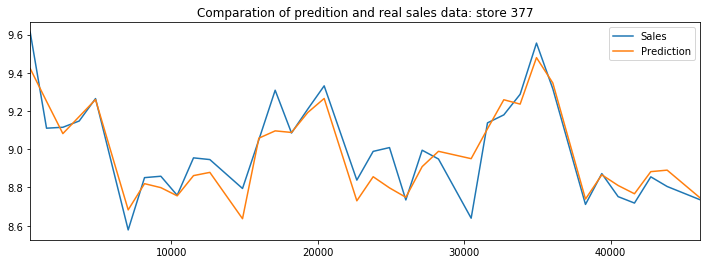

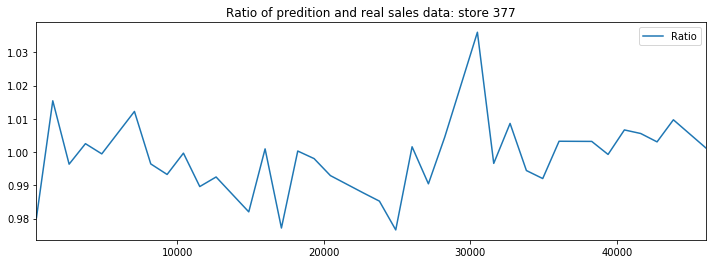

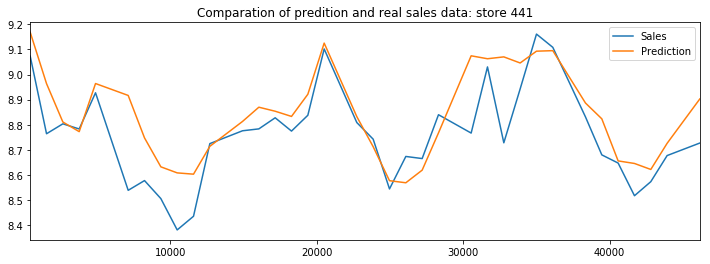

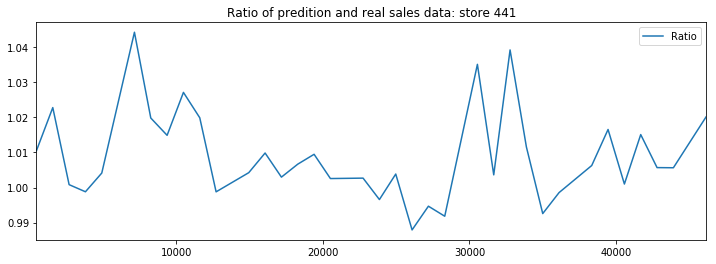

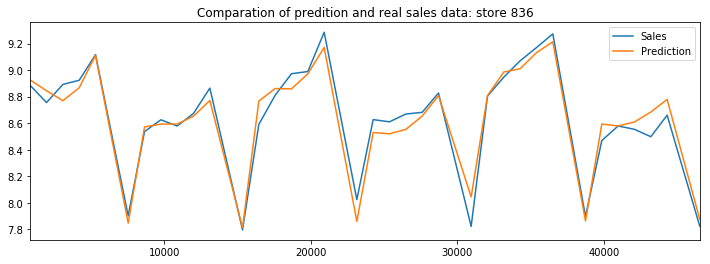

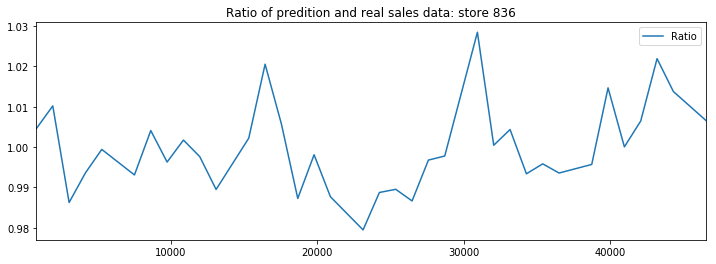

In [99]:
col_1 = ['Sales','Prediction']
col_2 = ['Ratio']
L=np.random.randint( low=1,high = 1115, size = 3 ) 
print('Mean Ratio of predition and real sales data is {}: store all'.format(res.Ratio.mean()))
for i in L:
    
    s1 = pd.DataFrame(res[res['Store']==i],columns = col_1)
    s2 = pd.DataFrame(res[res['Store']==i],columns = col_2)
    s1.plot(title = 'Comparation of predition and real sales data: store {}'.format(i),figsize=(12,4))
    s2.plot(title = 'Ratio of predition and real sales data: store {}'.format(i),figsize=(12,4))
    print('Mean Ratio of predition and real sales data is {}: store {}'.format(s2.Ratio.mean(),i))


In [100]:
res.sort_values(['Error'],ascending=False,inplace= True)
res[:10]

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Prediction,Ratio,Error,Weight
23706,292,4,0,0,0,1,1,1100.0,6.0,2009.0,...,10,28,73.0,24187.00,0,6.920672,8.547271,1.235035,0.235035,0.809694
39806,782,4,0,0,0,3,3,5390.0,8.0,2003.0,...,26,26,142.0,42.25,0,7.260523,8.609317,1.185771,0.185771,0.843333
34358,909,2,1,0,0,1,3,1680.0,0.0,0.0,...,1,27,24187.0,67.50,0,8.174139,9.479719,1.159721,0.159721,0.862277
44393,909,0,0,0,0,1,3,1680.0,0.0,0.0,...,22,26,24186.0,67.25,0,10.634701,9.177436,0.862971,0.137029,1.158788
30980,876,5,0,0,0,1,1,21790.0,4.0,2005.0,...,4,27,123.0,2.25,0,9.596215,8.327732,0.867814,0.132186,1.152320
30396,292,5,0,0,0,1,1,1100.0,6.0,2009.0,...,4,27,73.0,24186.75,0,7.406711,8.318821,1.123146,0.123146,0.890356
35971,292,0,1,0,0,1,1,1100.0,6.0,2009.0,...,29,27,72.0,24186.75,0,10.280622,9.052682,0.880558,0.119442,1.135644
28750,876,0,0,0,0,1,1,21790.0,4.0,2005.0,...,6,28,123.0,2.50,0,10.215777,9.044202,0.885317,0.114683,1.129539
38691,782,5,0,0,0,3,3,5390.0,8.0,2003.0,...,27,26,142.0,42.25,0,7.714677,8.585692,1.112904,0.112904,0.898550
43278,909,1,0,0,0,1,3,1680.0,0.0,0.0,...,23,26,24186.0,67.25,0,10.310252,9.174776,0.889869,0.110131,1.123761


weight correction
RMSPE for 0.990:0.128237
RMSPE for 0.991:0.125979
RMSPE for 0.992:0.124239
RMSPE for 0.993:0.123056
RMSPE for 0.994:0.122462
RMSPE for 0.995:0.122481
RMSPE for 0.996:0.123129
RMSPE for 0.997:0.124413
RMSPE for 0.998:0.126331
RMSPE for 0.999:0.128870
RMSPE for 1.000:0.132012
RMSPE for 1.001:0.135731
RMSPE for 1.002:0.139997
RMSPE for 1.003:0.144778
RMSPE for 1.004:0.150041
RMSPE for 1.005:0.155752
RMSPE for 1.006:0.161880
RMSPE for 1.007:0.168393
RMSPE for 1.008:0.175265
RMSPE for 1.009:0.182467
Best weight for Score:0.994    0.122462
dtype: float64


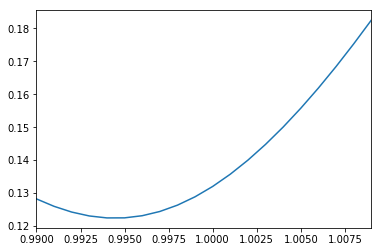

In [101]:
print("weight correction")
W=[(0.990+(i/1000)) for i in range(20)]
S =[]
for w in W:
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat*w))
    print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
    S.append(error)
Score = pd.Series(S,index=W)
Score.plot()
BS = Score[Score.values == Score.values.min()]
print ('Best weight for Score:{}'.format(BS))
 

In [107]:
L=range(1115)
W_ho=[]
W_test=[]
for i in L:
    s1 = pd.DataFrame(res[res['Store']==i+1],columns = col_1)
    s2 = pd.DataFrame(xtest[xtest['Store']==i+1])
    W1=[(0.990+(i/1000)) for i in range(20)]
    S =[]
    for w in W1:
        error = rmspe(np.expm1(s1.Sales), np.expm1(s1.Prediction*w))
        S.append(error)
    Score = pd.Series(S,index=W1)
    BS = Score[Score.values == Score.values.min()]
    a=np.array(BS.index.values)
    b_ho=a.repeat(len(s1))
    b_test=a.repeat(len(s2))
    W_ho.extend(b_ho.tolist())
    W_test.extend(b_test.tolist())


In [108]:

yhat_new = yhat*W_ho
error = rmspe(np.expm1(ho_ytest), np.expm1(yhat_new))
print ('RMSPE for weight corretion {:6f}'.format(error))


RMSPE for weight corretion 0.126172


In [109]:
print("Make predictions on the test set")
dtest = xgb.DMatrix(xtest.values)
test_probs = gbm.predict(dtest)

Make predictions on the test set


In [110]:
result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
result.to_csv("Rossmann_submission_1.csv", index=False)

In [111]:
result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs*0.994)})
result.to_csv("Rossmann_submission_2.csv", index=False)

In [112]:

result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs*W_test)})
result.to_csv("Rossmann_submission_3.csv", index=False)


In [68]:
#定义函数用来查看各行的信息以及各列的信息
def check_files(data,data_name,lineno):
    print('{:*^30}'.format('{}前{}行').format(data_name,str(lineno)))
    print(data.head(lineno))
    
    print('{:*^30}'.format('{}各列信息').format(data_name))
    print('{}\n\n\n'.format(data.info()))

In [69]:
#调用上面的函数查看信息
datas = [data_store,data_train,data_test]
data_names = ['data_store','data_train','data_test']
#c = [1,2,3]
lineno = 10
#用zip方法，把两个列表合并成一个元组
for data,data_name in zip(datas,data_names):
    check_files(data,data_name,lineno)

************data_store前10行************
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   
5      6         a          a                310.0                       12.0   
6      7         a          c              24000.0                        4.0   
7      8         a          a               7520.0                       10.0   
8      9         a          c               2030.0                        8.0   
9     10         a          a               3160.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear

In [70]:
#观察data_store的每个属性列的取值总共有哪些值，然后决定要怎么处理每个属性列中的空值
def check_unique(data):
    for column in data:
        print("列{}的取值，共有：".format(column),len(data[column].unique()))
        #print('{}为一值数量:'.format(column),len(data[column].unique()))
check_unique(data_store)

列Store的取值，共有： 1115
列StoreType的取值，共有： 4
列Assortment的取值，共有： 3
列CompetitionDistance的取值，共有： 655
列CompetitionOpenSinceMonth的取值，共有： 13
列CompetitionOpenSinceYear的取值，共有： 24
列Promo2的取值，共有： 2
列Promo2SinceWeek的取值，共有： 25
列Promo2SinceYear的取值，共有： 8
列PromoInterval的取值，共有： 4


Store 这一列从数据看应当是 每个商店的编号，从1到1115 分别代表 1号到1115号商店  
CompetitionOpenSinceMonth 这一列代表的如果是月份 不同的值应当只有12个月，这里为啥会出现13个月 

月份有空值 ，这里需要考虑对空值的处理方式

In [71]:

print(data_store.astype(str).groupby(['StoreType']).size())
print(data_store.astype(str).groupby(['Assortment']).size())
print(data_store.astype(str).groupby(['CompetitionOpenSinceYear']).size())
print(data_store.astype(str).groupby(['CompetitionOpenSinceMonth']).size())
print(data_store.astype(str).groupby(['Promo2']).size())
print(data_store.astype(str).groupby(['Promo2SinceWeek']).size())
print(data_store.astype(str).groupby(['Promo2SinceYear']).size())
print(data_store.astype(str).groupby(['PromoInterval']).size())



StoreType
a    602
b     17
c    148
d    348
dtype: int64
Assortment
a    593
b      9
c    513
dtype: int64
CompetitionOpenSinceYear
1900.0      1
1961.0      1
1990.0      5
1994.0      2
1995.0      2
1998.0      1
1999.0      8
2000.0     10
2001.0     16
2002.0     27
2003.0     19
2004.0     22
2005.0     62
2006.0     47
2007.0     48
2008.0     54
2009.0     54
2010.0     55
2011.0     54
2012.0     82
2013.0     83
2014.0     70
2015.0     38
nan       354
dtype: int64
CompetitionOpenSinceMonth
1.0      14
10.0     61
11.0     92
12.0     64
2.0      41
3.0      70
4.0      94
5.0      44
6.0      50
7.0      67
8.0      39
9.0     125
nan     354
dtype: int64
Promo2
0    544
1    571
dtype: int64
Promo2SinceWeek
1.0      35
10.0     42
13.0     34
14.0     81
18.0     29
22.0     33
23.0      5
26.0      1
27.0     11
28.0      1
31.0     44
35.0     25
36.0     10
37.0     35
39.0      6
40.0     77
44.0      3
45.0     34
48.0      9
49.0      1
5.0      39
50.0      1
6.0

1、从上面的结果 粗略观察，看到 竞争对手开业的年份和周 为空的记录数是匹配的，促销始于的年份、周、和频率的通知是匹配的。  
2、a 类商品数量最多，09年控死开始进行促销，竞争对手从2000年开始向后逐渐升高 ，每年1,4,7,10 参与促销的店最多  

In [72]:
#看看训练数据与测试数据的各个列的取值情况
data_train.head(10)
check_unique(data_train)

列Store的取值，共有： 1115
列DayOfWeek的取值，共有： 7
列Date的取值，共有： 942
列Sales的取值，共有： 21734
列Customers的取值，共有： 4086
列Open的取值，共有： 2
列Promo的取值，共有： 2
列StateHoliday的取值，共有： 5
列SchoolHoliday的取值，共有： 2


In [73]:
#检查一下每个列的取值唯一情况
print(data_train.astype(str).groupby(['DayOfWeek']).size())
print(data_train.astype(str).groupby(['Open']).size())
print(data_train.astype(str).groupby(['Promo']).size())
print(data_train.astype(str).groupby(['StateHoliday']).size())
print(data_train.astype(str).groupby(['SchoolHoliday']).size())

DayOfWeek
1    144730
2    145664
3    145665
4    145845
5    145845
6    144730
7    144730
dtype: int64
Open
0    172817
1    844392
dtype: int64
Promo
0    629129
1    388080
dtype: int64
StateHoliday
0    986159
a     20260
b      6690
c      4100
dtype: int64
SchoolHoliday
0    835488
1    181721
dtype: int64


In [74]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [75]:

data_train.StateHoliday=data_train.StateHoliday.map({'0':'无',0:'无','a':'公共假日','b':'复活节假期','c':'圣诞节'})
data_train.StateHoliday.unique()
print(data_train.groupby(data_train.StateHoliday).size())

StateHoliday
公共假日      20260
圣诞节        4100
复活节假期      6690
无        986159
dtype: int64


In [76]:
check_unique(data_test)


列Id的取值，共有： 41088
列Store的取值，共有： 856
列DayOfWeek的取值，共有： 7
列Date的取值，共有： 48
列Open的取值，共有： 3
列Promo的取值，共有： 2
列StateHoliday的取值，共有： 2
列SchoolHoliday的取值，共有： 2


In [77]:
data_test.StateHoliday=data_test.StateHoliday.map({'0':'无',0:'无','a':'公共假日','b':'复活节假期','c':'圣诞节'})
data_test.StateHoliday.unique()

array(['无', '公共假日'], dtype=object)

In [90]:
print(data_test.Open.unique())
print(data_test.astype(str).groupby(['Open']).size())

[ 1. nan  0.]
Open
0.0     5984
1.0    35093
nan       11
dtype: int64


In [91]:
#对缺失值和空值进行处理，前提是先找到哪些列有缺失值和空值
def check_none(data):
    print("{:*^30}".format('有空值的列'))
    print(data.isnull().any(axis = 0))
    print("{:*^30}".format('有空值的行'))
    print(data.isnull().any(axis = 1).sum())

In [92]:
#对store进行判定
check_none(data_store)

************有空值的列*************
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool
************有空值的行*************
750


1、和竞争对手距离相关的列存在空值  
2、和促销相关的列存在空值  
3、有空值的行有750 行，一半以上的行存在空值，需要进行处理

In [93]:
#对train进行判定
check_none(data_train)

************有空值的列*************
Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
************有空值的行*************
0


训练数据不需特别处理

In [94]:
#对test进行判定
check_none(data_test)

************有空值的列*************
Id               False
Store            False
DayOfWeek        False
Date             False
Open              True
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
************有空值的行*************
11


In [20]:
#竞争对手距离，开启的年份，开启的月份有空，三者为空是不是伴随出现的，对于促销也是同理，无促销就无促销日期，无竞争对手就无竞争对手的开启时间，对空值列进行检测
def check_none_together(data,columns):
    indexes = {}
    indexes_len={}
    for column in columns:
        #print(len(data[data[column].isnull()].index))
        index = data[data[column].isnull()].index
        if column not in indexes:
            indexes[column] = index
            indexes_len[column] = len(index)
            
           # indexes[column].append(index)
          #  indexes_len[column].append()
    
    compare_dict = {}
    for key1 in indexes:
        for key2 in indexes:
            if key1 == key2:continue

            if key1 not in compare_dict:
                compare_dict[key1] = {}
                compare_dict[key1][key2] = 1
            else:
                if key2 not in compare_dict[key1]:
                    compare_dict[key1][key2] = 1
                else:
                    continue
            
            if key2 not in compare_dict:
                compare_dict[key2] = {}
                compare_dict[key2][key1] = 1
            else:
                if key1 not in compare_dict[key2]:
                    compare_dict[key2][key1] = 1
                else:
                    continue
                    
         #   print(key2)
            if set(indexes[key1]) == set(indexes[key2]):
                print('列{}和列{}的相同行是空值'.format(key1,key2))
            else:
                print('列{}缺失行数是{}：，列{}的缺失行数是：{},缺失值行数不同'.format(key1,indexes_len[key1],key2,indexes_len[key2]))

        

check_none_together(data_store,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])
check_none_together(data_store,['Promo2SinceWeek','Promo2SinceYear','PromoInterval'])



列CompetitionDistance缺失行数是3：，列CompetitionOpenSinceMonth的缺失行数是：354,缺失值行数不同
列CompetitionDistance缺失行数是3：，列CompetitionOpenSinceYear的缺失行数是：354,缺失值行数不同
列CompetitionOpenSinceMonth和列CompetitionOpenSinceYear的相同行是空值
列Promo2SinceWeek和列Promo2SinceYear的相同行是空值
列Promo2SinceWeek和列PromoInterval的相同行是空值
列Promo2SinceYear和列PromoInterval的相同行是空值


In [101]:
#观察一下促销相关的列与是否促销列：Promo2为0的索引是否一致
index = data_store[data_store['Promo2SinceWeek'].isnull()].index
print(len(index))
a = sum(data_store.iloc[index]['Promo2'])
print(a)

544
0


验证的结论就是如果没有参与促销，促销相关内容的列都是空

In [102]:
data_train_new=pd.merge(data_train,data_store,on='Store',how='left')
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015/7/31,5263,555,1,1,无,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015/7/31,6064,625,1,1,无,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015/7/31,8314,821,1,1,无,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015/7/31,13995,1498,1,1,无,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015/7/31,4822,559,1,1,无,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [103]:
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,无,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,无,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,无,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,无,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,无,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [104]:
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 no

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'sales')

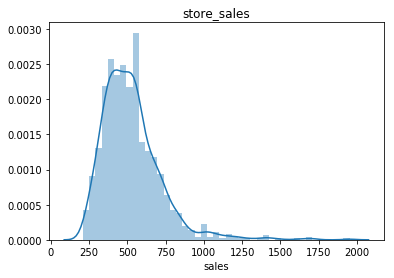

In [54]:
#每家店sales总额的分布
df1=data_train.groupby('Store')['Sales'].sum()/10000
sns.distplot(df1)
plt.title('store_sales')
plt.xlabel('sales')

销售额的直方图分布，绝大部分的店铺的销售总额在250W到750W之间  

Text(0.5,1,'一周不同的天平均每天每个店的销售情况')

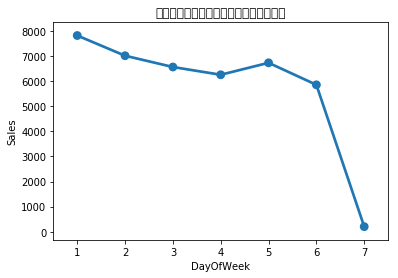

In [122]:
#一周不同的天平均每天每个店的销售情况
#sns.pointplot(data=data_train_new[::100],x='DayOfWeek',y='Sales') 让sns作groupby统计耗时非常长，所以需要先group不要做处理
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('一周不同的天平均每天每个店的销售情况')


按照周一到周日来看，周日的平均销量最低，猜测是不是周日不开门导致

   DayOfWeek  open_rate
0          1   0.950459
1          2   0.988309
2          3   0.974400
3          4   0.923199
4          5   0.950598
5          6   0.995357
6          7   0.024826


Text(0.5,1,'一周的平均营业率')

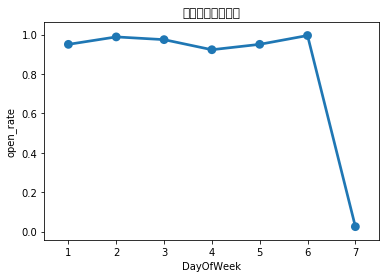

In [136]:
#一周的平均营业率
df3=data_train_new.groupby('DayOfWeek')['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
print(df3)
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('一周的平均营业率')

周日营业概率很低，所以周日的销量也很低

Text(0.5,1,'每月平均销售额情况')

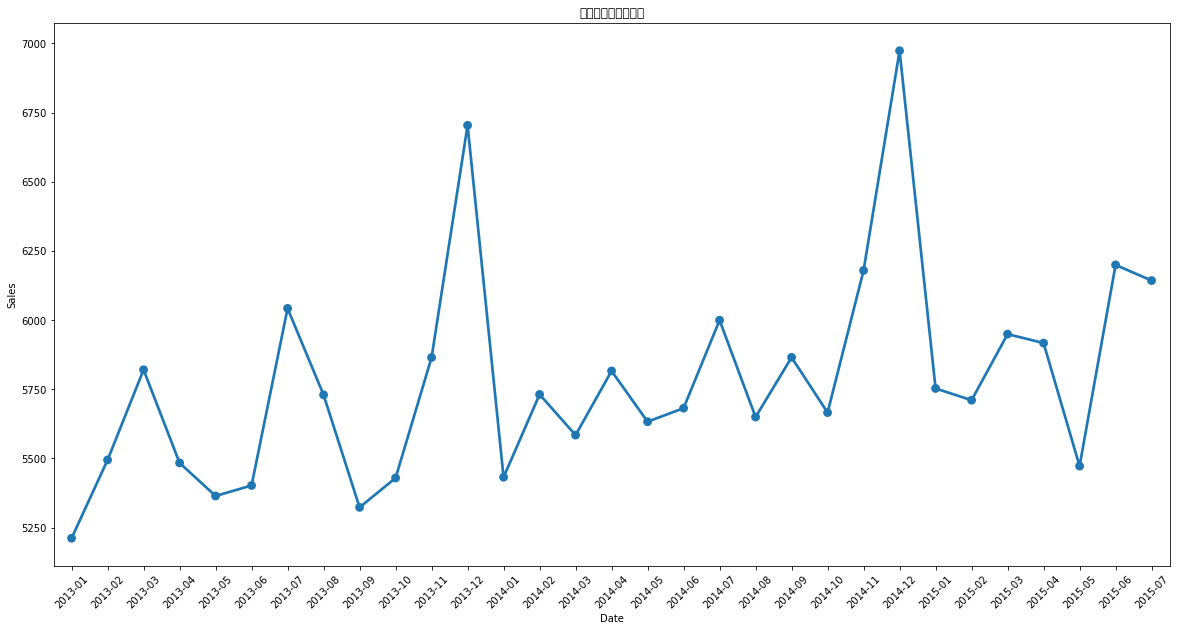

In [138]:
#探索每个月平均销售情况
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M',kind='period').mean().reset_index()#resample能够把聚合时间变成月份，去除日
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df4,x='Date',y='Sales',ax=ax)
plt.xticks(rotation=45)
ax.set_title('每月平均销售额情况')


没有特别明显的分布特征，但12月份连续两年都最高

In [139]:
#对data_train_new日期进行年，月，日进行处理
data_train_new['year']=data_train_new.Date.map(lambda x:x.year)
data_train_new['month']=data_train_new.Date.map(lambda x:x.month)
data_train_new['day']=data_train_new.Date.map(lambda x:x.day)
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,无,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,无,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,无,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,无,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,无,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


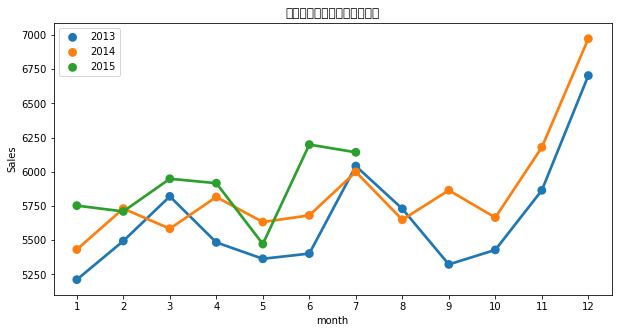

In [141]:
#不同年每个月份平均销售情况
df5=data_train_new.Sales.groupby([data_train_new.year,data_train_new.month]).mean().reset_index()
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.pointplot(x='month',y='Sales',hue='year',data=df5,ax=ax)

plt.title('不同年每个月份平均销售情况')
plt.legend(loc='best')

每年销售额随月份波动很明显，但连续两年的统一规律是 10-12月份急速上升之后，1月份回落

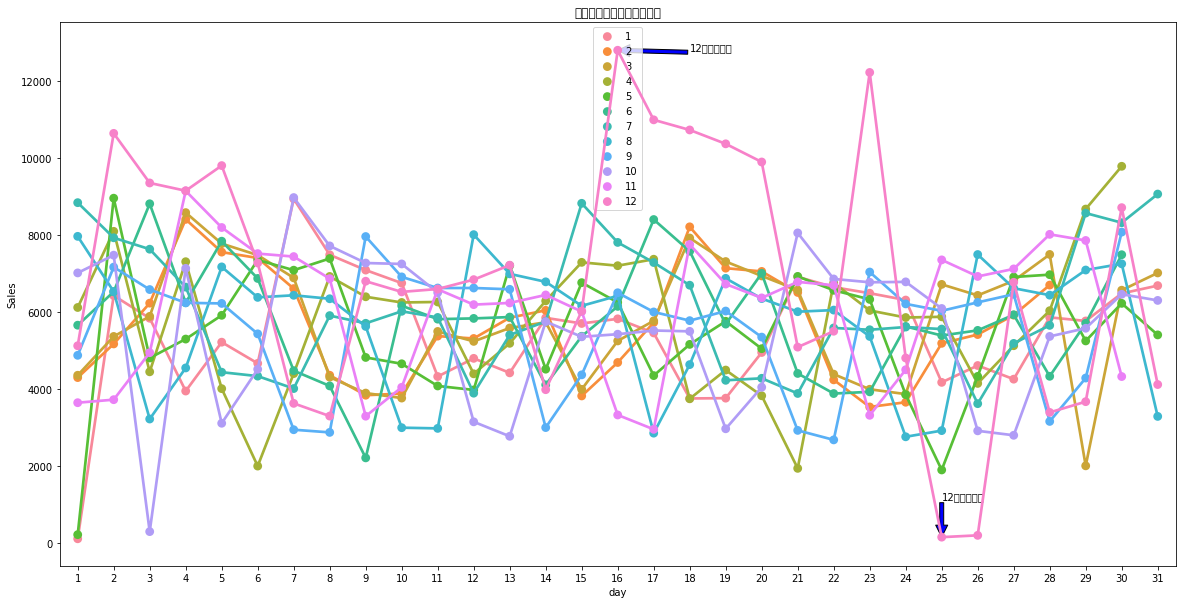

In [143]:
#不同月份每天平均销售情况
df6=data_train_new.Sales.groupby([data_train_new.month,data_train_new.day]).mean().reset_index()
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(x='day',y='Sales',hue='month',data=df6,ax=ax)
ax.set_title('不同月份每天平均销售情况')

#标记12月份最高值与最低值
dec_max=df6[df6.month==12].Sales.max()
dec_min=df6[df6.month==12].Sales.min()
plt.annotate('12月份最高值',xy=(15,dec_max),xytext=(17,dec_max),arrowprops={'facecolor':'b'})#xy中横坐标第一个数为1，所以填写的横坐标和图上的差一
plt.annotate('12月份最低值',xy=(24,dec_min),xytext=(24,dec_min+1000),arrowprops={'facecolor':'b'})
plt.legend(loc='best')



与时间的分布关系中显示出：  
1、每周日基本不营业，不营业的状况下，营业额低  
2、每一年10,11,12月份营业额急速上升，在1月份落到全年谷底  
3、12月份中16日上升之后缓慢下降，直到25日到谷底 

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


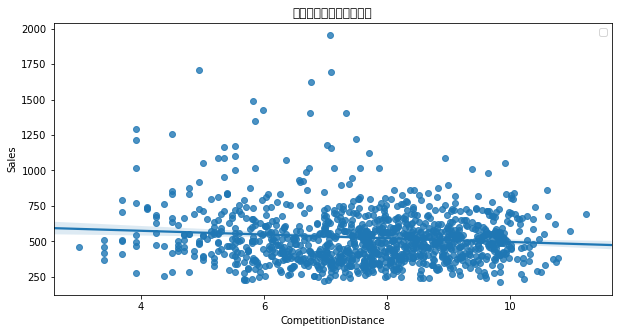

In [146]:
#探索竞争者距离和销售额关系
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})#每个店销售总额
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x))#对距离取log，收缩分布
df7['Sales']=df7['Sales'].map(lambda x:x/10000)#销售额以万元为单位
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('竞争者距离和销售额关系')
plt.legend(loc='best')


D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


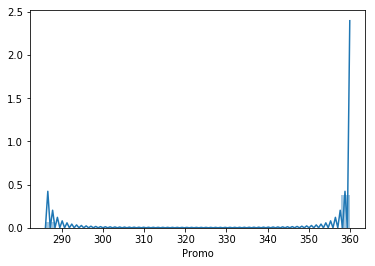

In [147]:
#店铺促销次数比例分布
df7=data_train_new.groupby('Store')['Promo'].sum()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.distplot(df7,ax=ax)

[Text(0.5,1,'店铺促销次数分布')]

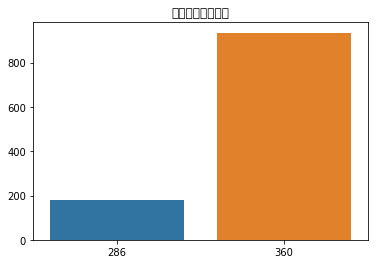

In [148]:
df8=df7.value_counts()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.barplot(df8.index,df8.values,ax=ax)
ax.set(**{'title':'店铺促销次数分布'})

[Text(0.5,1,'促销天和非促销天销售分布情况')]

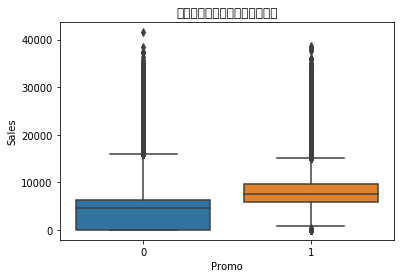

In [149]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new,ax=ax)
ax.set(**{'title':'促销天和非促销天销售分布情况'})


[Text(0.5,1,'促销天和非促销天销售分布情况')]

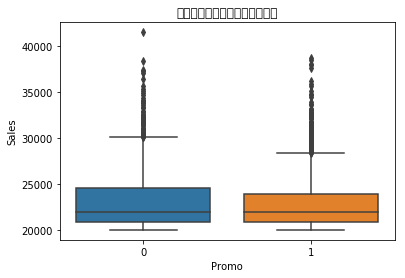

In [164]:
#对比促销天和非促销天销售分布情况(一天销售额超过20000的)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new[data_train_new.Sales>20000],ax=ax)
ax.set(**{'title':'促销天和非促销天销售分布情况'})


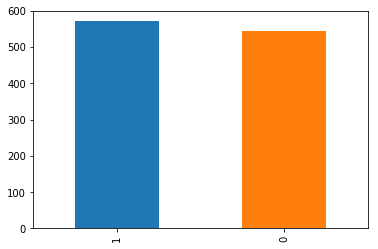

In [167]:
#有无promo2的店数量对比
df9=data_store.Promo2.value_counts()
df9.plot(kind='bar')


[Text(0.5,1,'有无promo2的每天每个店销售情况对比')]

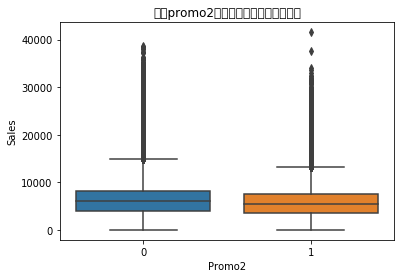

In [168]:
#有无promo2的每天每个店销售情况对比
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo2',data=data_train_new,ax=ax)
ax.set(**{'title':'有无promo2的每天每个店销售情况对比'})

[Text(0.5,1,'有无promo2的店铺的平均每天销售情况对比(平均销售额大于10000的店)')]

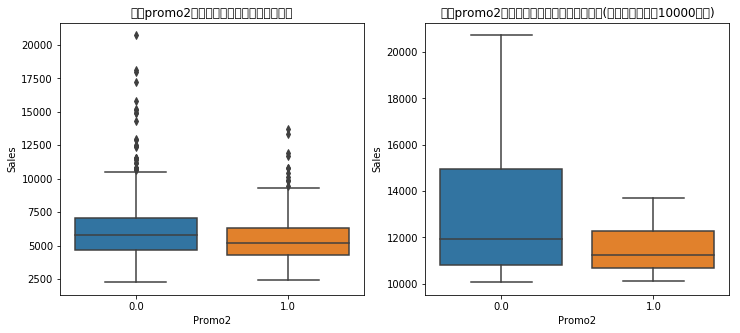

In [169]:
#有无promo2的店铺的平均每天销售情况对比
df10=data_train_new.groupby('Store')['Promo2','Sales'].mean()
fig=plt.figure(figsize=(12,5))
ax=fig.subplots(1,2)
sns.boxplot(y='Sales',x='Promo2',data=df10,ax=ax[0])
ax[0].set(**{'title':'有无promo2的店铺的平均每天销售情况对比'})
sns.boxplot(y='Sales',x='Promo2',data=df10[df10.Sales>=10000],ax=ax[1])
ax[1].set(**{'title':'有无promo2的店铺的平均每天销售情况对比(平均销售额大于10000的店)'})

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'国家节假日的销售分布(营业的店)')]

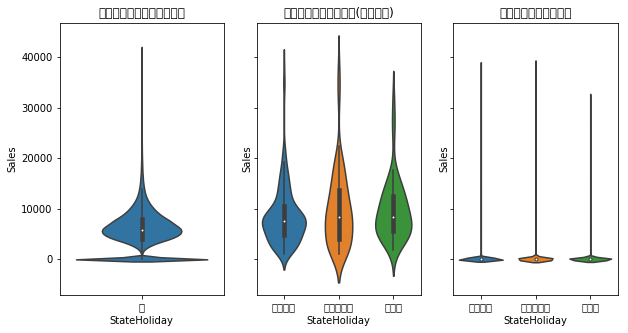

In [170]:
#对比stateholiday销售分布情况
fig,ax=plt.subplots(1,3,sharey=True,figsize=(10,5))

#不是国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday=='无'],ax=ax[0])
ax[0].set(**{'title':'不是国家节假日的销售分布'})
#国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='无'],ax=ax[2])
ax[2].set(**{'title':'国家节假日的销售分布'})
#国家节假日的销售分布(营业的店)
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[(data_train_new.StateHoliday!='无')&(data_train_new.Sales>0)],ax=ax[1])
ax[1].set(**{'title':'国家节假日的销售分布(营业的店)'})

[Text(0.5,1,'SchoolHoliday的销售分布（Sales>=15000）')]

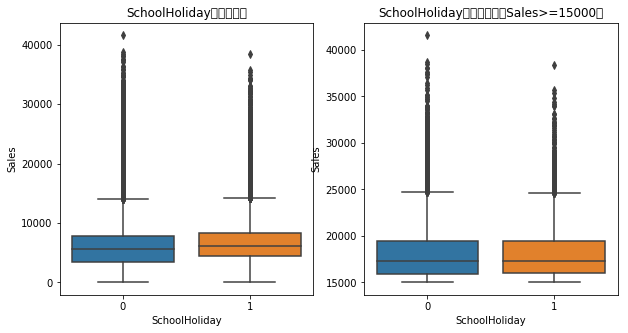

In [172]:
#对比SchoolHoliday销售分布情况

fig,ax=plt.subplots(1,2,figsize=(10,5))
#SchoolHoliday的销售分布
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'SchoolHoliday的销售分布'})
#SchoolHoliday的销售分布（Sales>=15000）
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new[data_train_new.Sales>=15000],ax=ax[1])
ax[1].set(**{'title':'SchoolHoliday的销售分布（Sales>=15000）'})


D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'不同StoreType的平均每天每个商店销售分布')]

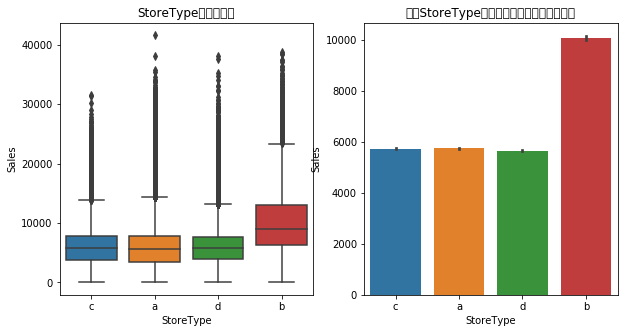

In [173]:
#StoreType
fig,ax=plt.subplots(1,2,figsize=(10,5))
#StoreType的销售分布
sns.boxplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'StoreType的销售分布'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[1])
ax[1].set(**{'title':'不同StoreType的平均每天每个商店销售分布'})

b类的销售额更高

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'不同Assortment的平均每天每个商店销售分布')]

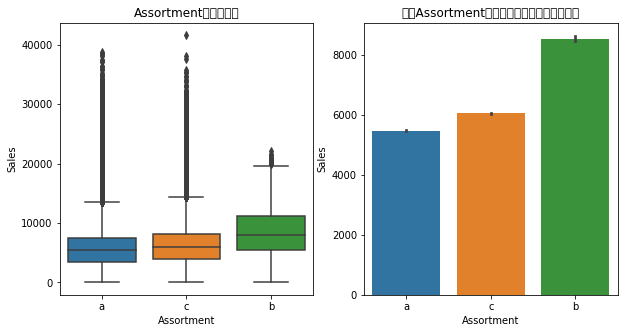

In [174]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
#Assortment的销售分布
sns.boxplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'Assortment的销售分布'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[1])
ax[1].set(**{'title':'不同Assortment的平均每天每个商店销售分布'})

对于Assortment，可以看出b类型最高，c比a类型高一些

[Text(0.5,1,'顾客数与销售额的关系')]

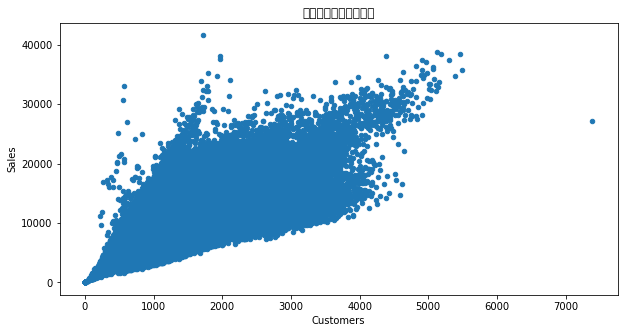

In [175]:
#顾客数与销售额的关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
data_train_new.plot.scatter(y='Sales',x='Customers',ax=ax)
ax.set(**{'title':'顾客数与销售额的关系'})

[Text(0.5,1,'是否营业与销售额关系')]

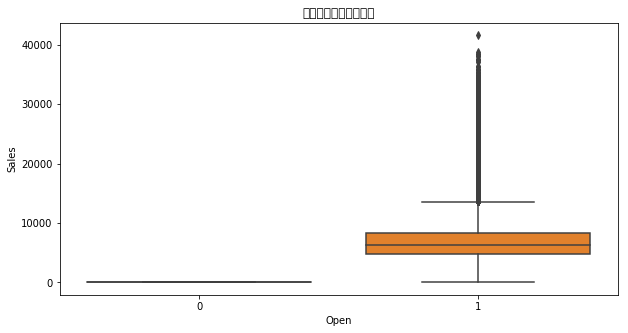

In [176]:
#探索是否营业与销售额关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Open',data=data_train_new,ax=ax)
ax.set(**{'title':'是否营业与销售额关系'})

In [178]:
#如下进行特征工程

#删除顾客数一列
data_train=data_train.drop('Customers',axis=1)
#对data_test先做和data_train之前相同的变化
#data_test.StateHoliday=data_test.StateHoliday.map({'0':'无',0:'无','a':'公共假日','b':'复活节假期','c':'圣诞节'})
#连接test表和train表
data_train_test=pd.concat([data_train,data_test.drop('Id',axis=1)],axis=0,ignore_index=True)
data_train_test.sample(5)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store
915525,2013/4/2,2,1.0,0,7025.0,1,无,896
974900,2013/2/7,4,1.0,1,3792.0,0,无,61
774963,2013/8/6,2,1.0,0,4590.0,0,无,824
6864,2015/7/25,6,1.0,0,5343.0,0,无,175
809196,2013/7/6,6,1.0,0,6783.0,0,无,492


In [179]:
#连接store表和train_test表
data_train_test=pd.merge(data_train_test,data_store,on='Store',how='left')
data_train_test.head(3)

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015/7/31,5,1.0,1,5263.0,1,无,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2015/7/31,5,1.0,1,6064.0,1,无,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015/7/31,5,1.0,1,8314.0,1,无,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [180]:
data_train_test.Date=pd.to_datetime(data_train_test.Date)
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 1058296
Data columns (total 17 columns):
Date                         1058297 non-null datetime64[ns]
DayOfWeek                    1058297 non-null int64
Open                         1058286 non-null float64
Promo                        1058297 non-null int64
Sales                        1017209 non-null float64
SchoolHoliday                1058297 non-null int64
StateHoliday                 1058297 non-null object
Store                        1058297 non-null int64
StoreType                    1058297 non-null object
Assortment                   1058297 non-null object
CompetitionDistance          1055559 non-null float64
CompetitionOpenSinceMonth    719733 non-null float64
CompetitionOpenSinceYear     719733 non-null float64
Promo2                       1058297 non-null int64
Promo2SinceWeek              533034 non-null float64
Promo2SinceYear              533034 non-null float64
PromoInterval                5330

In [181]:
#把日期时间分解
data_train_test['year']=data_train_test.Date.map(lambda x:x.year)
data_train_test['month']=data_train_test.Date.map(lambda x:x.month)
data_train_test['day']=data_train_test.Date.map(lambda x:x.day)
data_train_test['Date']=data_train_test.Date.map(lambda x:x.date())
#检查空值
check_none(data_train_test)

************有空值的列*************
Date                         False
DayOfWeek                    False
Open                          True
Promo                        False
Sales                         True
SchoolHoliday                False
StateHoliday                 False
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
year                         False
month                        False
day                          False
dtype: bool
************有空值的行*************
733971


In [182]:
#检查open列空值情况
sum(data_train_test.Open.isnull())
11

11

In [183]:
#查看这11行的缺失情况
data_train_test[data_train_test.Open.isnull()]

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
1017688,2015-09-17,4,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
1018544,2015-09-16,3,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
1019400,2015-09-15,2,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
1020256,2015-09-14,1,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14
1021968,2015-09-12,6,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,12
1022824,2015-09-11,5,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,11
1023680,2015-09-10,4,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,10
1024536,2015-09-09,3,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,9
1025392,2015-09-08,2,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,8
1026248,2015-09-07,1,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,7


In [184]:
data_train_test.loc[[1017688,1018544,1019400,1020256],'Open']=1
data_train_test.loc[[1017688,1018544,1019400,1020256]]#检查是否改正成功

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
1017688,2015-09-17,4,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
1018544,2015-09-16,3,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
1019400,2015-09-15,2,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
1020256,2015-09-14,1,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14


[Text(0,0,'2015-09-05'),
 Text(0,0,'2015-09-07'),
 Text(0,0,'2015-09-07'),
 Text(0,0,'2015-09-08'),
 Text(0,0,'2015-09-08'),
 Text(0,0,'2015-09-09'),
 Text(0,0,'2015-09-09')]

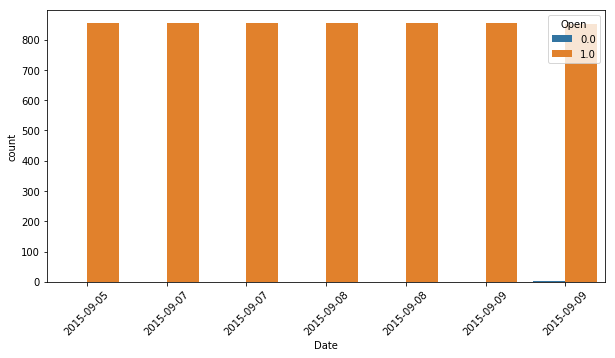

In [185]:
#找出空值的日期，作图看该日期其他店的营运情况
date_null=data_train_test[data_train_test.Open.isnull()].Date
#查看这个日期下其他店铺是否营业情况
data_date_null=data_train_test[data_train_test.Date.isin(date_null)]
df12=data_date_null.groupby(['Date','Open'])['Store'].count().rename('count').reset_index()

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.barplot('Date','count',hue='Open',data=df12,ax=ax)
ax.set_xticklabels(df12.Date,rotation=45)

In [186]:
index_null=data_train_test[data_train_test.Open.isnull()].index
data_train_test.loc[index_null,'Open']=1
sum(data_train_test.Open.isnull())#查看是否补全空值


0

In [187]:
#检查每列的空值行数
def check_none_col(data,column):
    print('{}的缺失行数：'.format(column),sum(data[column].isnull()))
    print('{}的缺失率：'.format(column),round(sum(data[column].isnull())/data.shape[0],3))
columns=['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
         'Promo2SinceWeek','Promo2SinceYear','PromoInterval']   
for i in columns:
    check_none_col(data_store,i)

CompetitionDistance的缺失行数： 3
CompetitionDistance的缺失率： 0.003
CompetitionOpenSinceMonth的缺失行数： 354
CompetitionOpenSinceMonth的缺失率： 0.317
CompetitionOpenSinceYear的缺失行数： 354
CompetitionOpenSinceYear的缺失率： 0.317
Promo2SinceWeek的缺失行数： 544
Promo2SinceWeek的缺失率： 0.488
Promo2SinceYear的缺失行数： 544
Promo2SinceYear的缺失率： 0.488
PromoInterval的缺失行数： 544
PromoInterval的缺失率： 0.488


In [188]:
#查看缺失列与sales的相关关系
data_tem=pd.concat([data_train_test[columns],data_train_test.Sales],axis=1)
data_tem.corr()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Sales
CompetitionDistance,1.000000,-0.059595,0.025997,-0.055272,-0.108762,-0.019229
CompetitionOpenSinceMonth,-0.059595,1.000000,-0.059889,-0.034530,0.049577,-0.028257
CompetitionOpenSinceYear,0.025997,-0.059889,1.000000,-0.080417,0.010982,0.012659
Promo2SinceWeek,-0.055272,-0.034530,-0.080417,1.000000,-0.242425,0.059558
Promo2SinceYear,-0.108762,0.049577,0.010982,-0.242425,1.000000,-0.021127
Sales,-0.019229,-0.028257,0.012659,0.059558,-0.021127,1.000000


In [189]:
#备份数据，以防改错数据
data_safe=data_train_test
#平均值填补距离
data_train_test.CompetitionDistance=data_train_test.CompetitionDistance.fillna(data_train_test.CompetitionDistance.mean())
#众数填补其他
for i in columns:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mode()[0])#mode返回series，不是一个数
check_none(data_train_test)

************有空值的列*************
Date                         False
DayOfWeek                    False
Open                         False
Promo                        False
Sales                         True
SchoolHoliday                False
StateHoliday                 False
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
year                         False
month                        False
day                          False
dtype: bool
************有空值的行*************
41088


In [190]:
data_train_test.dtypes

Date                          object
DayOfWeek                      int64
Open                         float64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
year                           int64
month                          int64
day                            int64
dtype: object

In [191]:
#浮点数转为整数
def convert_to_int(data,columns):
    for i in columns:
        data[i]=data[i].astype(np.int64)
    return data
columns_float=['Open','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']
data_train_test=convert_to_int(data_train_test,columns_float)
data_train_test.dtypes

Date                          object
DayOfWeek                      int64
Open                           int64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth      int64
CompetitionOpenSinceYear       int64
Promo2                         int64
Promo2SinceWeek                int64
Promo2SinceYear                int64
PromoInterval                 object
year                           int64
month                          int64
day                            int64
dtype: object

In [192]:
#将数值数据转化为分类数据
def convert_to_object(data,columns):
    for i in columns:
        data[i]=data[i].astype(np.str)
    return data
columns_classify=['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','year','month','day']
data_train_test=convert_to_object(data_train_test,columns_classify)
data_train_test.dtypes

Date                          object
DayOfWeek                     object
Open                           int64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth     object
CompetitionOpenSinceYear      object
Promo2                         int64
Promo2SinceWeek               object
Promo2SinceYear               object
PromoInterval                 object
year                          object
month                         object
day                           object
dtype: object

In [193]:
check_unique(data_train_test)

列Date的取值，共有： 990
列DayOfWeek的取值，共有： 7
列Open的取值，共有： 2
列Promo的取值，共有： 2
列Sales的取值，共有： 21735
列SchoolHoliday的取值，共有： 2
列StateHoliday的取值，共有： 4
列Store的取值，共有： 1115
列StoreType的取值，共有： 4
列Assortment的取值，共有： 3
列CompetitionDistance的取值，共有： 655
列CompetitionOpenSinceMonth的取值，共有： 12
列CompetitionOpenSinceYear的取值，共有： 23
列Promo2的取值，共有： 2
列Promo2SinceWeek的取值，共有： 24
列Promo2SinceYear的取值，共有： 7
列PromoInterval的取值，共有： 3
列year的取值，共有： 3
列month的取值，共有： 12
列day的取值，共有： 31


In [194]:
data_store['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [196]:
#分类数据二值化处理，onehot
def convert_to_twovalues(data,columns):
    connect_column=[]
    for i in columns:
        df_tem=pd.get_dummies(data[i],prefix=i)
        connect_column.append(df_tem)
    data_new=pd.concat(connect_column,axis=1)
    return data_new
columns_value_processing=['DayOfWeek','StateHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                          'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','year','month','day']
data_value_processing=convert_to_twovalues(data_train_test,columns_value_processing)
data_value_processing.head()

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_公共假日,StateHoliday_圣诞节,StateHoliday_复活节假期,...,day_29,day_3,day_30,day_31,day_4,day_5,day_6,day_7,day_8,day_9
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [197]:
#数值类型进行归一化(0-1范围)
def feature_standarize(data,columns):
    combine_col=[]
    for j in columns:
        min_=data[j].min()
        max_=data[j].max()
        standard_col=data[j].apply(lambda x:(x-min_)/(max_-min_))#标准化为0-1范围
        #standard_col=data[j].apply(lambda x:(x-data[j].min())/(data[j].max()-data[j].min()))这样运行很慢，因为每次都要找min，max
        combine_col.append(standard_col)
    data_new2=pd.concat(combine_col,axis=1)
    return data_new2

data_CompetitionDistance=feature_standarize(data_train_test,['CompetitionDistance'])
data_CompetitionDistance.head()

,CompetitionDistance
0,0.016482
1,0.007252
2,0.186050
3,0.007911
4,0.394119


In [198]:
#连接数据data_value_processing，data_CompetitionDistance，data_train_test未作修改的列

data_train_test_new=pd.concat([data_value_processing,data_CompetitionDistance,data_train_test[['Open','Promo','SchoolHoliday','Promo2']]],axis=1)
data_train_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 1058296
Columns: 138 entries, DayOfWeek_1 to Promo2
dtypes: float64(1), int64(4), uint8(133)
memory usage: 222.7 MB


In [199]:
#将数据拆分为训练_测试数据和预测数据
index_split=data_train.shape[0]-1
data_train_test_final=pd.concat([data_train_test_new.loc[:index_split],data_train['Sales']],axis=1)
data_for_predict=data_train_test_new.loc[data_train.shape[0]:]
print(data_train_test_final.info())#打印训练测试数据信息
print(data_for_predict.info())#打印预测数据信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Columns: 139 entries, DayOfWeek_1 to Sales
dtypes: float64(1), int64(5), uint8(133)
memory usage: 183.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 1017209 to 1058296
Columns: 138 entries, DayOfWeek_1 to Promo2
dtypes: float64(1), int64(4), uint8(133)
memory usage: 7.1 MB
None


In [200]:
#做模型前先看看各变量与销售额的相关关系
corr=data_train_test_final.corr()['Sales']
print('{:*^30}'.format('正相关前10的列'))
print(corr.sort_values(ascending=False)[:10])
print('{:*^30}'.format('负相关前10的列'))
print(corr.sort_values()[:10])

***********正相关前10的列***********
Sales             1.000000
Open              0.678472
Promo             0.452345
StateHoliday_无    0.254216
DayOfWeek_1       0.215309
StoreType_b       0.139940
DayOfWeek_2       0.130764
DayOfWeek_5       0.100895
SchoolHoliday     0.085124
DayOfWeek_3       0.083047
Name: Sales, dtype: float64
***********负相关前10的列***********
DayOfWeek_7                      -0.589219
StateHoliday_公共假日                -0.203028
StateHoliday_复活节假期               -0.117497
StateHoliday_圣诞节                 -0.092618
Promo2                           -0.091040
Assortment_a                     -0.080494
Promo2SinceYear_2013             -0.079153
day_1                            -0.053450
PromoInterval_Mar,Jun,Sept,Dec   -0.053267
day_25                           -0.045535
Name: Sales, dtype: float64


In [201]:
#导入模型
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error,r2_score
#拆分数据为训练数据和测试数据
data_x=data_train_test_final.iloc[:,:-1]
data_y=data_train_test_final.iloc[:,-1:]
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.2)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(813767, 138)
(813767, 1)
(203442, 138)
(203442, 1)


In [203]:
import warnings
warnings.filterwarnings("ignore")
import time

#用cross_val_score交叉检验各模型的评分
lr_model=LinearRegression()
tree_model=DecisionTreeRegressor()
gbdt_model=GradientBoostingRegressor()
rfr_model=RandomForestRegressor()
models=[lr_model,tree_model,rfr_model,gbdt_model]
model_names=['lr_model','tree_model','rfr_model','gbdt_model']
scores=[]
for model,model_name in zip(models,model_names):
    t5=time.time()
    score=cross_val_score(model,train_x,train_y,cv=StratifiedKFold(5))
    t6=time.time()
    print('{}运行时间：'.format(model_name),(t6-t5))
    scores.append(score)
score_matrix=pd.DataFrame(scores,index=model_names)
score_matrix['mean']=score_matrix.mean(axis=1)
score_matrix['std']=score_matrix.std(axis=1)
print('{:*^30}'.format('各模型分数矩阵'))
print(score_matrix)

lr_model运行时间： 142.30733966827393
tree_model运行时间： 203.0049855709076
rfr_model运行时间： 704.7088928222656
gbdt_model运行时间： 1252.8785724639893
***********各模型分数矩阵************
                   0         1         2         3         4      mean  \
lr_model    0.533623  0.607483  0.632179  0.644794  0.651024  0.613821   
tree_model  0.882182  0.898470  0.897773  0.895960  0.896433  0.894164   
rfr_model   0.913771  0.938675  0.937934  0.938716  0.937396  0.933298   
gbdt_model  0.569299  0.656730  0.680459  0.693574  0.699992  0.660011   

                 std  
lr_model    0.042784  
tree_model  0.006058  
rfr_model   0.009776  
gbdt_model  0.047713  


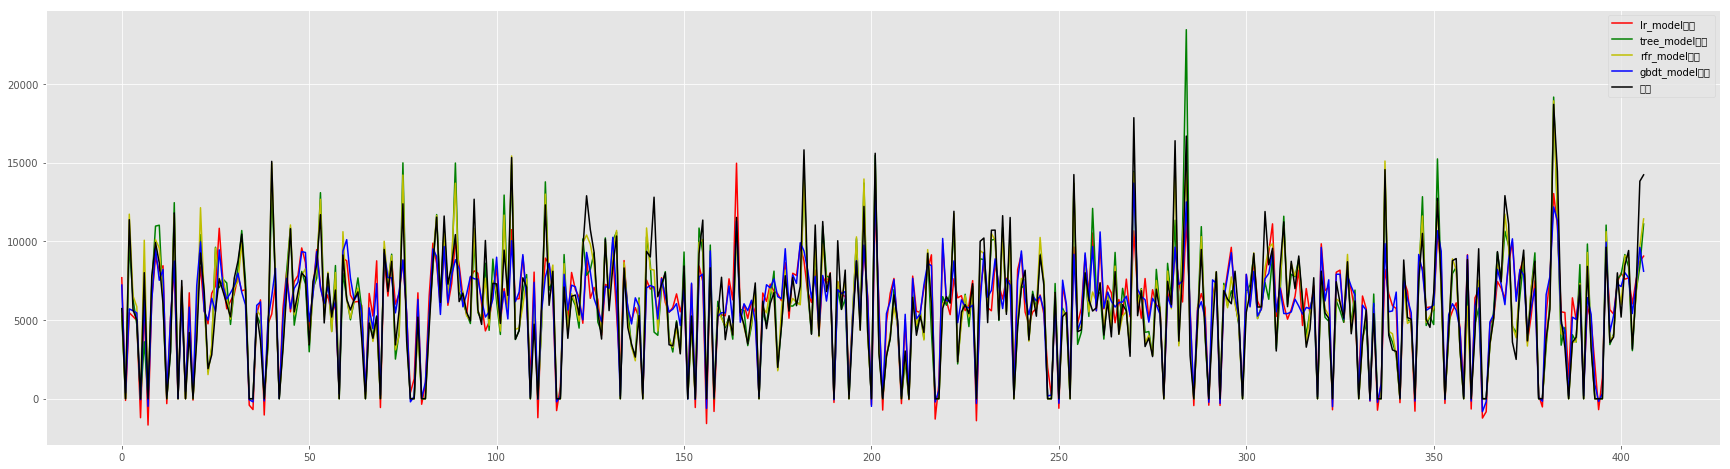

In [204]:
#对测试数据进行预测和实际结果对比，并通过mse和r2评分，将分数保存到scores3里
scores3=[]
for model,model_name in zip(models,model_names):
    model.fit(train_x,train_y)
    y_pred=model.predict(test_x)
    mse=mean_squared_error(test_y,y_pred)
    r2=r2_score(test_y,y_pred)
    scores3.append([mse,r2])

#作图查看测试数据预测和实际拟合程度，对测试数据预测数据间隔400取数，这样图能看的更清晰
y_lr_predict=lr_model.predict(test_x)
y_tree_predict=tree_model.predict(test_x)
y_rfr_predict=rfr_model.predict(test_x)
y_gbdt_predict=gbdt_model.predict(test_x)

fig=plt.figure(figsize=(30,8))
plt.style.use('ggplot')
predicts=[y_lr_predict,y_tree_predict,y_rfr_predict,y_gbdt_predict]
colors=['r','g','y','b']
for predict,model_name,color in zip(predicts,model_names,colors):
    plt.plot(predict[::500].reshape(1,-1)[0],color=color,label='{}预测'.format(model_name))#间隔400取值
plt.plot(test_y.loc[::500,'Sales'].values,color='k',label='实际')    
#range(test_y.shape[0]),
#test_y.plot(ax=ax,color='k',label='')
plt.legend(loc=0)

In [4]:
#尝试使用xgboost
#首先定义评价函数rmspe
import xgboost as xgb
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
 
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)


ModuleNotFoundError: No module named 'xgboost'